# Bank Credit Score Prediction Project

## Project Aims and Objectives
- Explore the dataset features and report insights found.
- Create a machine learning model to predict the credit score for current credit card customers.
- Feature Matrix - List of features selected with gain
- Model Evaulation - Gini and rank ordering

#### Client: Bank GoodCredit
#### Category: Banking - Risk
#### Project Ref: PM-PR-0015

## Import Libraries and Install Dependencies

In [1]:
%pip install sqlalchemy

In [2]:
%pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 955.3 kB/s eta 0:00:00


In [272]:
%pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 39.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
# import sweetviz as sv

# from sqlalchemy import create_engine, URL, inspect
import re

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
# from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [268]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Understanding

### Import Data From SQL Server

In [6]:
# connect to the SQL server to retrieve the data
url_object = URL.create(
    drivername="mysql+pymysql",
    username="dm_team1",
    password="DM!$Team&279@20!",  # plain (unescaped) text
    host="18.136.157.135",
    port="3306",
    database="project_banking",
)

engine = create_engine(url_object)

In [7]:
# get the list of table names
inspect(engine).get_table_names()

['Cust_Account', 'Cust_Demographics', 'Cust_Enquiry']

In [8]:
# read sql table into dataframe
cust_account = pd.read_sql_table('Cust_Account', engine)

cust_demog = pd.read_sql_table('Cust_Demographics', engine)

cust_enquiry = pd.read_sql_table('Cust_Enquiry', engine)

#### Basic Analysis

##### Customer Account Table

In [9]:
cust_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dt_opened            186329 non-null  object
 1   customer_no          186329 non-null  object
 2   upload_dt            186329 non-null  object
 3   acct_type            186329 non-null  object
 4   owner_indic          186329 non-null  object
 5   opened_dt            186329 non-null  object
 6   last_paymt_dt        186329 non-null  object
 7   closed_dt            186329 non-null  object
 8   reporting_dt         186329 non-null  object
 9   high_credit_amt      186329 non-null  object
 10  cur_balance_amt      186329 non-null  object
 11  amt_past_due         186329 non-null  object
 12  paymenthistory1      186329 non-null  object
 13  paymenthistory2      186329 non-null  object
 14  paymt_str_dt         186329 non-null  object
 15  paymt_end_dt         186329 non-nu

In [10]:
cust_account.head()

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0  10-Nov-15       12265  20-Oct-15         6           1  09-Jun-13   
1  10-Nov-15       12265  20-Oct-15        10           1  25-May-12   
2  10-Nov-15       12265  20-Oct-15        10           1  22-Mar-12   
3  20-Jul-15       15606  09-Jul-15        10           1  13-Jan-06   
4  20-Jul-15       15606  09-Jul-15         6           1  18-Jan-15   

  last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0     30-Jun-14  05-Jul-14    30-Sep-15           20900               0   
1     06-Sep-15               03-Oct-15           16201           10390   
2     31-Aug-15               30-Sep-15           41028           34420   
3                26-Jul-07    31-Jan-09           93473               0   
4     05-May-15               31-May-15           20250           13500   

  amt_past_due                                    paymenthistory1  \
0               """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1               """0000000000000000000000000000000000000000000...   
2               """0000000000000000000000000000000000000000000...   
3               """1200900600600600300000000000000000000000000...   
4                                           """000000000000000"""   

                                     paymenthistory2 paymt_str_dt  \
0                                                       01-Sep-15   
1  """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2  """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                       01-Jul-07   
4                                                       01-May-15   

  paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0    01-Jul-14                                                         
1    01-Nov-12       14000      1400                               3   
2    01-Oct-12                                                         
3    01-Feb-06                                                         
4    01-Jan-15                                                         

  actualpaymentamount  
0                      
1                5603  
2                      
3                      
4

In [11]:
cust_account.shape

(186329, 21)

##### Customer Demographics Table

In [12]:
cust_demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 83 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dt_opened    23896 non-null  object
 1   customer_no  23896 non-null  object
 2   entry_time   23896 non-null  object
 3   feature_1    23896 non-null  object
 4   feature_2    23896 non-null  object
 5   feature_3    23896 non-null  object
 6   feature_4    23896 non-null  object
 7   feature_5    23896 non-null  object
 8   feature_6    23896 non-null  object
 9   feature_7    23896 non-null  object
 10  feature_8    23896 non-null  object
 11  feature_9    23896 non-null  object
 12  feature_10   23896 non-null  object
 13  feature_11   23896 non-null  object
 14  feature_12   23896 non-null  object
 15  feature_13   23896 non-null  object
 16  feature_14   23896 non-null  object
 17  feature_15   23896 non-null  object
 18  feature_16   23896 non-null  object
 19  feature_17   23896 non-nu

In [13]:
cust_demog.head()

dt_opened customer_no entry_time feature_1  feature_2 feature_3 feature_4  \
0  18-Apr-15           1  13-Apr-15  Insignia  13-Apr-15       650         2   
1  21-Apr-15           2  21-Apr-15  Insignia  21-Apr-15       760         1   
2  22-Apr-15           3  21-Apr-15  Insignia  21-Apr-15       774         1   
3  25-Apr-15           4  15-Apr-15  Insignia  20-Apr-15       770         1   
4  06-May-15           5  30-Apr-15  Insignia                              3   

    feature_5 feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
0  Card Setup        14    500000                                         Y   
1  Card Setup        14   1200000                                         Y   
2  Card Setup        14    700000                                         Y   
3  Card Setup        14    500000                                         Y   
4  Card Setup        14    500000                                         Y   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
0        IS1                     0        159       4284       4284   
1        IS1                     0         91       B001       4077   
2        IS1                     0         91       B001       4077   
3        IS1                     0        157       5107       5107   
4        IS1                     0        100       D016       4564   

  feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
0                     1  ADFPNXXXXX  03-Sep-65  98332XXXXX          N   
1                     1  AJWPRXXXXX  14-Jul-62  99455XXXXX          N   
2                     2  AFAPNXXXXX  10-Apr-66  98456XXXXX          N   
3                     1  AAAPDXXXXX  16-Apr-64  98220XXXXX          N   
4                     1  ABEPSXXXXX  03-Jan-54  98111XXXXX          N   

          feature_24 feature_25 feature_26 feature_27  \
0    @REDIFFMAIL.COM          1          2              
1         @GMAIL.COM          1          2              
2  @SHOBANARAYAN.COM          1          0              
3          @VSNL.COM          1          3              
4    @REDIFFMAIL.COM          1          3              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   
3                          Pune     411001       1988          0       Self   
4                       Gurgaon     122009       1995          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    
3          Y          2     100000                                    
4          Y          2     300000                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   
3          0          0          0          0       Pune     411026   
4          0          0          0          0    Gurgaon     122009   

        feature_45 feature_46  feature_47              feature_48 feature_49  \
0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd.              
1                    PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd.              
2                    PAN Card  AFAPNXXXXX                                      
3       @ALBAJ.COM   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd.              
4                    PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd.              

  feature_50           featu

In [14]:
cust_demog.shape

(23896, 83)

##### Customer Enquiry Table

In [15]:
cust_enquiry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413188 entries, 0 to 413187
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   dt_opened    413188 non-null  object
 1   customer_no  413188 non-null  object
 2   upload_dt    413188 non-null  object
 3   enquiry_dt   413188 non-null  object
 4   enq_purpose  413188 non-null  object
 5   enq_amt      413188 non-null  object
dtypes: object(6)
memory usage: 18.9+ MB


In [16]:
cust_enquiry.head()

dt_opened customer_no  upload_dt enquiry_dt enq_purpose  enq_amt
0  18-Apr-15           1  21-Apr-15  19-Dec-14           2  3500000
1  18-Apr-15           1  21-Apr-15  05-Mar-14           5   500000
2  18-Apr-15           1  21-Apr-15  05-Mar-14           0    50000
3  18-Apr-15           1  21-Apr-15  22-Feb-14          10    50000
4  18-Apr-15           1  21-Apr-15  11-Jun-13          10     1000

## Exploratory Data Analysis

### Data Cleaning

- There are records with empty cells. These are converted into NaN values so that the missing values can be handled.

In [55]:
cust_account_df = cust_account.replace(r'^\s*$', np.nan, regex=True)

In [337]:
cust_demog_df = cust_demog.replace(r'^\s*$', np.nan, regex=True)

In [286]:
cust_enquiry_df = cust_enquiry.replace(r'^\s*$', np.nan, regex=True)

#### Customer Account Table

In [58]:
# check the percentage of missing values
cust_account_df.isnull().sum()/ len(cust_account_df) * 100

dt_opened               0.000000
customer_no             0.000000
upload_dt               0.000000
acct_type               0.000000
owner_indic             0.000000
opened_dt               0.244192
last_paymt_dt          13.678493
closed_dt              58.538928
reporting_dt            0.000000
high_credit_amt         4.763080
cur_balance_amt         0.000000
amt_past_due           99.529864
paymenthistory1         0.000000
paymenthistory2        57.867535
paymt_str_dt            0.000537
paymt_end_dt            0.000537
creditlimit            73.781859
cashlimit              81.064676
rateofinterest         86.672499
paymentfrequency       65.709578
actualpaymentamount    77.967466
dtype: float64

In [59]:
# drop columns with high percentage missing data
drop_cols = ['closed_dt', 'amt_past_due', 'paymenthistory2', 'rateofinterest', 'paymentfrequency', 'actualpaymentamount']

cust_account_df = cust_account_df.drop(drop_cols, axis=1)

In [60]:
# convert columns to correct datatype
cust_account_df[['dt_opened', 'upload_dt', 'opened_dt', 'last_paymt_dt', 'reporting_dt', 'paymt_str_dt', 'paymt_end_dt']] = \
cust_account_df[['dt_opened', 'upload_dt', 'opened_dt', 'last_paymt_dt', 'reporting_dt', 'paymt_str_dt', 'paymt_end_dt']].apply(pd.to_datetime, format='%d-%b-%y')

cust_account_df[['customer_no', 'acct_type', 'owner_indic']] = cust_account_df[['customer_no', 'acct_type', 'owner_indic']].astype(str).astype(int)

cust_account_df[['high_credit_amt', 'cur_balance_amt', 'creditlimit', 'cashlimit']] = \
cust_account_df[['high_credit_amt', 'cur_balance_amt', 'creditlimit', 'cashlimit']].astype(str).astype(float)

cust_account_df[['paymenthistory1']] = cust_account_df[['paymenthistory1']].astype(str)

In [61]:
# create calculated features to  be used later in feature engineering 
# get number of days between last payment and opening date
cust_account_df['diff_lastpaymt_opened_dt'] = (cust_account_df['last_paymt_dt'] - cust_account_df['opened_dt']).dt.days

# get length of payment history variable
def payment_hist_len(text):
    match_text = re.search(r'"""(.*?)"""', text)
    if match_text:
      return len(match_text.group(1))
    else:
      return 0

cust_account_df['payment_history_length'] = cust_account_df['paymenthistory1'].apply(payment_hist_len)

In [62]:
cust_account_df.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0 2015-11-10        12265 2015-10-20          6            1 2013-06-09   
1 2015-11-10        12265 2015-10-20         10            1 2012-05-25   
2 2015-11-10        12265 2015-10-20         10            1 2012-03-22   
3 2015-07-20        15606 2015-07-09         10            1 2006-01-13   
4 2015-07-20        15606 2015-07-09          6            1 2015-01-18   

  last_paymt_dt reporting_dt  high_credit_amt  cur_balance_amt  \
0    2014-06-30   2015-09-30          20900.0              0.0   
1    2015-09-06   2015-10-03          16201.0          10390.0   
2    2015-08-31   2015-09-30          41028.0          34420.0   
3           NaT   2009-01-31          93473.0              0.0   
4    2015-05-05   2015-05-31          20250.0          13500.0   

                                     paymenthistory1 paymt_str_dt  \
0  """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   2015-09-01   
1  """0000000000000000000000000000000000000000000...   2015-10-01   
2  """0000000000000000000000000000000000000000000...   2015-09-01   
3  """1200900600600600300000000000000000000000000...   2007-07-01   
4                              """000000000000000"""   2015-05-01   

  paymt_end_dt  creditlimit  cashlimit  diff_lastpaymt_opened_dt  \
0   2014-07-01          NaN        NaN                     386.0   
1   2012-11-01      14000.0     1400.0                    1199.0   
2   2012-10-01          NaN        NaN                    1257.0   
3   2006-02-01          NaN        NaN                       NaN   
4   2015-01-01          NaN        NaN                     107.0   

   payment_history_length  
0                      45  
1                      54  
2                      54  
3                      54  
4                      15

In [63]:
# drop columns that are not relevant
drop_cols = ['dt_opened', 'upload_dt', 'opened_dt', 'last_paymt_dt', 'reporting_dt', 'paymt_str_dt', 'paymt_end_dt', 'paymenthistory1']
cust_account_df = cust_account_df.drop(drop_cols, axis=1)

# fill NaN with 0.0
cust_account_df = cust_account_df.fillna(0.)

In [64]:
cust_account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_no               186329 non-null  int64  
 1   acct_type                 186329 non-null  int64  
 2   owner_indic               186329 non-null  int64  
 3   high_credit_amt           186329 non-null  float64
 4   cur_balance_amt           186329 non-null  float64
 5   creditlimit               186329 non-null  float64
 6   cashlimit                 186329 non-null  float64
 7   diff_lastpaymt_opened_dt  186329 non-null  float64
 8   payment_history_length    186329 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 12.8 MB


#### Customer Demographic Table

In [338]:
cust_demog_df.isnull().sum() / len(cust_demog_df) * 100

dt_opened       0.000000
customer_no     0.000000
entry_time      0.062772
feature_1       0.062772
feature_2      11.868095
feature_3      11.868095
feature_4       0.062772
feature_5       0.062772
feature_6       0.062772
feature_7       0.062772
feature_8      94.722966
feature_9      94.722966
feature_10     99.786575
feature_11      0.062772
feature_12      0.062772
feature_13     54.419150
feature_14     32.361065
feature_15      0.096250
feature_16      0.112990
feature_17     95.702210
feature_18     99.924674
feature_19      0.062772
feature_20      0.000000
feature_21      0.062772
feature_22      0.000000
feature_23      0.062772
feature_24      2.678273
feature_25      0.062772
feature_26      0.062772
feature_27     15.220121
feature_28      0.062772
feature_29      0.062772
feature_30      0.062772
feature_31      0.062772
feature_32      0.062772
feature_33      0.062772
feature_34      0.062772
feature_35      0.062772
feature_36     23.778038
feature_37     23.778038


In [339]:
# drop columns that are not relevant
drop_cols = [
    'dt_opened', 'entry_time', 'feature_2', 'feature_3', 'feature_5', 'feature_6', 'feature_8', 'feature_9',
    'feature_10', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
    'feature_20', 'feature_21', 'feature_22', 'feature_24', 'feature_28', 'feature_38', 'feature_39',
    'feature_45', 'feature_47', 'feature_49', 'feature_51', 'feature_53','feature_54', 'feature_57',
    'feature_61', 'feature_63', 'feature_70', 'feature_73', 'feature_74', 'feature_75', 'feature_77',
]

cust_demog_df = cust_demog_df.drop(drop_cols, axis=1)

In [340]:
cust_demog_df[cust_demog_df.feature_79.isnull()]

customer_no feature_1 feature_4 feature_7 feature_11 feature_12  \
1566         1567       NaN       NaN       NaN        NaN        NaN   
2231         2232       NaN       NaN       NaN        NaN        NaN   
7250         7251       NaN       NaN       NaN        NaN        NaN   
8687         8688       NaN       NaN       NaN        NaN        NaN   
8807         8808       NaN       NaN       NaN        NaN        NaN   
12048       12049       NaN       NaN       NaN        NaN        NaN   
12250       12251       NaN       NaN       NaN        NaN        NaN   
12581       12582       NaN       NaN       NaN        NaN        NaN   
12590       12591       NaN       NaN       NaN        NaN        NaN   
13333       13334       NaN       NaN       NaN        NaN        NaN   
14693       14694       NaN       NaN       NaN        NaN        NaN   
17978       17979       NaN       NaN       NaN        NaN        NaN   
18313       18314       NaN       NaN       NaN        NaN        NaN   
18752       18753       NaN       NaN       NaN        NaN        NaN   
22320       22321       NaN       NaN       NaN        NaN        NaN   

      feature_19 feature_23 feature_25 feature_26 feature_27 feature_29  \
1566         NaN        NaN        NaN        NaN        NaN        NaN   
2231         NaN        NaN        NaN        NaN        NaN        NaN   
7250         NaN        NaN        NaN        NaN        NaN        NaN   
8687         NaN        NaN        NaN        NaN        NaN        NaN   
8807         NaN        NaN        NaN        NaN        NaN        NaN   
12048        NaN        NaN        NaN        NaN        NaN        NaN   
12250        NaN        NaN        NaN        NaN        NaN        NaN   
12581        NaN        NaN        NaN        NaN        NaN        NaN   
12590        NaN        NaN        NaN        NaN        NaN        NaN   
13333        NaN        NaN        NaN        NaN        NaN        NaN   
14693        NaN        NaN        NaN        NaN        NaN        NaN   
17978        NaN        NaN        NaN        NaN        NaN        NaN   
18313        NaN        NaN        NaN        NaN        NaN        NaN   
18752        NaN        NaN        NaN        NaN        NaN        NaN   
22320        NaN        NaN        NaN        NaN        NaN        NaN   

      feature_30 feature_31 feature_32 feature_33 feature_34 feature_35  \
1566         NaN        NaN        NaN        NaN        NaN        NaN   
2231         NaN        NaN        NaN        NaN        NaN        NaN   
7250         NaN        NaN        NaN        NaN        NaN        NaN   
8687         NaN        NaN        NaN        NaN        NaN        NaN   
8807         NaN        NaN        NaN        NaN        NaN        NaN   
12048        NaN        NaN        NaN        NaN        NaN        NaN   
12250        NaN        NaN        NaN        NaN        NaN        NaN   
12581        NaN        NaN        NaN        NaN        NaN        NaN   
12590        NaN        NaN        NaN        NaN        NaN        NaN   
13333        NaN        NaN        NaN        NaN        NaN        NaN   
14693        NaN        NaN        NaN        NaN        NaN        NaN   
17978        NaN        NaN        NaN        NaN        NaN        NaN   
18313        NaN        NaN        NaN        NaN        NaN        NaN   
18752        NaN        NaN        NaN        NaN        NaN        NaN   
22320        NaN        NaN        NaN        NaN        NaN        NaN   

      feature_36 feature_37 feature_40 feature_41 feature_42 feature_43  \
1566         NaN        NaN        NaN        NaN        NaN        NaN   
2231         NaN        NaN        NaN        NaN        NaN        NaN   
7250         NaN        NaN        NaN        NaN        NaN        NaN   
8687         NaN        NaN        NaN        NaN        NaN        NaN   
8807         NaN        NaN        NaN        NaN        NaN

In [341]:
# convert customer_no feeature to int type
cust_demog_df[['customer_no']] = cust_demog_df[['customer_no']].astype(str).astype(int)

In [342]:
# get the customer numbers for rows that are completely null
dropped_customer_nos = list(cust_demog_df[cust_demog_df.feature_79.isnull()]['customer_no'])

dropped_customer_nos

[1567,
 2232,
 7251,
 8688,
 8808,
 12049,
 12251,
 12582,
 12591,
 13334,
 14694,
 17979,
 18314,
 18753,
 22321]

- The above customers with customer number in the list [1567, 2232, 7251, 8688, 8808, 12049,  12251, 12582, 12591, 13334, 14694, 17979, 18314, 18753, 22321] have no data in the demographics table.
- These customer records can be dropped and the records in the customer account and enquiry tables should also be dropped.

In [343]:
# drop customer rows in demographic table having feature values as all NaN
cust_demog_df = cust_demog_df[~cust_demog_df['customer_no'].isin(dropped_customer_nos)]

In [344]:
# also drop them for the customer account df as these customers dont exist in the demographics table
cust_account_df = cust_account_df[~cust_account_df['customer_no'].isin(dropped_customer_nos)]

In [345]:
cust_demog_df.isnull().sum()/ len(cust_demog_df) * 100

customer_no     0.000000
feature_1       0.000000
feature_4       0.000000
feature_7       0.000000
feature_11      0.000000
feature_12      0.000000
feature_19      0.000000
feature_23      0.000000
feature_25      0.000000
feature_26      0.000000
feature_27     15.166869
feature_29      0.000000
feature_30      0.000000
feature_31      0.000000
feature_32      0.000000
feature_33      0.000000
feature_34      0.000000
feature_35      0.000000
feature_36     23.730162
feature_37     23.730162
feature_40      0.000000
feature_41      0.000000
feature_42      0.000000
feature_43      0.000000
feature_44      0.000000
feature_46      0.330807
feature_48     76.981701
feature_50      0.000000
feature_52      0.000000
feature_55      0.000000
feature_56      0.000000
feature_58      0.000000
feature_59      0.000000
feature_60      0.000000
feature_62      0.000000
feature_64      0.000000
feature_65      0.000000
feature_66      0.000000
feature_67      0.000000
feature_68      0.000000


In [346]:
cust_demog_df[['feature_27', 'feature_36', 'feature_37', 'feature_46', 'feature_48']].head()

feature_27 feature_36 feature_37 feature_46              feature_48
0        NaN        NaN        NaN   PAN Card  The Ratnakar Bank Ltd.
1        NaN        NaN        NaN   PAN Card  The Ratnakar Bank Ltd.
2        NaN        NaN        NaN   PAN Card                     NaN
3        NaN        NaN        NaN   PAN Card  The Ratnakar Bank Ltd.
4        NaN        NaN        NaN   PAN Card  The Ratnakar Bank Ltd.

In [347]:
for col in ['feature_27', 'feature_36', 'feature_37', 'feature_46', 'feature_48']:
  print(f'{col} unique values: {cust_demog_df[col].unique()}')
  print()

feature_27 unique values: [nan 'CA' 'Graduate' 'Post-Graduate' 'Professional' 'MBA/MMS' 'Diploma'
 'Others' 'Doctor' 'Engineer' 'Architect']

feature_36 unique values: [nan 'Government Organisation' 'Public Ltd Co.' 'Proprietorship'
 'Private Ltd. Co.' 'MNC' 'Partnership' 'PSU' 'Partnership Co.' 'Others']

feature_37 unique values: [nan 'Others' 'Banking/Financial Services' 'Information Technology'
 'Manufacturing' 'KPO/LPO/ITES' 'Industrial' 'Health Care' 'Real Estate'
 'Transportation/Logistics' 'Tourism' 'Agriculture']

feature_46 unique values: ['PAN Card' nan 'Aadhar Card' 'Passport' 'Driving License' 'Voter ID']

feature_48 unique values: ['The Ratnakar Bank Ltd.' nan 'AXIS Bank' 'HDFC Bank'
 'Kotak Mahindra Bank Ltd.' 'State Bank of India' 'ICICI Bank'
 'Canara Bank' 'Indian Overseas Bank' 'Union Bank of India'
 'Citibank N.A.' 'Oriental Bank of Commerce' 'Standard Chartered Bank'
 'Yes Bank' 'Bank of India' 'IDBI Bank Ltd.'
 'SBI Commercial and International' 'Federal Bank' 'Pu

In [348]:
# fill NaN with 'Others'
cust_demog_df[['feature_27', 'feature_36', 'feature_37', 'feature_46', 'feature_48']] = \
cust_demog_df[['feature_27', 'feature_36', 'feature_37', 'feature_46', 'feature_48']].fillna('Others')

In [349]:
# convert columns to correct datatype
cust_demog_df[['feature_4', 'feature_19', 'feature_25', 'feature_26', 'feature_30',
               'feature_31', 'feature_34', 'feature_35', 'feature_40', 'feature_41',
               'feature_42', 'feature_55', 'feature_56', 'feature_64', 'feature_67',
               'feature_68', 'feature_71', 'feature_76', 'feature_78', 'Bad_label']] = \
               cust_demog_df[['feature_4', 'feature_19', 'feature_25', 'feature_26','feature_30',
                              'feature_31', 'feature_34', 'feature_35', 'feature_40', 'feature_41',
                              'feature_42', 'feature_55', 'feature_56', 'feature_64', 'feature_67',
                              'feature_68', 'feature_71', 'feature_76', 'feature_78', 'Bad_label']].astype(str).astype(int)

cust_demog_df[['feature_7', 'feature_29', 'feature_44', 'feature_52', 'feature_65',
               'feature_66', 'feature_69', ]] = \
               cust_demog_df[['feature_7', 'feature_29', 'feature_44', 'feature_52', 'feature_65',
                              'feature_66', 'feature_69', ]].astype(str).astype(float)

In [350]:
cust_demog_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23881 entries, 0 to 23895
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_no  23881 non-null  int64  
 1   feature_1    23881 non-null  object 
 2   feature_4    23881 non-null  int64  
 3   feature_7    23881 non-null  float64
 4   feature_11   23881 non-null  object 
 5   feature_12   23881 non-null  object 
 6   feature_19   23881 non-null  int64  
 7   feature_23   23881 non-null  object 
 8   feature_25   23881 non-null  int64  
 9   feature_26   23881 non-null  int64  
 10  feature_27   23881 non-null  object 
 11  feature_29   23881 non-null  float64
 12  feature_30   23881 non-null  int64  
 13  feature_31   23881 non-null  int64  
 14  feature_32   23881 non-null  object 
 15  feature_33   23881 non-null  object 
 16  feature_34   23881 non-null  int64  
 17  feature_35   23881 non-null  int64  
 18  feature_36   23881 non-null  object 
 19  feature_3

#### Customer Enquiry Table

In [287]:
cust_enquiry_df.isnull().sum()/ len(cust_enquiry_df) * 100

dt_opened      0.000000
customer_no    0.000000
upload_dt      0.026622
enquiry_dt     0.026622
enq_purpose    0.026622
enq_amt        0.026622
dtype: float64

In [288]:
cust_enquiry_df[cust_enquiry_df.isnull().any(axis=1)]

dt_opened customer_no upload_dt enquiry_dt enq_purpose enq_amt
446     22-Jul-15          22       NaN        NaN         NaN     NaN
8066    07-May-15         445       NaN        NaN         NaN     NaN
12249   15-May-15         673       NaN        NaN         NaN     NaN
12852   16-May-15         703       NaN        NaN         NaN     NaN
14764   21-May-15         805       NaN        NaN         NaN     NaN
24202   04-Jun-15        1332       NaN        NaN         NaN     NaN
28922   11-Jun-15        1605       NaN        NaN         NaN     NaN
29453   12-Jun-15        1645       NaN        NaN         NaN     NaN
30757   15-Jun-15        1706       NaN        NaN         NaN     NaN
31308   16-Jun-15        1743       NaN        NaN         NaN     NaN
40553   27-Jun-15        2252       NaN        NaN         NaN     NaN
42886   01-Jul-15        2382       NaN        NaN         NaN     NaN
43275   01-Jul-15        2407       NaN        NaN         NaN     NaN
48520   08-Jul-15        2729       NaN        NaN         NaN     NaN
49375   10-Jul-15        2784       NaN        NaN         NaN     NaN
50307   10-Jul-15        2837       NaN        NaN         NaN     NaN
52413   14-Jul-15        2958       NaN        NaN         NaN     NaN
55142   21-Jul-15        3118       NaN        NaN         NaN     NaN
63016   18-Aug-15        3540       NaN        NaN         NaN     NaN
63344   19-Aug-15        3557       NaN        NaN         NaN     NaN
64914   26-Aug-15        3648       NaN        NaN         NaN     NaN
66286   31-Aug-15        3726       NaN        NaN         NaN     NaN
74061   01-Oct-15        4210       NaN        NaN         NaN     NaN
84904   04-Nov-15        4866       NaN        NaN         NaN     NaN
86150   06-Nov-15        4951       NaN        NaN         NaN     NaN
86346   07-Nov-15        4968       NaN        NaN         NaN     NaN
87831   16-Nov-15        5053       NaN        NaN         NaN     NaN
94205   01-Dec-15        5475       NaN        NaN         NaN     NaN
95976   07-Dec-15        5589       NaN        NaN         NaN     NaN
96185   07-Dec-15        5600       NaN        NaN         NaN     NaN
98058   14-Dec-15        5694       NaN        NaN         NaN     NaN
101472  22-Dec-15        5877       NaN        NaN         NaN     NaN
101700  23-Dec-15        5891       NaN        NaN         NaN     NaN
102292  26-Dec-15        5930       NaN        NaN         NaN     NaN
108556  09-May-15        6242       NaN        NaN         NaN     NaN
114125  23-May-15        6491       NaN        NaN         NaN     NaN
115033  27-May-15        6529       NaN        NaN         NaN     NaN
116592  01-Jun-15        6608       NaN        NaN         NaN     NaN
117441  02-Jun-15        6651       NaN        NaN         NaN     NaN
124396  17-Jun-15        6979       NaN        NaN         NaN     NaN
133715  02-Jul-15        7379       NaN        NaN         NaN     NaN
141514  21-Jul-15        7740       NaN        NaN         NaN     NaN
144704  28-Jul-15        7875       NaN        NaN         NaN     NaN
150944  11-Aug-15        8148       NaN        NaN         NaN     NaN
151507  12-Aug-15        8173       NaN        NaN         NaN     NaN
161717  02-Sep-15        8684       NaN        NaN         NaN     NaN
165303  04-Sep-15        8865       NaN        NaN         NaN     NaN
165603  04-Sep-15        8878       NaN        NaN         NaN     NaN
178260  24-Sep-15        9554       NaN        NaN         NaN     NaN
178427  24-Sep-15        9562       NaN        NaN         NaN     NaN
197366  13-Oct-15       10552       NaN        NaN         NaN     NaN
198953  13-Oct-15       10647       NaN        NaN         NaN     NaN
207744  21-Oct-15       11128       NaN        NaN         NaN     NaN
209408  24-Oct-15       11230       NaN        NaN         NaN     NaN
215227  29-Oct-15       11556       NaN        NaN         NaN     NaN
215972  30-Oct-15       11593   

- The above records have no enquiry data. 
- These records can be dropped from the dataset.

In [289]:
# drop enquiry rows having feature values as all NaN
cust_enquiry_df = cust_enquiry_df[~cust_enquiry_df['enq_amt'].isnull()]

In [290]:
cust_enquiry_df.isnull().sum()/ len(cust_enquiry_df) * 100

dt_opened      0.0
customer_no    0.0
upload_dt      0.0
enquiry_dt     0.0
enq_purpose    0.0
enq_amt        0.0
dtype: float64

In [291]:
cust_enquiry_df.head()

dt_opened customer_no  upload_dt enquiry_dt enq_purpose  enq_amt
0  18-Apr-15           1  21-Apr-15  19-Dec-14           2  3500000
1  18-Apr-15           1  21-Apr-15  05-Mar-14           5   500000
2  18-Apr-15           1  21-Apr-15  05-Mar-14           0    50000
3  18-Apr-15           1  21-Apr-15  22-Feb-14          10    50000
4  18-Apr-15           1  21-Apr-15  11-Jun-13          10     1000

In [292]:
# convert columns to correct datatype
cust_enquiry_df[['dt_opened', 'upload_dt', 'enquiry_dt']] = cust_enquiry_df[['dt_opened', 'upload_dt', 'enquiry_dt']].apply(pd.to_datetime, format='%d-%b-%y')

cust_enquiry_df[['customer_no', 'enq_purpose']] = cust_enquiry_df[['customer_no', 'enq_purpose']].astype(str).astype(int)

cust_enquiry_df[['enq_amt']] = cust_enquiry_df[['enq_amt']].astype(str).astype(float)

In [293]:
# drop the customers in the dropped_customer_nos for the customer enquiry table as these customers dont exist in the demographics table
cust_enquiry_df = cust_enquiry_df[~cust_enquiry_df['customer_no'].isin(dropped_customer_nos)]

In [294]:
# create calculated feature for feature engineering later
# get number of days between date opened and enquiry date
cust_enquiry_df['diff_opened_enquiry_dt'] = (cust_enquiry_df['dt_opened'] - cust_enquiry_df['enquiry_dt']).dt.days

In [295]:
# drop features that are not relevant
drop_cols = ['dt_opened', 'upload_dt', 'enquiry_dt']
cust_enquiry_df = cust_enquiry_df.drop(drop_cols, axis=1)

In [296]:
cust_enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412741 entries, 0 to 413187
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_no             412741 non-null  int64  
 1   enq_purpose             412741 non-null  int64  
 2   enq_amt                 412741 non-null  float64
 3   diff_opened_enquiry_dt  412741 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 15.7 MB


### Feature Engineering

- Following features will be created:
  - total_diff_lastpaymt_opened_dt -> The total duration between last payment date and account opened date of all accounts
  - utilisation_trend -> [total cur_bal_amt / total credit limit] / [mean cur_bal_amt / (mean credit limit+ mean_cashlimit)]
  - Ratio_currbalance_creditlimit -> [total cur_bal_amt / total credit limit]
  - mean_diff_lastpaymt_opened_dt -> The average duration between last payment date and account opened date of all accounts
  - mean_diff_open_enquiry_dt -> average difference between enquiry dt_opened date and enquiry date
  - payment_history_mean_length -> average length of payment_history variable
  - max_freq_enquiry -> most frequent enquiry purpose
- These feattures along with other aggregate data features will be added to the demographics dataset to get the final customer dataset. 

#### Customer Account Table

In [297]:
cust_account_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186196 entries, 0 to 186328
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_no               186196 non-null  int64  
 1   acct_type                 186196 non-null  int64  
 2   owner_indic               186196 non-null  int64  
 3   high_credit_amt           186196 non-null  float64
 4   cur_balance_amt           186196 non-null  float64
 5   creditlimit               186196 non-null  float64
 6   cashlimit                 186196 non-null  float64
 7   diff_lastpaymt_opened_dt  186196 non-null  float64
 8   payment_history_length    186196 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 14.2 MB


In [298]:
cust_account_df.head()

customer_no  acct_type  owner_indic  high_credit_amt  cur_balance_amt  \
0        12265          6            1          20900.0              0.0   
1        12265         10            1          16201.0          10390.0   
2        12265         10            1          41028.0          34420.0   
3        15606         10            1          93473.0              0.0   
4        15606          6            1          20250.0          13500.0   

   creditlimit  cashlimit  diff_lastpaymt_opened_dt  payment_history_length  
0          0.0        0.0                     386.0                      45  
1      14000.0     1400.0                    1199.0                      54  
2          0.0        0.0                    1257.0                      54  
3          0.0        0.0                       0.0                      54  
4          0.0        0.0                     107.0                      15

In [299]:
# get mode aggregate
group_cols = ['customer_no', 'acct_type', 'owner_indic']
cust_account_group_mode = cust_account_df[group_cols].groupby(['customer_no']).agg({'acct_type': lambda x: x.mode()[0], 'owner_indic': lambda x: x.mode()[0]}).reset_index()

# rename columns
cust_account_group_mode = cust_account_group_mode.rename(columns={
    'acct_type': 'mode_acct_type',
    'owner_indic': 'mode_owner_indic',
})

In [301]:
cust_account_group_mode.head()

customer_no  mode_acct_type  mode_owner_indic
0            1              10                 1
1            2              10                 1
2            3              10                 1
3            4              10                 1
4            5              10                 1

In [302]:
# get sum aggregate
group_cols = ['customer_no', 'cur_balance_amt', 'creditlimit', 'diff_lastpaymt_opened_dt']
cust_account_group_sum = cust_account_df[group_cols].groupby(['customer_no']).sum().reset_index()

# rename columns
cust_account_group_sum = cust_account_group_sum.rename(columns={
    'cur_balance_amt': 'total_cur_balance_amt',
    'creditlimit': 'total_creditlimit',
    'diff_lastpaymt_opened_dt': 'total_diff_lastpaymt_opened_dt',
})

In [304]:
cust_account_group_sum.head()

customer_no  total_cur_balance_amt  total_creditlimit  \
0            1              4714857.0           670000.0   
1            2                30754.0          1000000.0   
2            3                17864.0                0.0   
3            4              1845569.0           956000.0   
4            5                 7973.0                0.0   

   total_diff_lastpaymt_opened_dt  
0                         14960.0  
1                          4070.0  
2                          2454.0  
3                         38600.0  
4                          1357.0

In [305]:
# get mean aggregate
group_cols = ['customer_no', 'high_credit_amt', 'cur_balance_amt', 'creditlimit', 'cashlimit', 'diff_lastpaymt_opened_dt', 'payment_history_length']
cust_account_group_mean = cust_account_df[group_cols].groupby(['customer_no']).mean().round(2).reset_index()

# rename columns
cust_account_group_mean = cust_account_group_mean.rename(columns={
    'high_credit_amt': 'mean_high_credit_amt',
    'cur_balance_amt': 'mean_cur_balance_amt',
    'creditlimit': 'mean_creditlimit',
    'cashlimit': 'mean_cashlimit',
    'diff_lastpaymt_opened_dt': 'mean_diff_lastpaymt_opened_dt',
    'payment_history_length': 'mean_payment_history_length',
})

In [307]:
cust_account_group_mean.head()

customer_no  mean_high_credit_amt  mean_cur_balance_amt  mean_creditlimit  \
0            1             438892.39             261936.50          37222.22   
1            2             558797.50              15377.00         500000.00   
2            3             121523.00              17864.00              0.00   
3            4             723803.76             108562.88          56235.29   
4            5            1831072.14               1139.00              0.00   

   mean_cashlimit  mean_diff_lastpaymt_opened_dt  mean_payment_history_length  
0         9333.33                         831.11                        28.17  
1            0.50                        2035.00                        54.00  
2            0.00                        2454.00                        54.00  
3        21235.29                        2270.59                        37.76  
4            0.00                         193.86                        38.14

In [308]:
# merge the mode, sum and mean dataframes
cust_account_agg = pd.merge(pd.merge(cust_account_group_mode, cust_account_group_sum, on='customer_no', how='left'), cust_account_group_mean, on='customer_no', how='left')

In [309]:
# create new features using aggregate data
cust_account_agg['utilisation_trend'] = (cust_account_agg['total_cur_balance_amt'] / cust_account_agg['total_creditlimit']) / \
(cust_account_agg['mean_cur_balance_amt'] / (cust_account_agg['mean_creditlimit'] + cust_account_agg['mean_cashlimit']))

cust_account_agg['ratio_currbalance_creditlimit'] = cust_account_agg['total_cur_balance_amt'] / cust_account_agg['total_creditlimit']

In [310]:
cust_account_agg.head()

customer_no  mode_acct_type  mode_owner_indic  total_cur_balance_amt  \
0            1              10                 1              4714857.0   
1            2              10                 1                30754.0   
2            3              10                 1                17864.0   
3            4              10                 1              1845569.0   
4            5              10                 1                 7973.0   

   total_creditlimit  total_diff_lastpaymt_opened_dt  mean_high_credit_amt  \
0           670000.0                         14960.0             438892.39   
1          1000000.0                          4070.0             558797.50   
2                0.0                          2454.0             121523.00   
3           956000.0                         38600.0             723803.76   
4                0.0                          1357.0            1831072.14   

   mean_cur_balance_amt  mean_creditlimit  mean_cashlimit  \
0             261936.50          37222.22         9333.33   
1              15377.00         500000.00            0.50   
2              17864.00              0.00            0.00   
3             108562.88          56235.29        21235.29   
4               1139.00              0.00            0.00   

   mean_diff_lastpaymt_opened_dt  mean_payment_history_length  \
0                         831.11                        28.17   
1                        2035.00                        54.00   
2                        2454.00                        54.00   
3                        2270.59                        37.76   
4                         193.86                        38.14   

   utilisation_trend  ratio_currbalance_creditlimit  
0           1.250746                       7.037100  
1           1.000001                       0.030754  
2                NaN                            inf  
3           1.377615                       1.930512  
4                NaN                            inf

In [311]:
# replace inf with NaN
cust_account_agg = cust_account_agg.replace([np.inf, -np.inf], np.nan)

# fill missing values with zero
cust_account_agg = cust_account_agg.fillna(0)

In [312]:
cust_account_agg.head()

customer_no  mode_acct_type  mode_owner_indic  total_cur_balance_amt  \
0            1              10                 1              4714857.0   
1            2              10                 1                30754.0   
2            3              10                 1                17864.0   
3            4              10                 1              1845569.0   
4            5              10                 1                 7973.0   

   total_creditlimit  total_diff_lastpaymt_opened_dt  mean_high_credit_amt  \
0           670000.0                         14960.0             438892.39   
1          1000000.0                          4070.0             558797.50   
2                0.0                          2454.0             121523.00   
3           956000.0                         38600.0             723803.76   
4                0.0                          1357.0            1831072.14   

   mean_cur_balance_amt  mean_creditlimit  mean_cashlimit  \
0             261936.50          37222.22         9333.33   
1              15377.00         500000.00            0.50   
2              17864.00              0.00            0.00   
3             108562.88          56235.29        21235.29   
4               1139.00              0.00            0.00   

   mean_diff_lastpaymt_opened_dt  mean_payment_history_length  \
0                         831.11                        28.17   
1                        2035.00                        54.00   
2                        2454.00                        54.00   
3                        2270.59                        37.76   
4                         193.86                        38.14   

   utilisation_trend  ratio_currbalance_creditlimit  
0           1.250746                       7.037100  
1           1.000001                       0.030754  
2           0.000000                       0.000000  
3           1.377615                       1.930512  
4           0.000000                       0.000000

#### Customer Enquiry Table

In [313]:
cust_enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412741 entries, 0 to 413187
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_no             412741 non-null  int64  
 1   enq_purpose             412741 non-null  int64  
 2   enq_amt                 412741 non-null  float64
 3   diff_opened_enquiry_dt  412741 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 15.7 MB


In [314]:
# get the mean aggregate
group_cols = ['customer_no', 'enq_amt', 'diff_opened_enquiry_dt']
cust_enquiry_group_mean = cust_enquiry_df[group_cols].groupby(['customer_no']).mean().round(2).reset_index()

# rename columns
cust_enquiry_group_mean = cust_enquiry_group_mean.rename(columns={
    'enq_amt': 'mean_enq_amt',
    'diff_opened_enquiry_dt': 'mean_diff_opened_enquiry_dt',
})

In [316]:
cust_enquiry_group_mean.head()

customer_no  mean_enq_amt  mean_diff_opened_enquiry_dt
0            1     276730.56                      1443.50
1            2   98186500.09                       812.49
2            3    3400000.00                       438.00
3            4    1494411.76                      1920.82
4            5       1000.00                      1497.50

In [318]:
# get the mode aggregate
group_cols = ['customer_no', 'enq_purpose']
cust_enquiry_group_mode = cust_enquiry_df[group_cols].groupby(['customer_no']).agg({'enq_purpose': lambda x: x.mode()[0]}).reset_index()

# rename columns
cust_enquiry_group_mode = cust_enquiry_group_mode.rename(columns={
    'enq_purpose': 'max_freq_enq_purpose',
})

In [320]:
cust_enquiry_group_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23772 entries, 0 to 23771
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   customer_no           23772 non-null  int64
 1   max_freq_enq_purpose  23772 non-null  int64
dtypes: int64(2)
memory usage: 371.6 KB


In [321]:
cust_enquiry_group_mode.head()

customer_no  max_freq_enq_purpose
0            1                    10
1            2                    51
2            3                     1
3            4                    51
4            5                    10

In [322]:
# merge the mean and mode dataframes
cust_enquiry_agg = pd.merge(cust_enquiry_group_mean, cust_enquiry_group_mode, on='customer_no', how='left')

In [323]:
cust_enquiry_agg.head()

customer_no  mean_enq_amt  mean_diff_opened_enquiry_dt  \
0            1     276730.56                      1443.50   
1            2   98186500.09                       812.49   
2            3    3400000.00                       438.00   
3            4    1494411.76                      1920.82   
4            5       1000.00                      1497.50   

   max_freq_enq_purpose  
0                    10  
1                    51  
2                     1  
3                    51  
4                    10

#### Final DataFrame

In [393]:
# merge customer account and enquiry aggregate data
cust_account_enquiry_agg = pd.merge(cust_account_agg, cust_enquiry_agg, on='customer_no', how='left')

In [394]:
cust_account_enquiry_agg.isnull().sum()

customer_no                         0
mode_acct_type                      0
mode_owner_indic                    0
total_cur_balance_amt               0
total_creditlimit                   0
total_diff_lastpaymt_opened_dt      0
mean_high_credit_amt                0
mean_cur_balance_amt                0
mean_creditlimit                    0
mean_cashlimit                      0
mean_diff_lastpaymt_opened_dt       0
mean_payment_history_length         0
utilisation_trend                   0
ratio_currbalance_creditlimit       0
mean_enq_amt                      109
mean_diff_opened_enquiry_dt       109
max_freq_enq_purpose              109
dtype: int64

In [395]:
# fill missing values with zero
cust_account_enquiry_agg = cust_account_enquiry_agg.fillna(0)

cust_account_enquiry_agg['max_freq_enq_purpose'] = cust_account_enquiry_agg['max_freq_enq_purpose'].astype(int)

In [396]:
cust_account_enquiry_agg.head()

customer_no  mode_acct_type  mode_owner_indic  total_cur_balance_amt  \
0            1              10                 1              4714857.0   
1            2              10                 1                30754.0   
2            3              10                 1                17864.0   
3            4              10                 1              1845569.0   
4            5              10                 1                 7973.0   

   total_creditlimit  total_diff_lastpaymt_opened_dt  mean_high_credit_amt  \
0           670000.0                         14960.0             438892.39   
1          1000000.0                          4070.0             558797.50   
2                0.0                          2454.0             121523.00   
3           956000.0                         38600.0             723803.76   
4                0.0                          1357.0            1831072.14   

   mean_cur_balance_amt  mean_creditlimit  mean_cashlimit  \
0             261936.50          37222.22         9333.33   
1              15377.00         500000.00            0.50   
2              17864.00              0.00            0.00   
3             108562.88          56235.29        21235.29   
4               1139.00              0.00            0.00   

   mean_diff_lastpaymt_opened_dt  mean_payment_history_length  \
0                         831.11                        28.17   
1                        2035.00                        54.00   
2                        2454.00                        54.00   
3                        2270.59                        37.76   
4                         193.86                        38.14   

   utilisation_trend  ratio_currbalance_creditlimit  mean_enq_amt  \
0           1.250746                       7.037100     276730.56   
1           1.000001                       0.030754   98186500.09   
2           0.000000                       0.000000    3400000.00   
3           1.377615                       1.930512    1494411.76   
4           0.000000                       0.000000       1000.00   

   mean_diff_opened_enquiry_dt  max_freq_enq_purpose  
0                      1443.50                    10  
1                       812.49                    51  
2                       438.00                     1  
3                      1920.82                    51  
4                      1497.50                    10

In [397]:
# merge aggregate data and new features with demographics table
customer_df_full = pd.merge(cust_demog_df, cust_account_enquiry_agg, on='customer_no', how='left')

# move target label to be last column
column_to_move = customer_df_full.pop('Bad_label')
customer_df_full.insert(len(customer_df_full.columns), 'Bad_label', column_to_move)

In [474]:
customer_df_full.head()

customer_no feature_1  feature_4  feature_7 feature_11 feature_12  \
0            1  Insignia          2   500000.0          Y        IS1   
1            2  Insignia          1  1200000.0          Y        IS1   
2            3  Insignia          1   700000.0          Y        IS1   
3            4  Insignia          1   500000.0          Y        IS1   
4            5  Insignia          3   500000.0          Y        IS1   

   feature_19 feature_23  feature_25  feature_26 feature_27  feature_29  \
0           1          N           1           2     Others    400610.0   
1           1          N           1           2     Others    560042.0   
2           2          N           1           0     Others    560042.0   
3           1          N           1           3     Others    411001.0   
4           1          N           1           3     Others    122009.0   

   feature_30  feature_31 feature_32 feature_33  feature_34  feature_35  \
0        1965           0       Self          Y           2       90000   
1        1969           0       Self          Y           2           1   
2        1966           0       Self          Y           2           1   
3        1988           0       Self          Y           2      100000   
4        1995           0       Self          Y           2      300000   

  feature_36 feature_37  feature_40  feature_41  feature_42 feature_43  \
0     Others     Others           0           0           0     Mumbai   
1     Others     Others           0           0           0  Bangalore   
2     Others     Others           0           0           0  Bangalore   
3     Others     Others           0           0           0       Pune   
4     Others     Others           0           0           0    Gurgaon   

   feature_44 feature_46              feature_48 feature_50  feature_52  \
0    400059.0   PAN Card  The Ratnakar Bank Ltd.          Y         0.0   
1    560042.0   PAN Card  The Ratnakar Bank Ltd.          N         0.0   
2    560042.0   PAN Card                  Others          N         0.0   
3    411026.0   PAN Card  The Ratnakar Bank Ltd.          Y         0.0   
4    122009.0   PAN Card  The Ratnakar Bank Ltd.          N         0.0   

   feature_55  feature_56 feature_58 feature_59 feature_60 feature_62  \
0           1          21          Y          Y          N          Y   
1           1          17          Y          Y          N          Y   
2           3          17          N          Y          N          Y   
3           1          21          Y          Y          N          Y   
4           1          13          Y          Y          N          Y   

   feature_64  feature_65  feature_66  feature_67  feature_68  feature_69  \
0          21        15.0    400610.0           0           2     90000.0   
1          17        12.0    560042.0           0           2         1.0   
2          17        12.0    560042.0           0           2         1.0   
3          21        16.0    411001.0           0           2    100000.0   
4          13         3.0    122009.0           0           2    300000.0   

   feature_71 feature_72  feature_76  feature_78 feature_79  mode_acct_type  \
0          21          R           0           1          N              10   
1          17          R           0           1          N              10   
2          17          R           0           1          N              10   
3          21          R           1           1          N              10   
4          13          R           0           1          N              10   

   mode_owner_indic  total_cur_balance_amt  total_creditlimit  \
0                 1              4714857.0           670000.0   
1                 1                30754.0          1000000.0   
2                 1                17864.0                0.0   
3                 1              1845569.0           956000.0   
4                 1                 7973.0                0.0   

   t

In [473]:
# customer_df_full.to_csv('/content/drive/MyDrive/Datamites/CreditScore/customer_data.csv', index=False)

### Univariate Analysis

In [429]:
customer_df_full = pd.read_csv('/content/drive/MyDrive/Datamites/CreditScore/customer_data.csv')

In [431]:
customer_df_full.columns = customer_df_full.columns.astype(str)

In [401]:
my_report = sv.analyze(customer_df_full)

                                             |          | [  0%]   00:00 -> (? left)


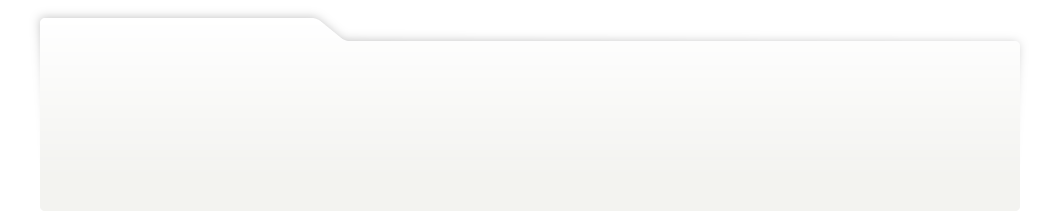
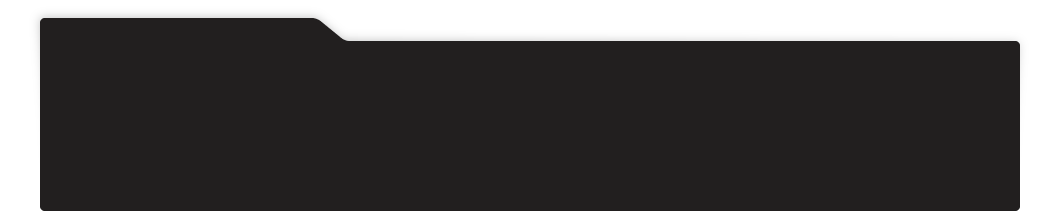
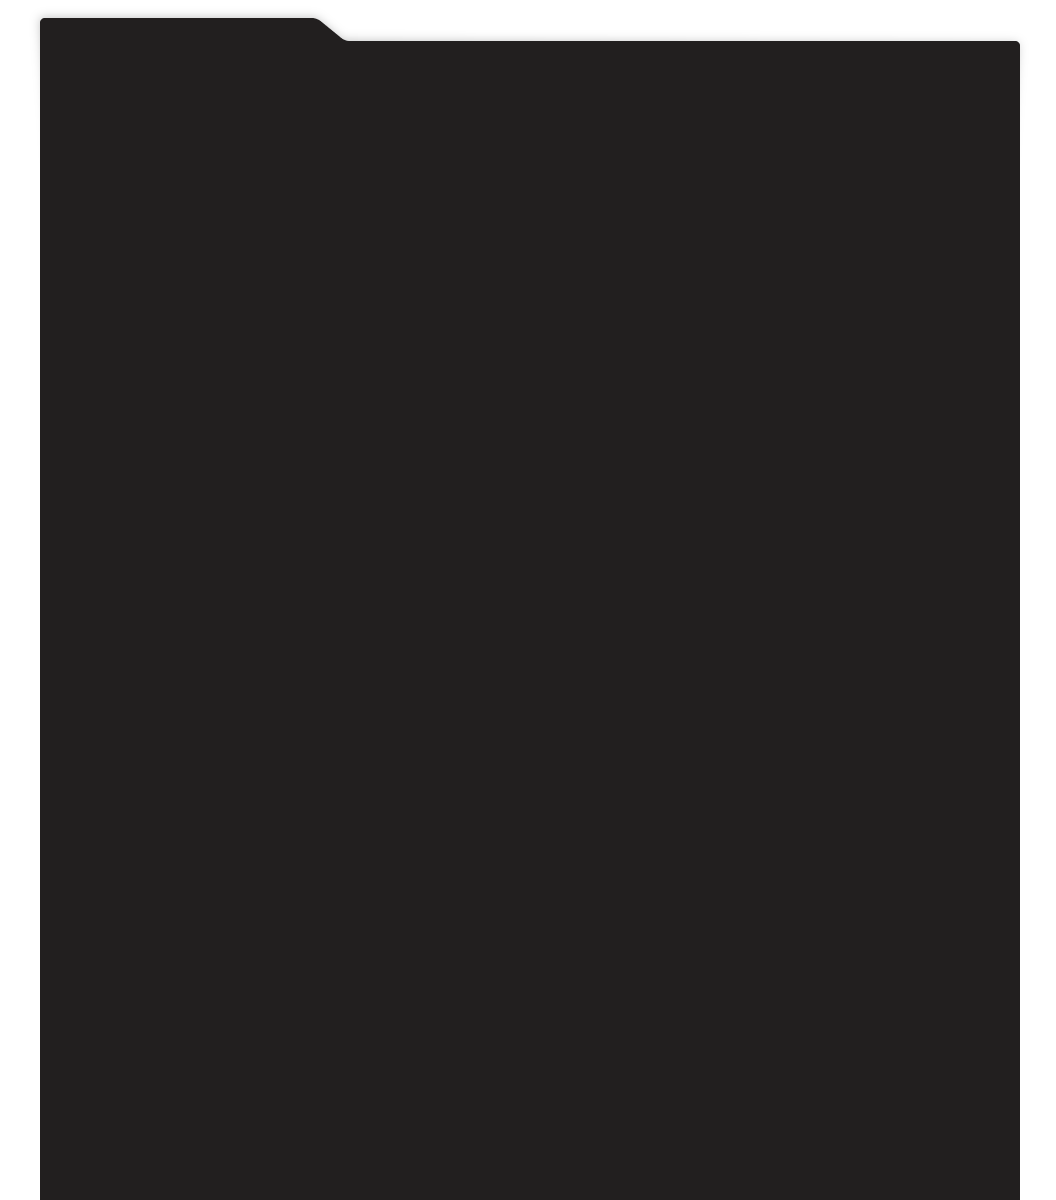
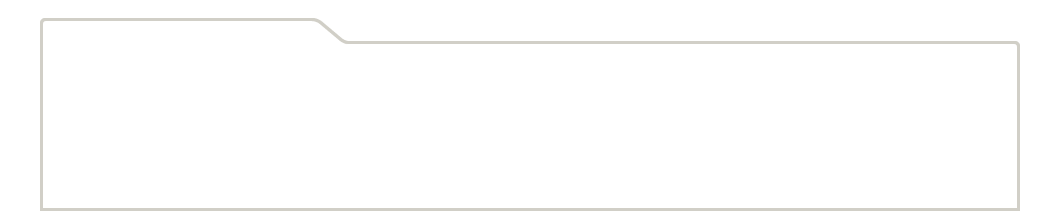
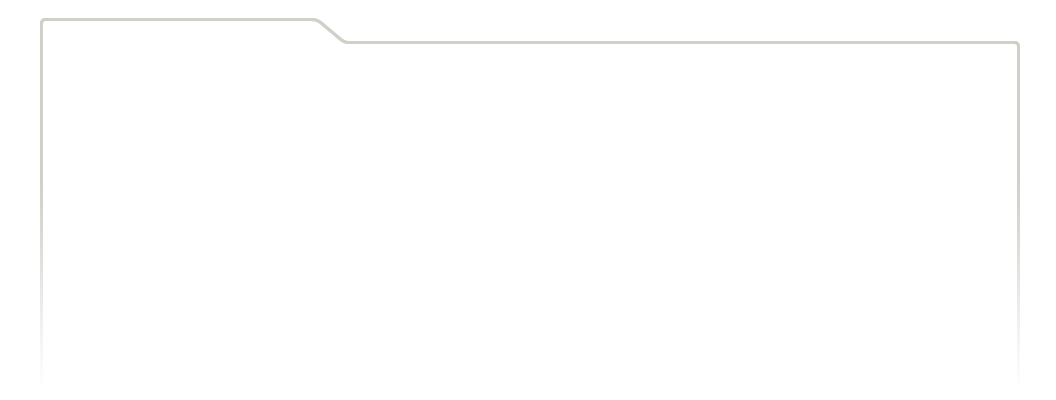
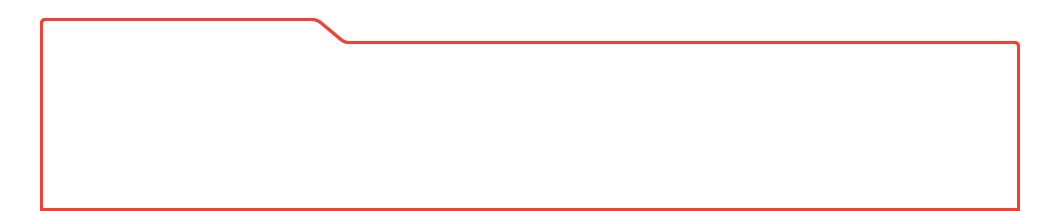
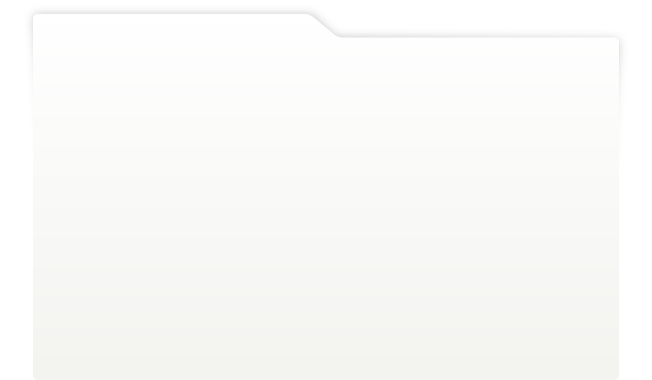
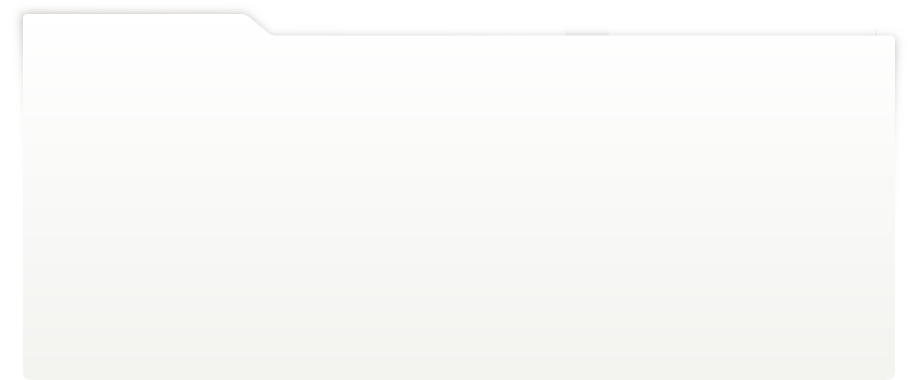
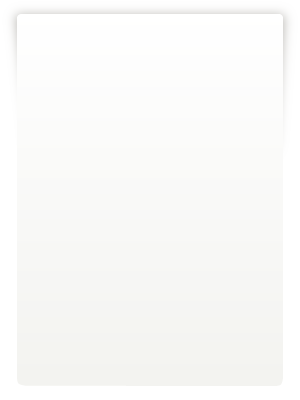
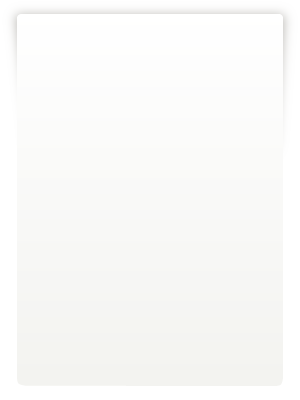
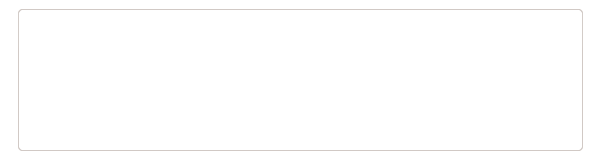
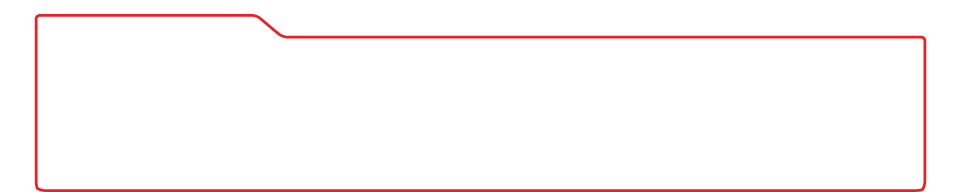
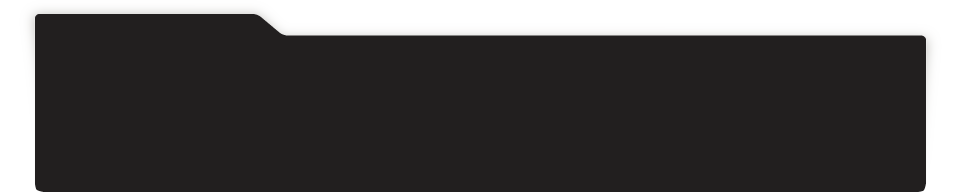
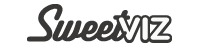
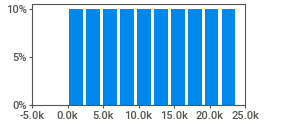
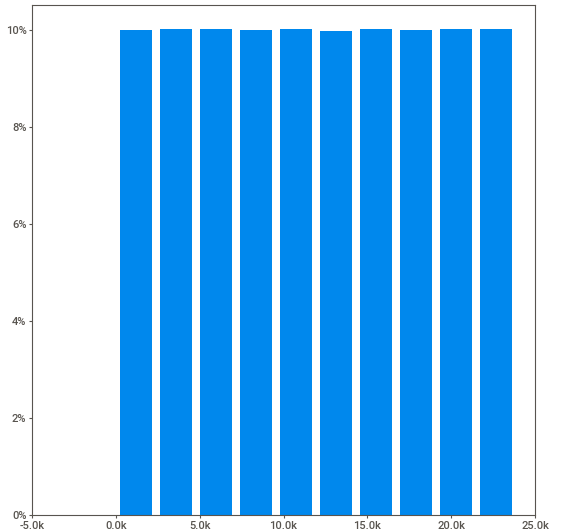
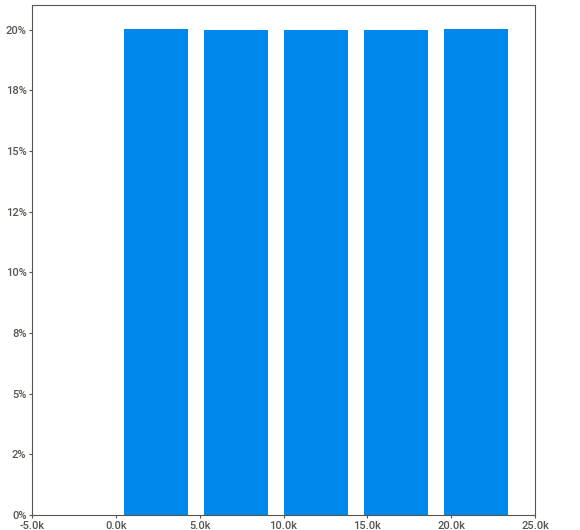
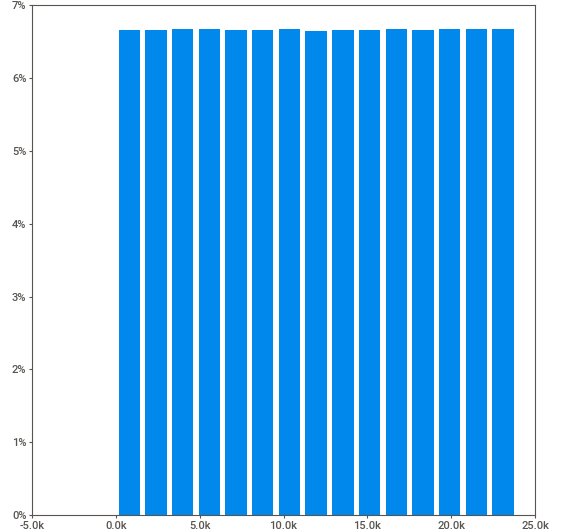
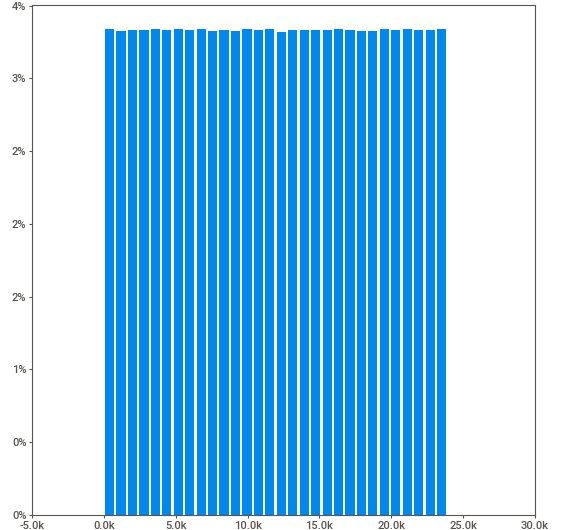
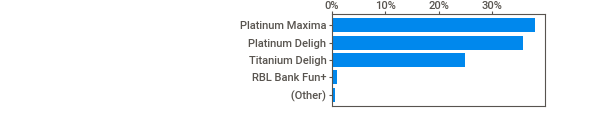
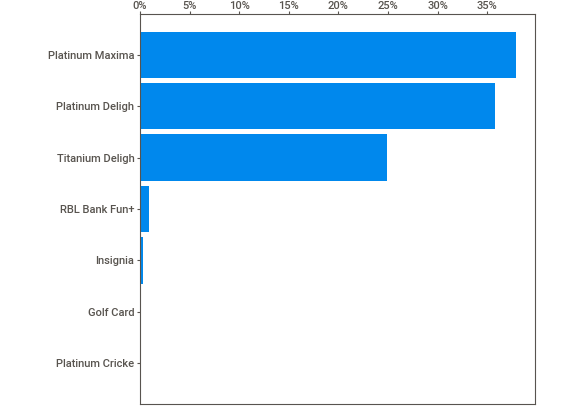
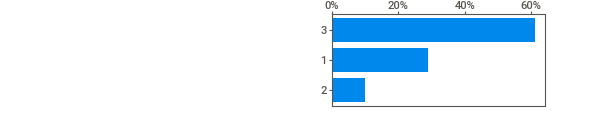
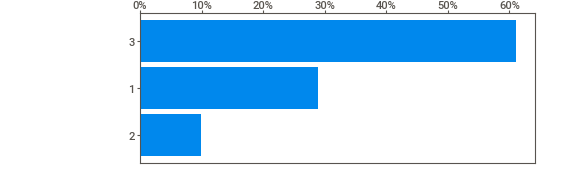
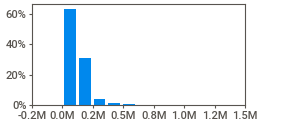
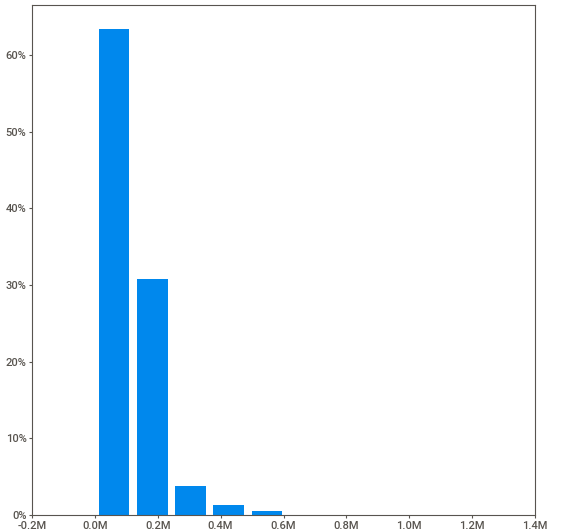
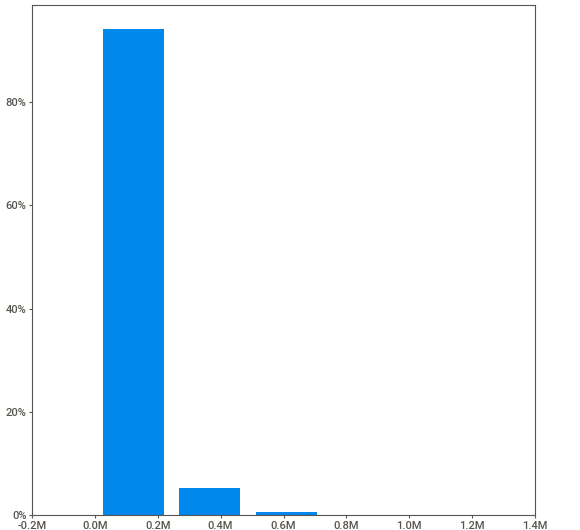
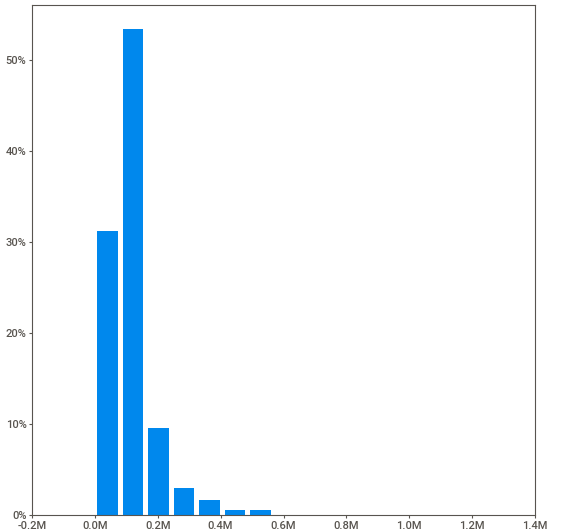
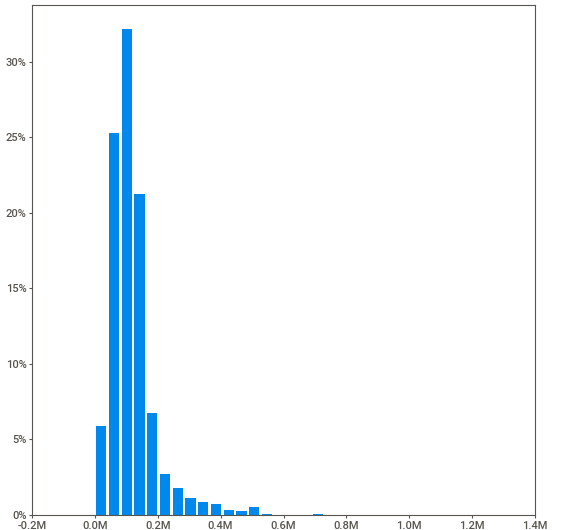
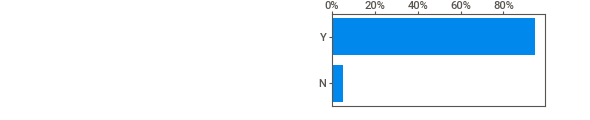
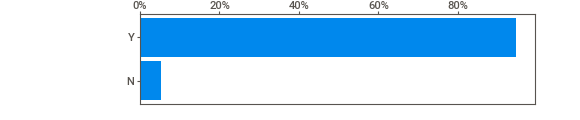
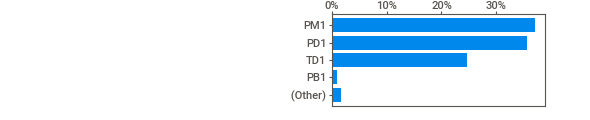
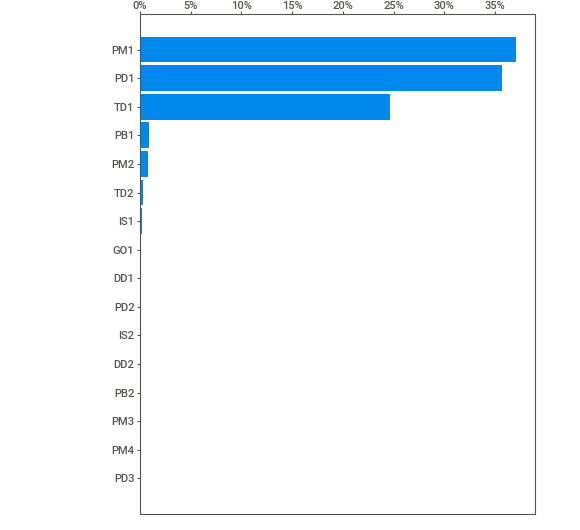
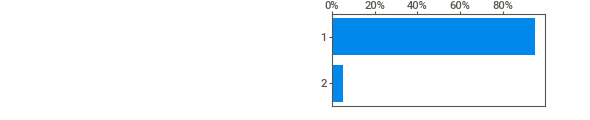
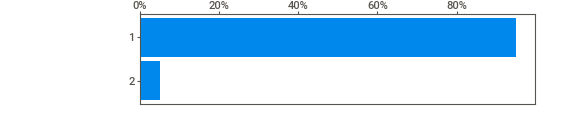
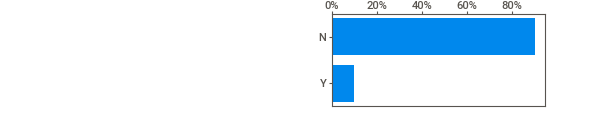
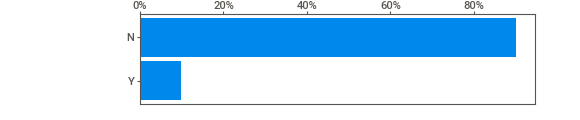
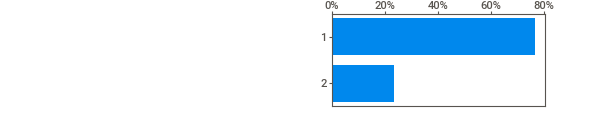
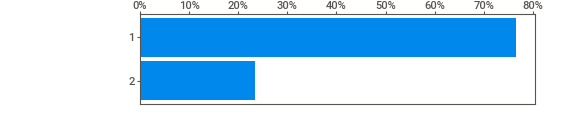
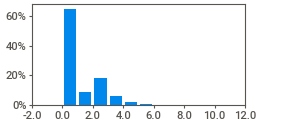
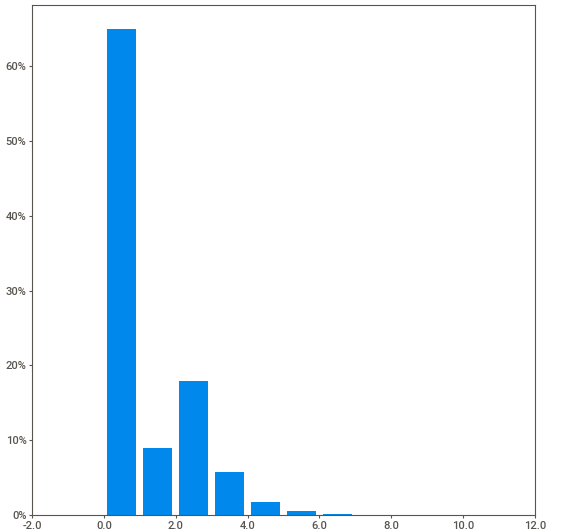
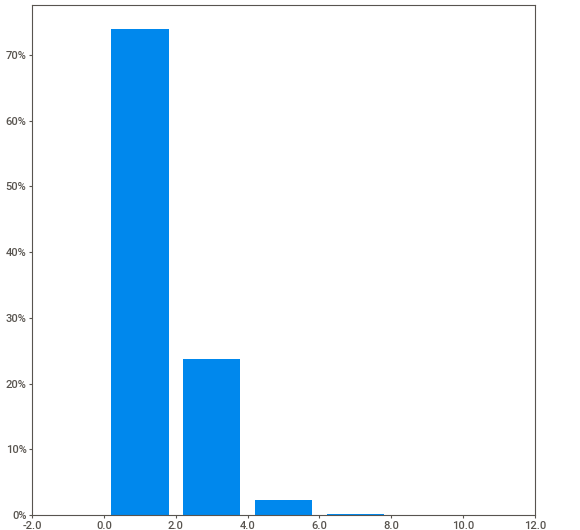
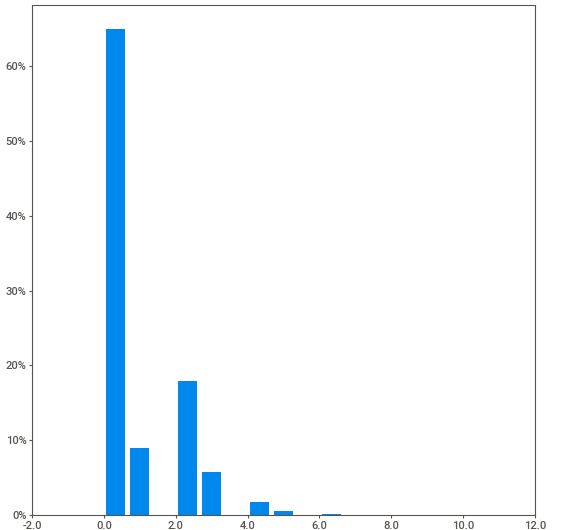
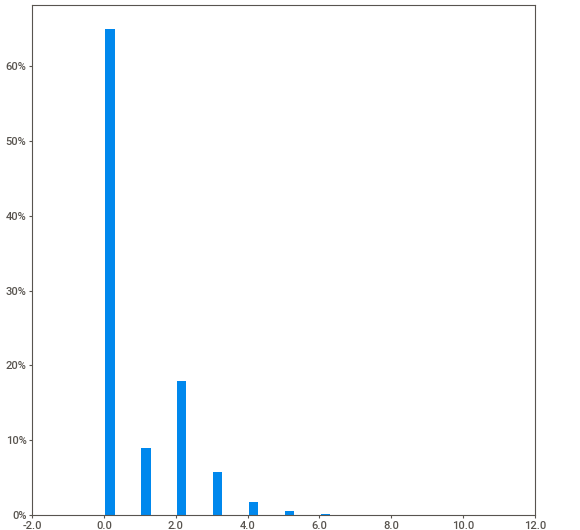
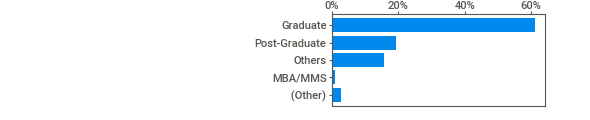
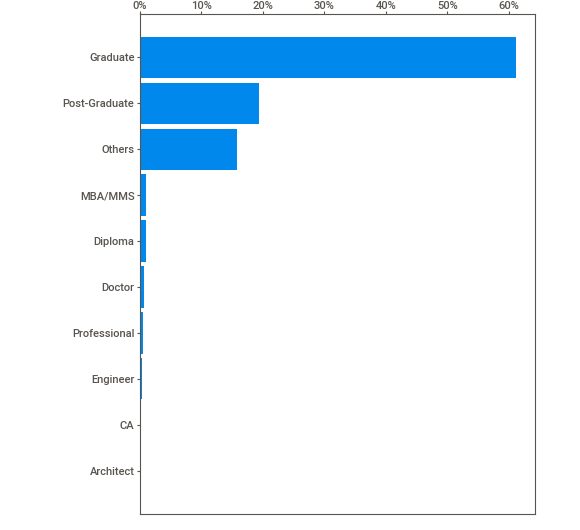
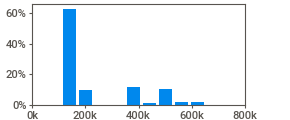
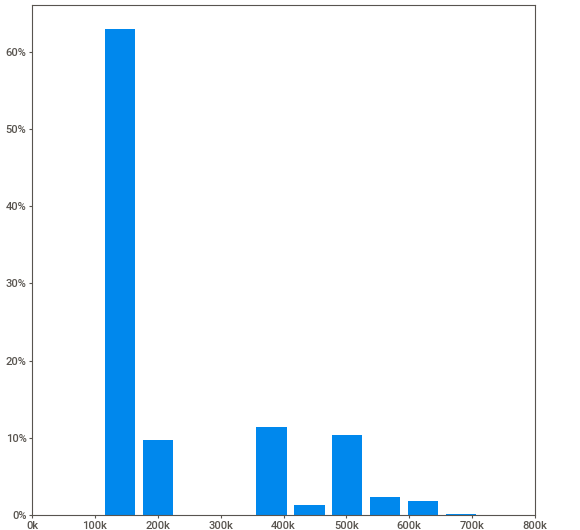
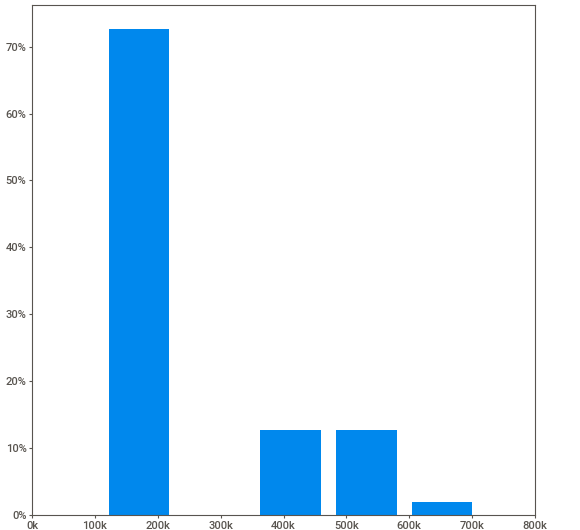
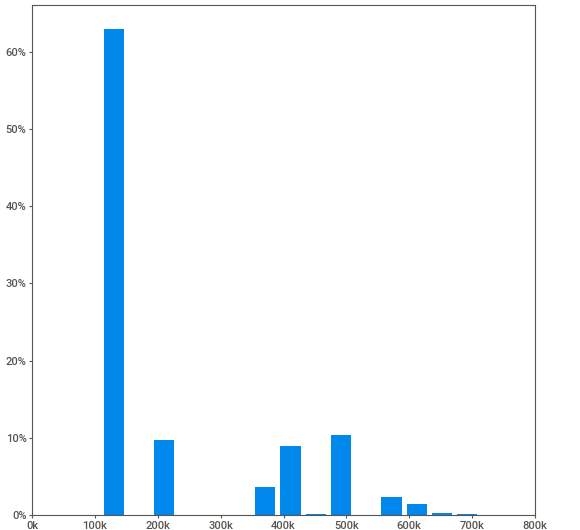
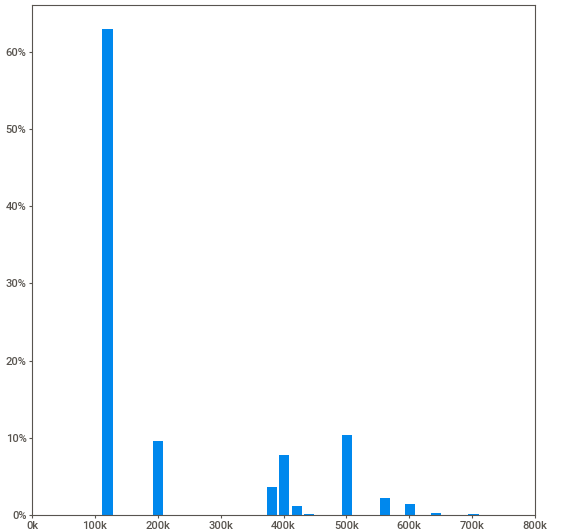
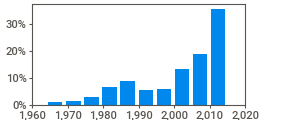
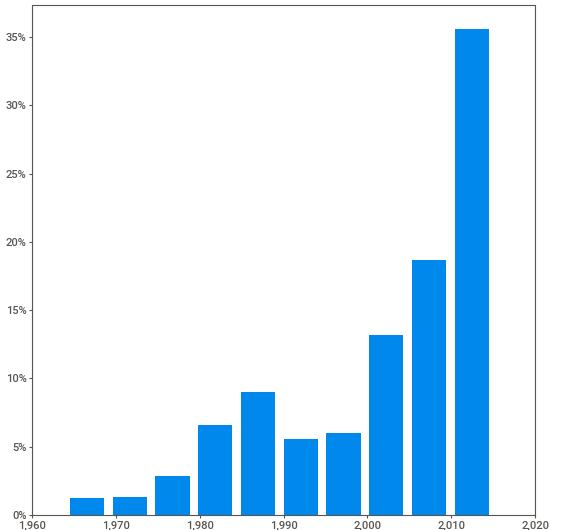
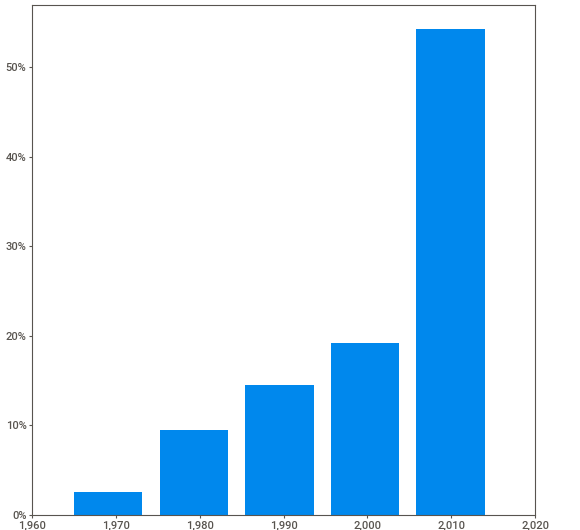
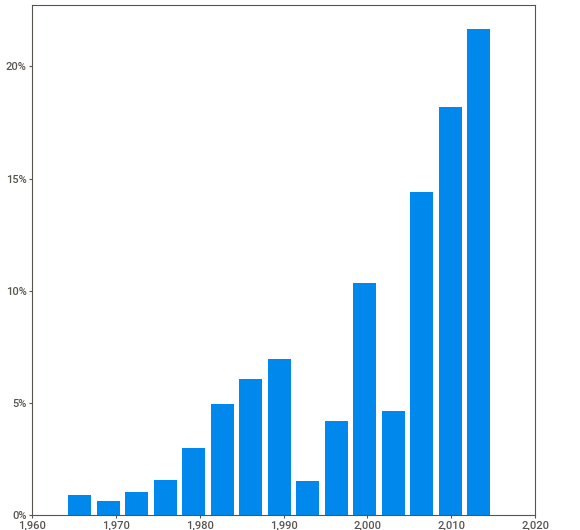
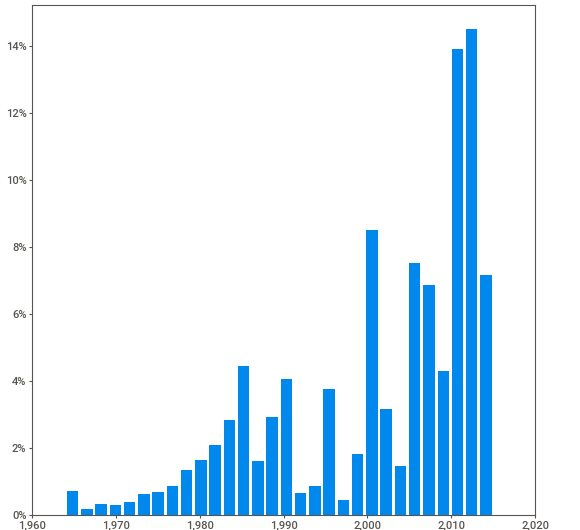
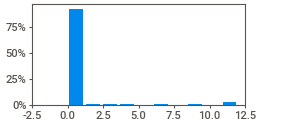
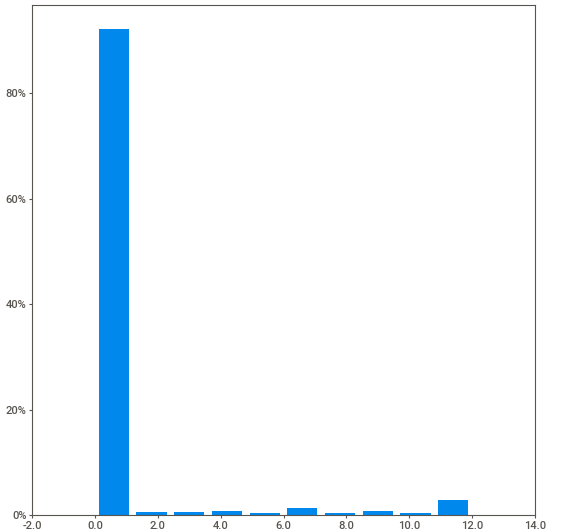
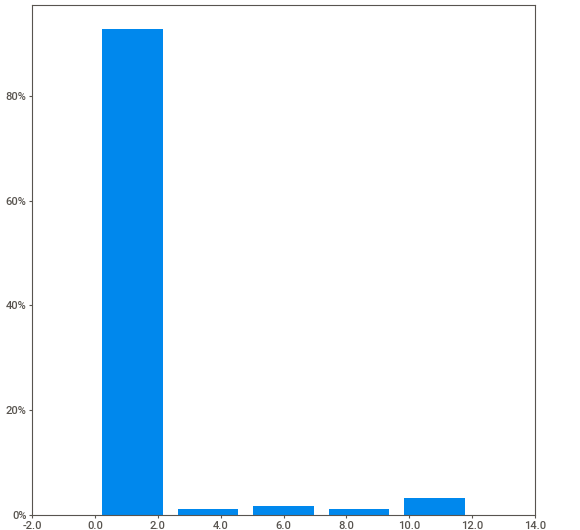
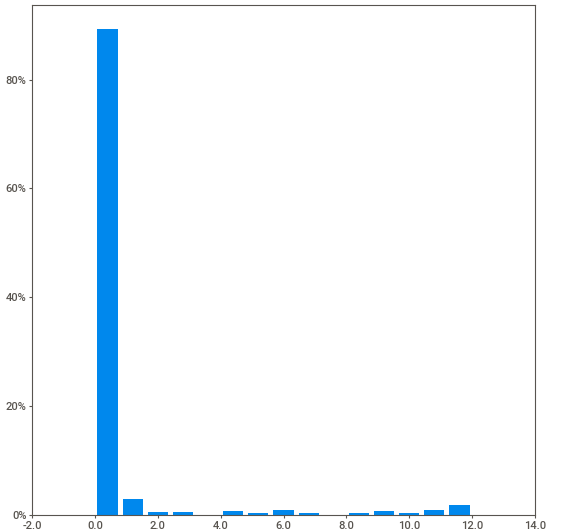
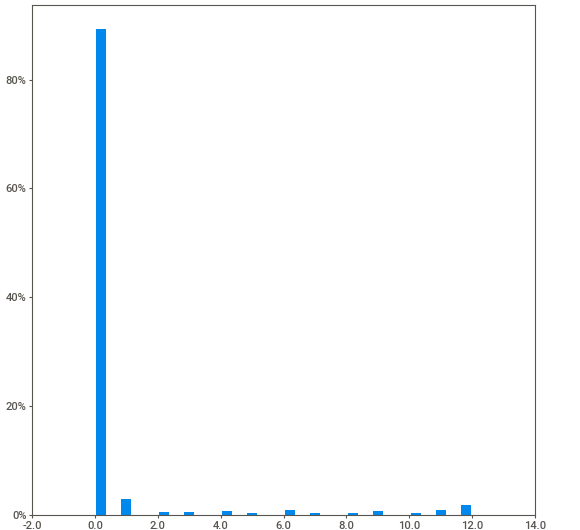
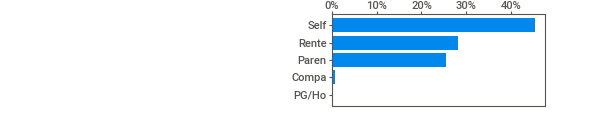
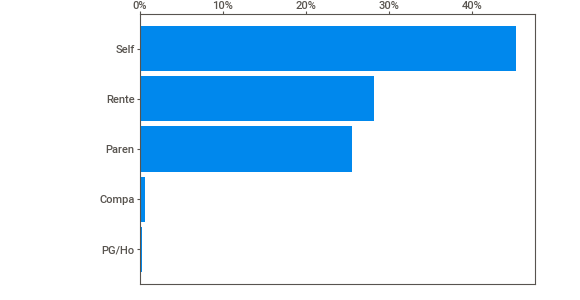
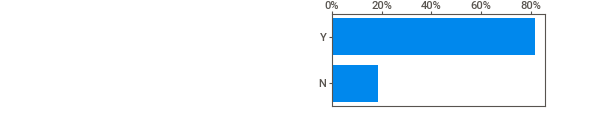
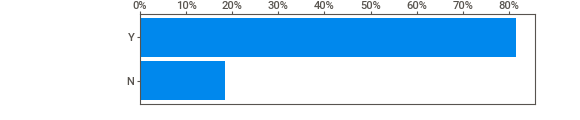
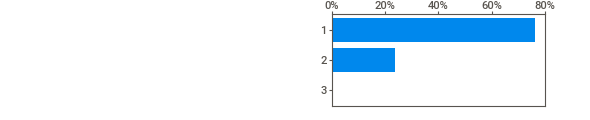
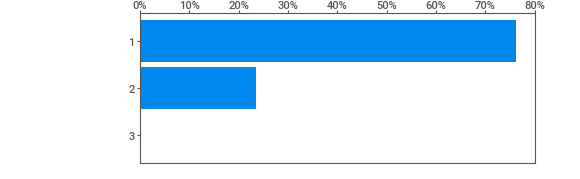
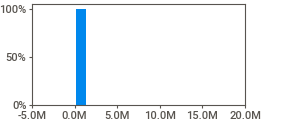
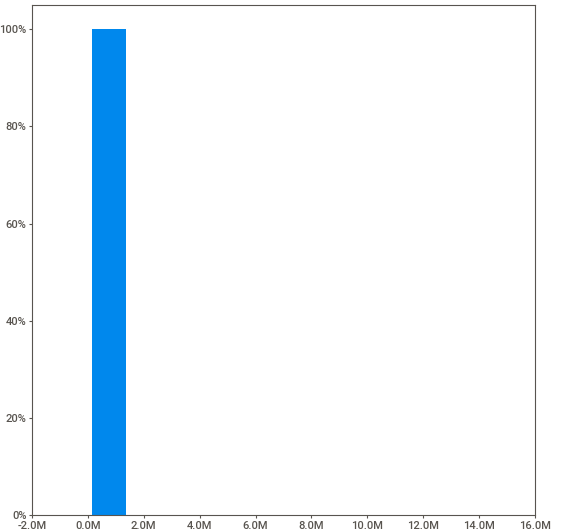
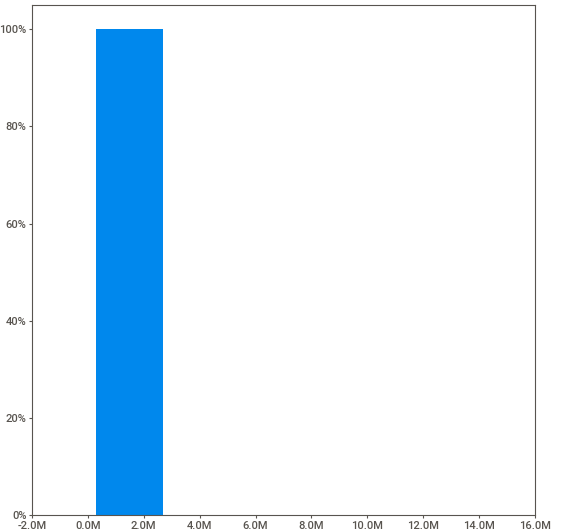
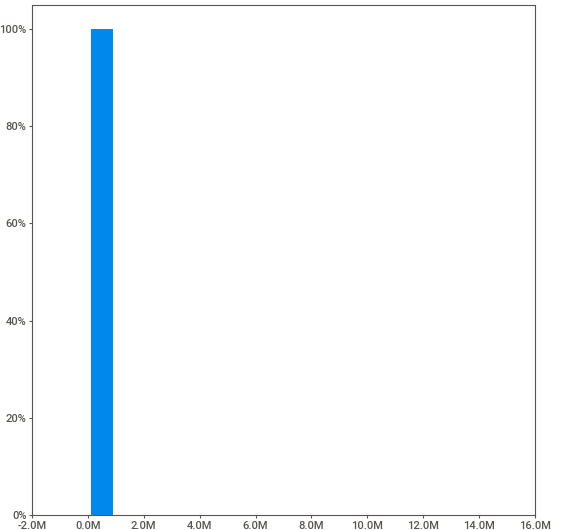
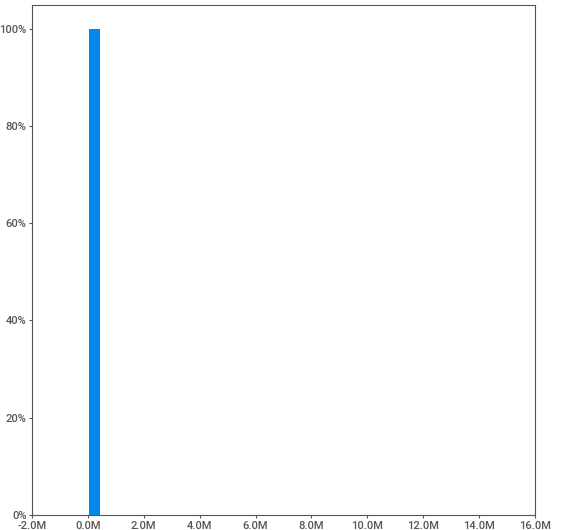
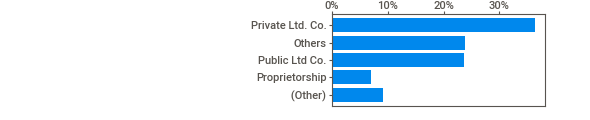
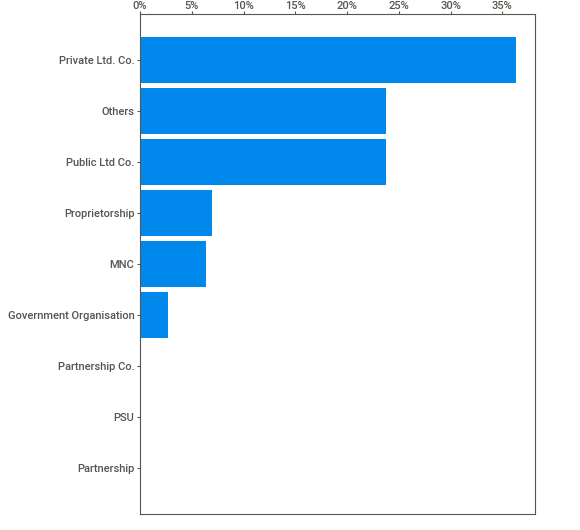
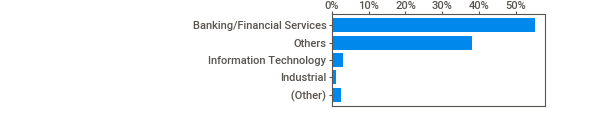
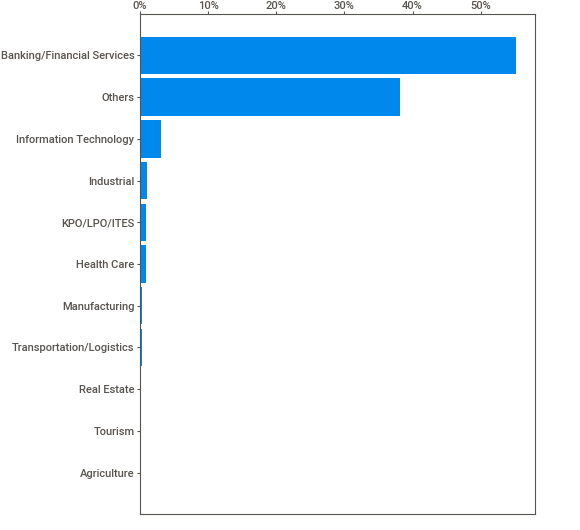
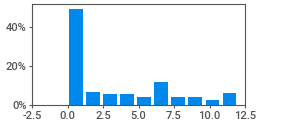
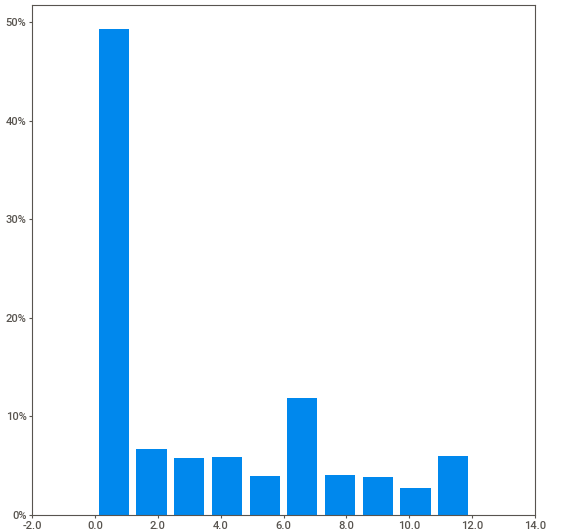
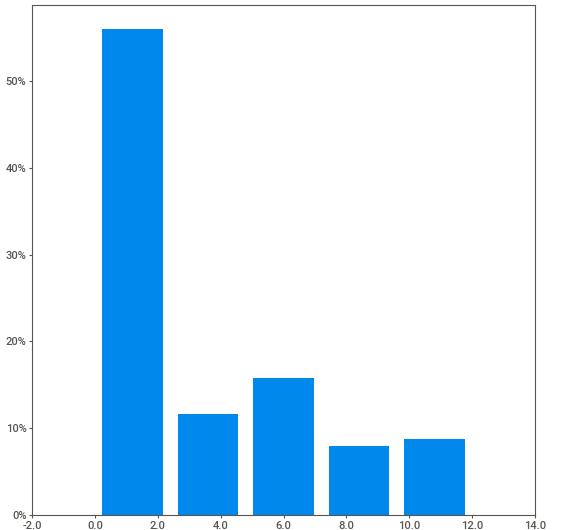
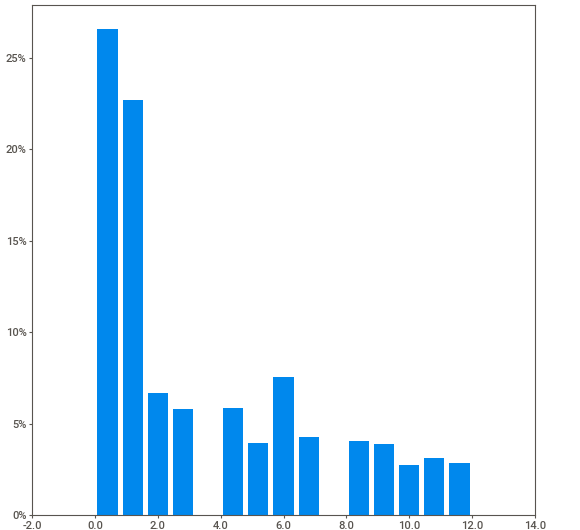
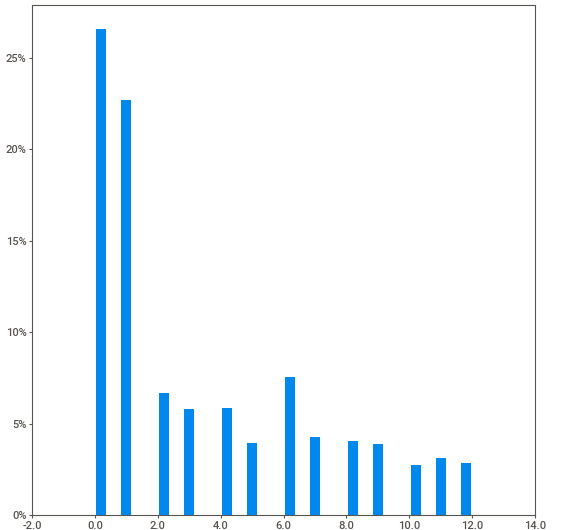
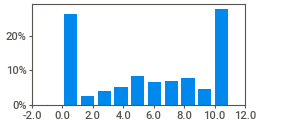
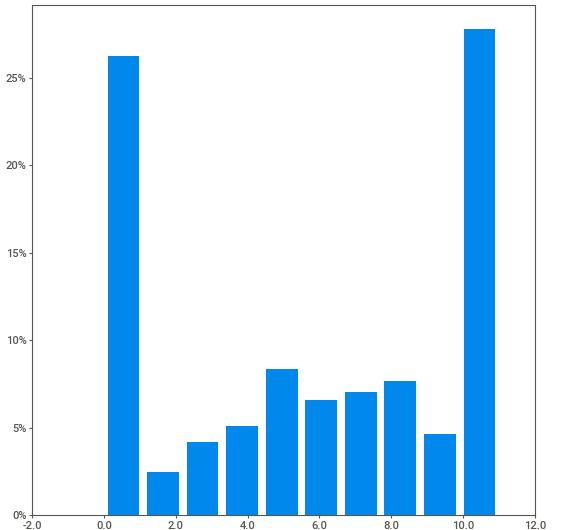
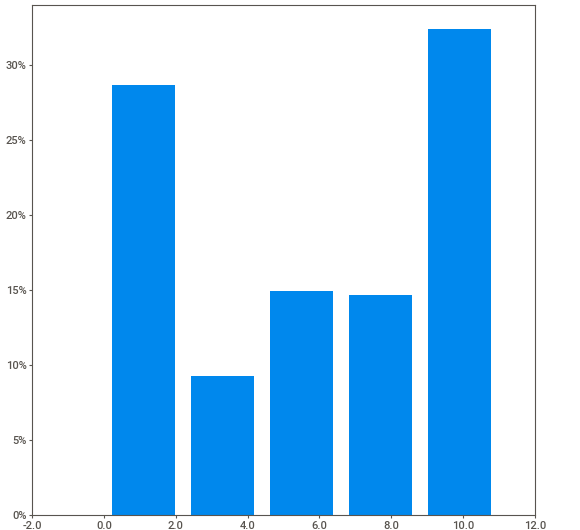
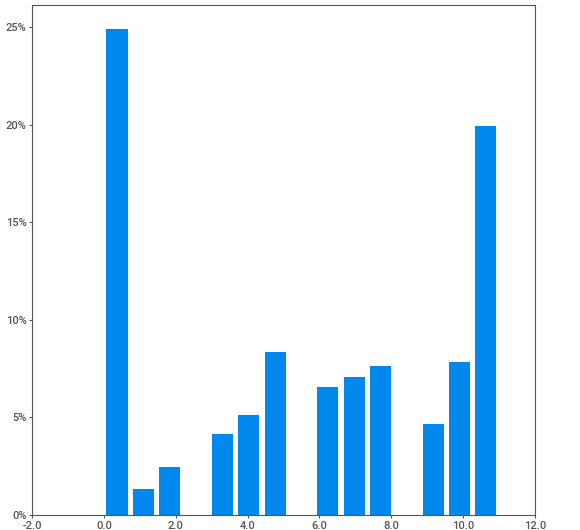
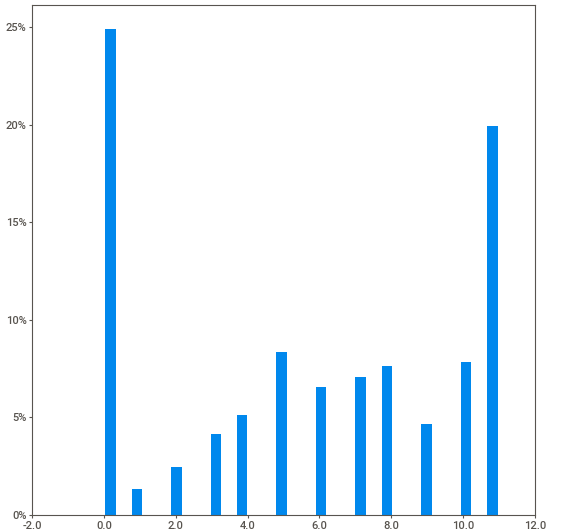
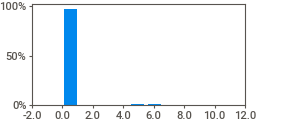
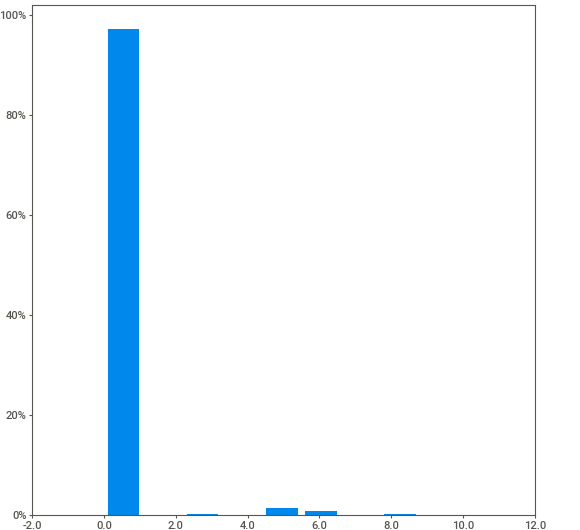
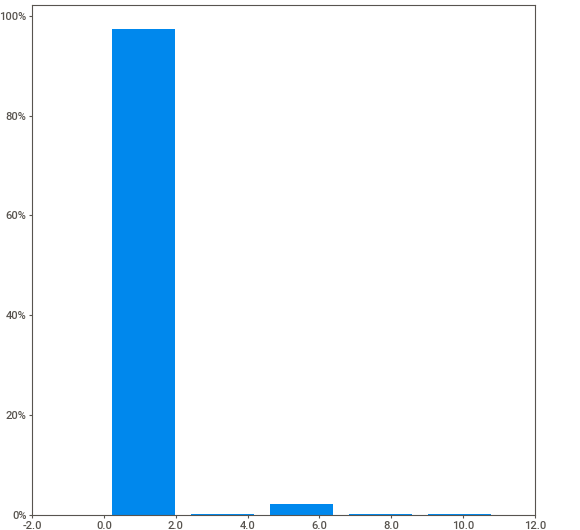
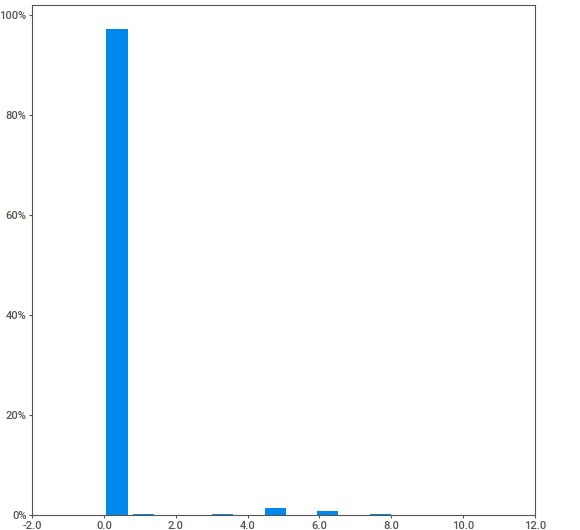
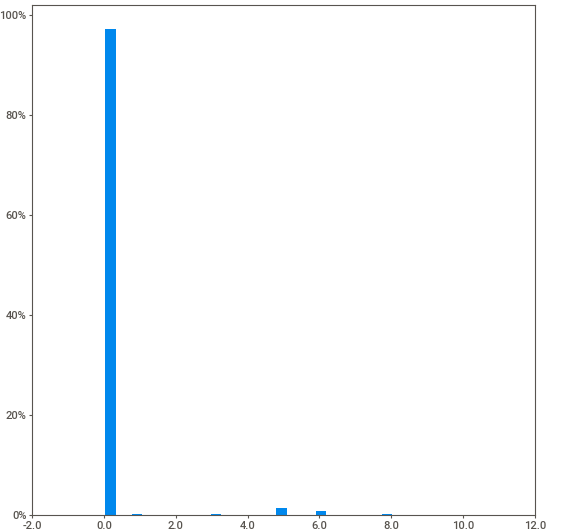
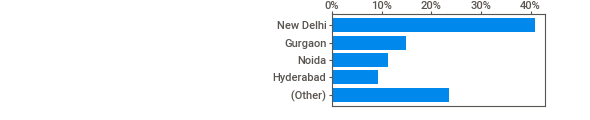
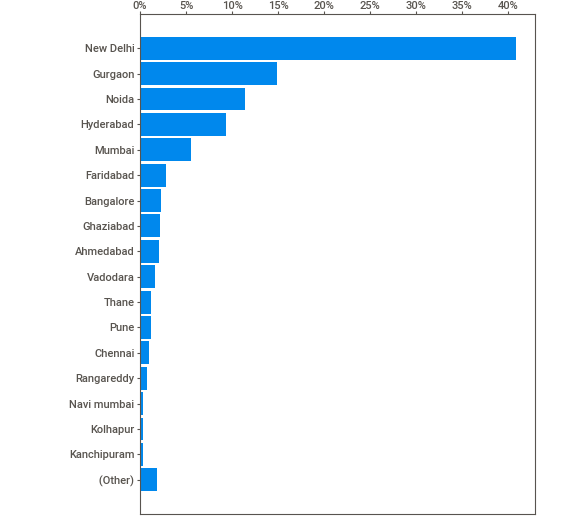
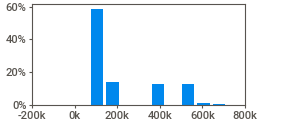
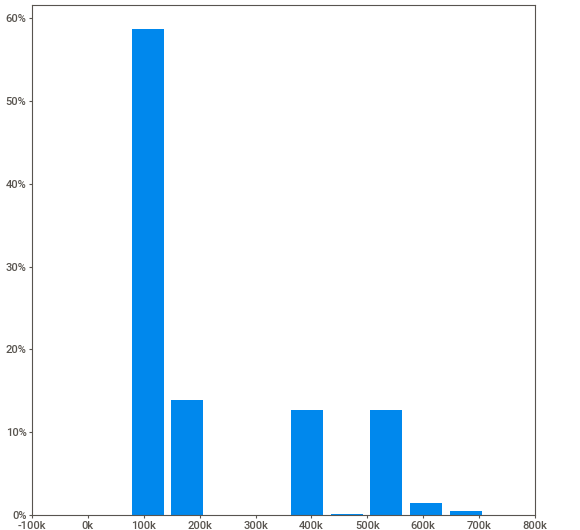
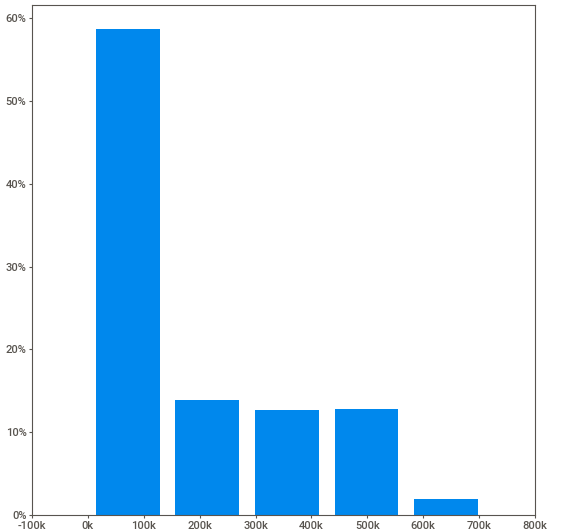
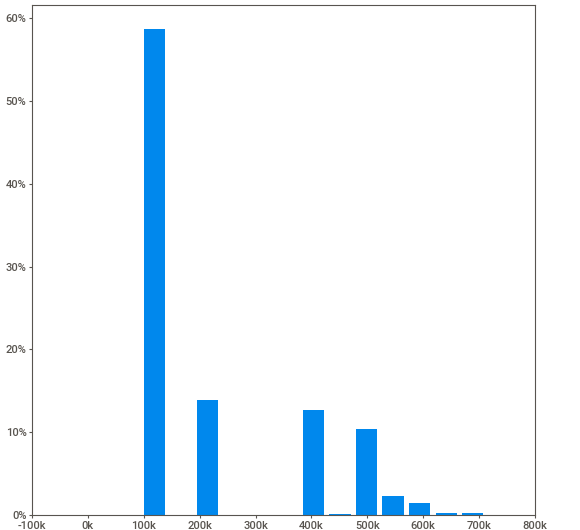
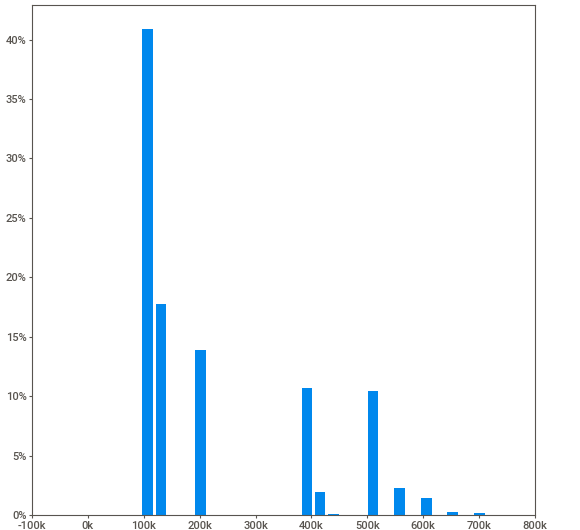
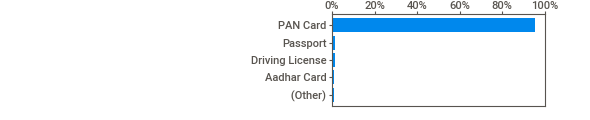
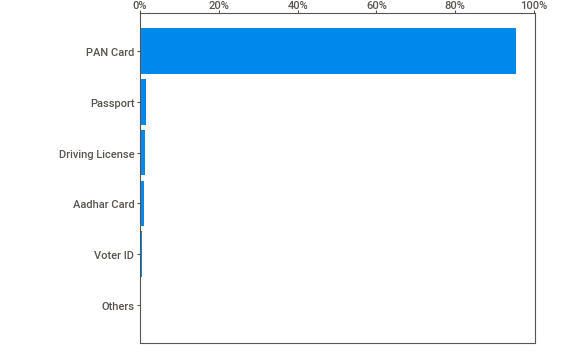
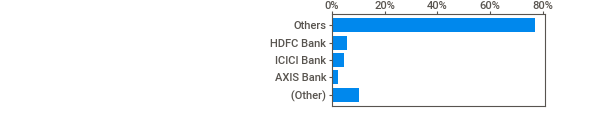
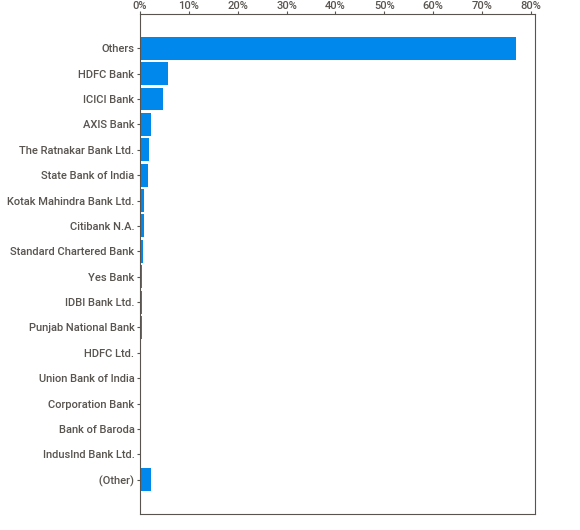
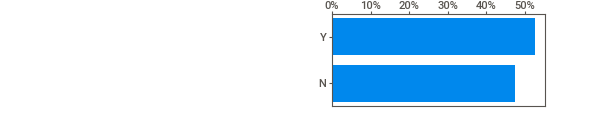
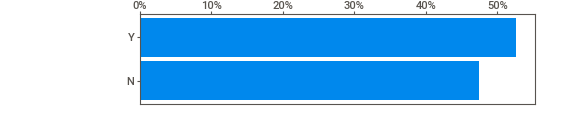
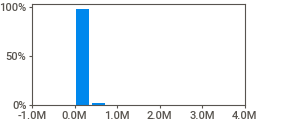
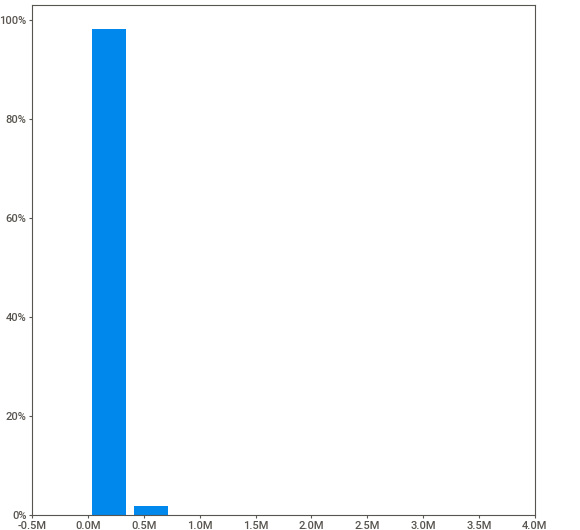
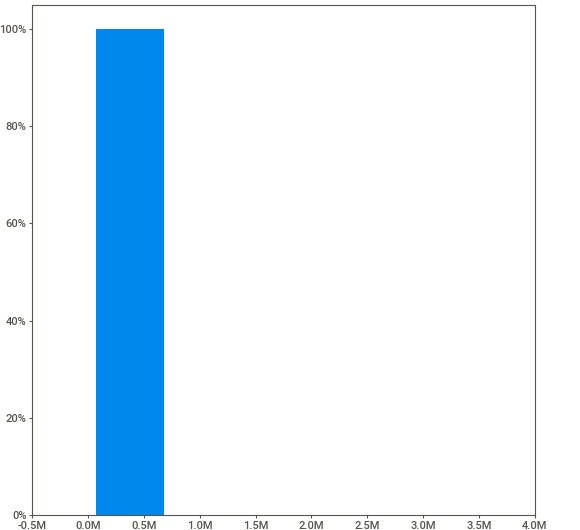
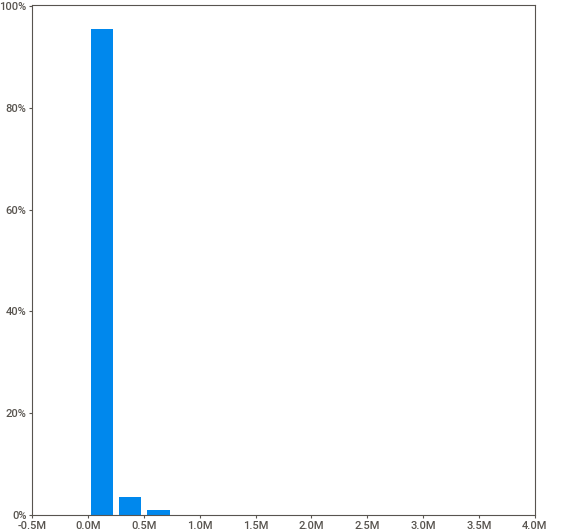
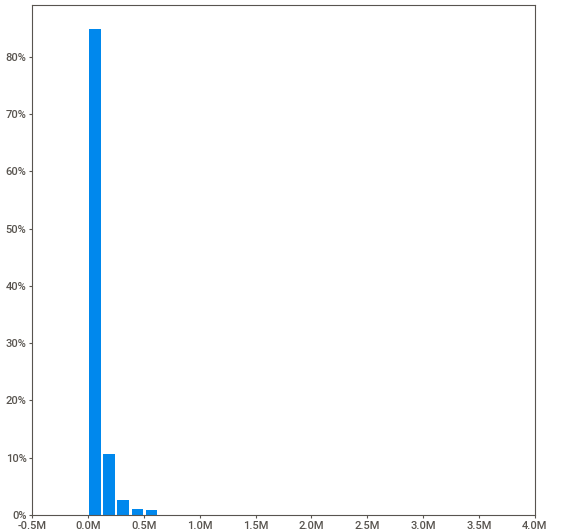
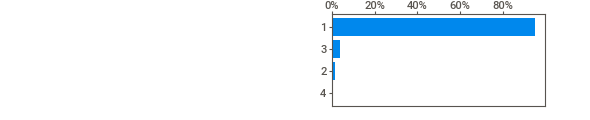
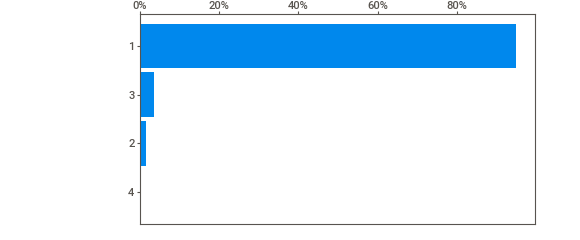
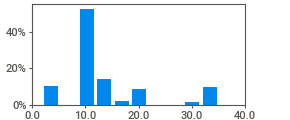
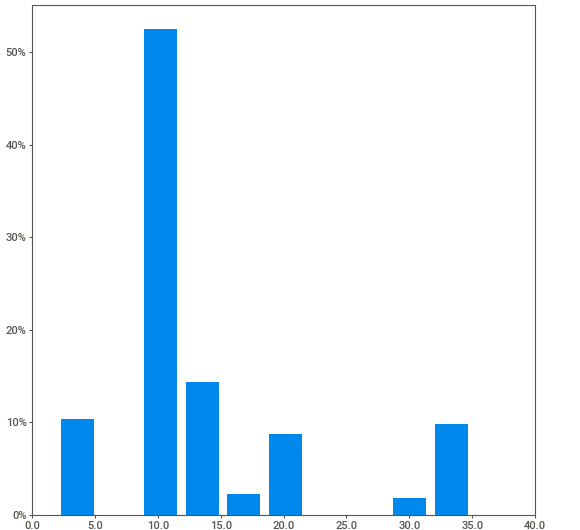
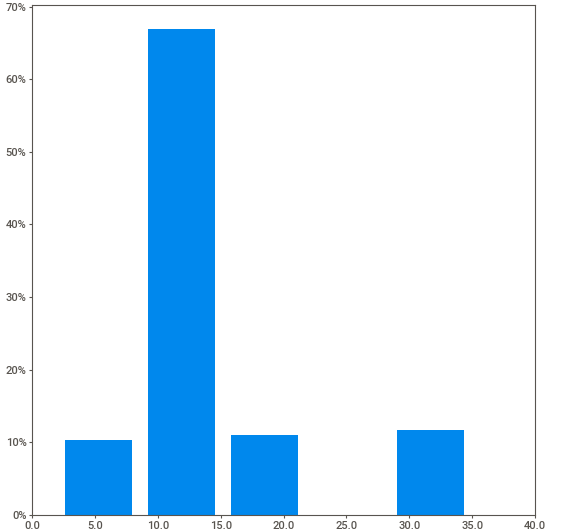
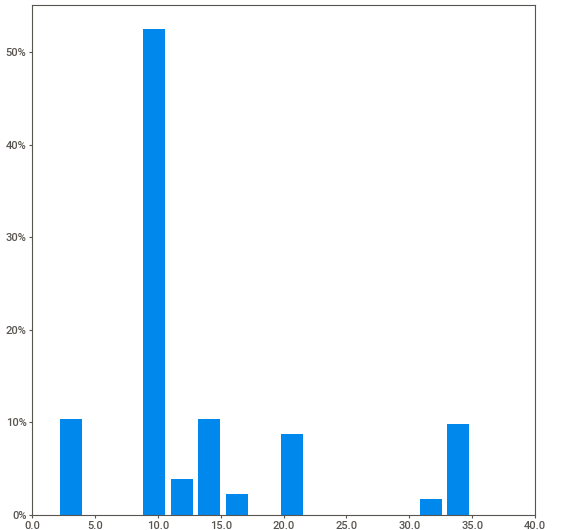
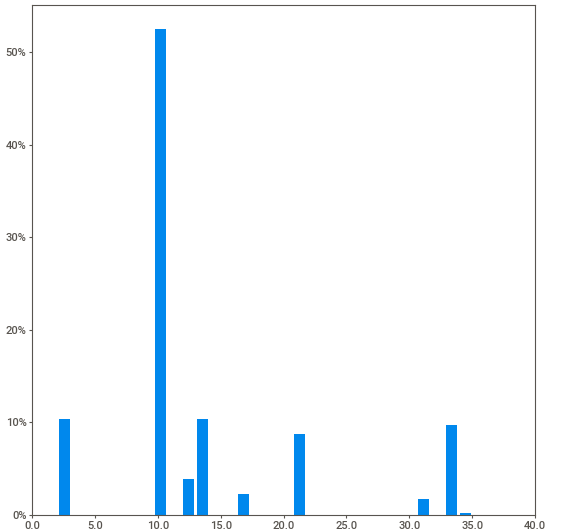
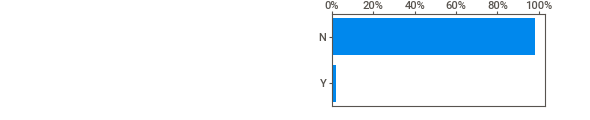
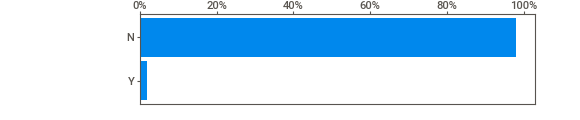
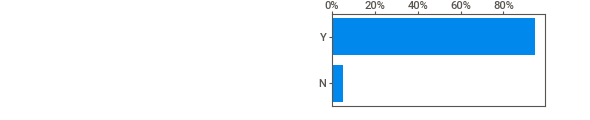
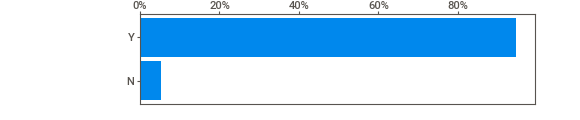
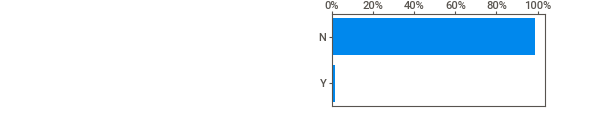
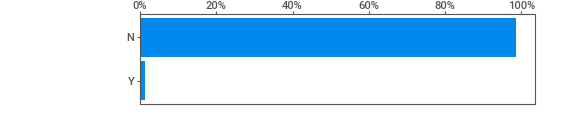
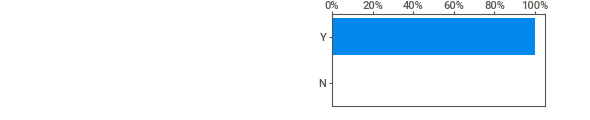
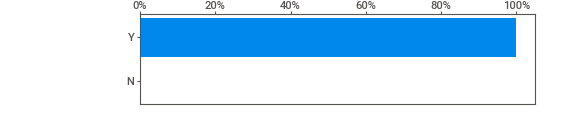
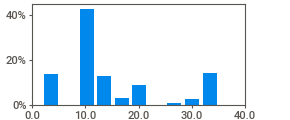
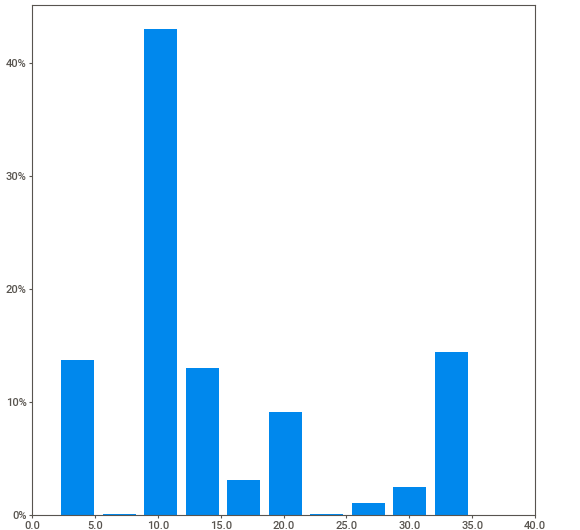
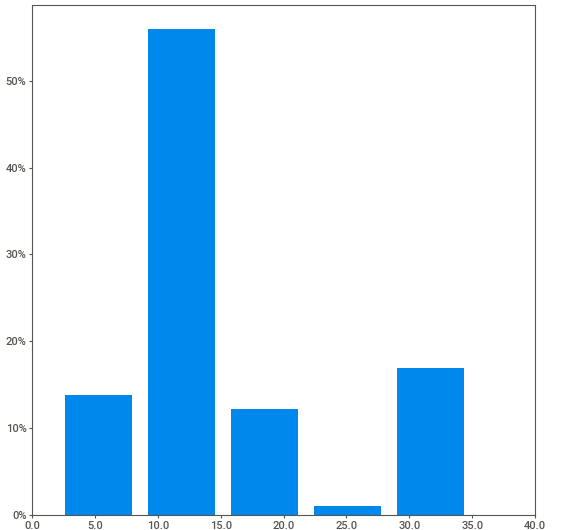
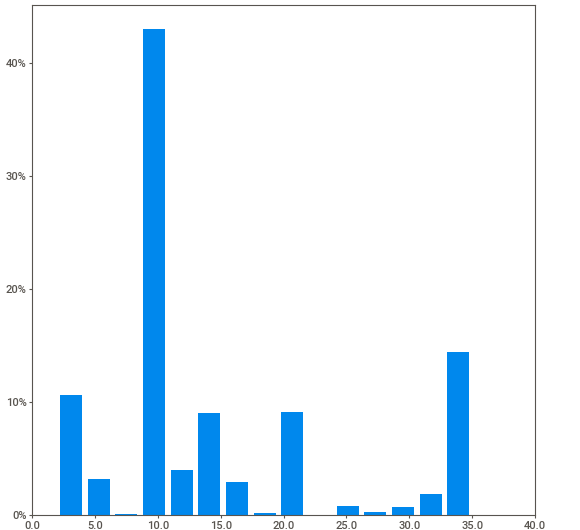
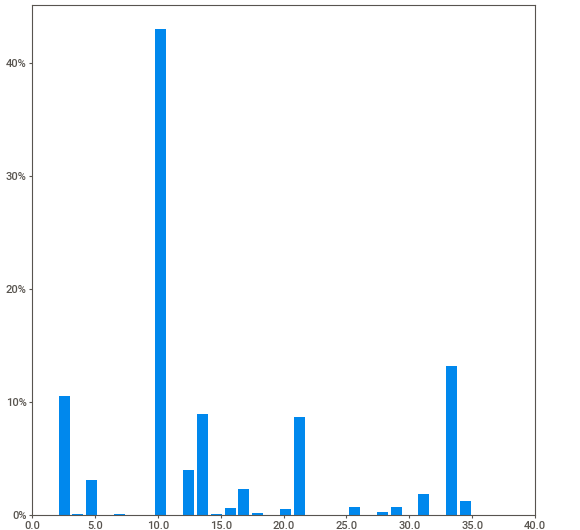
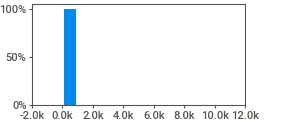
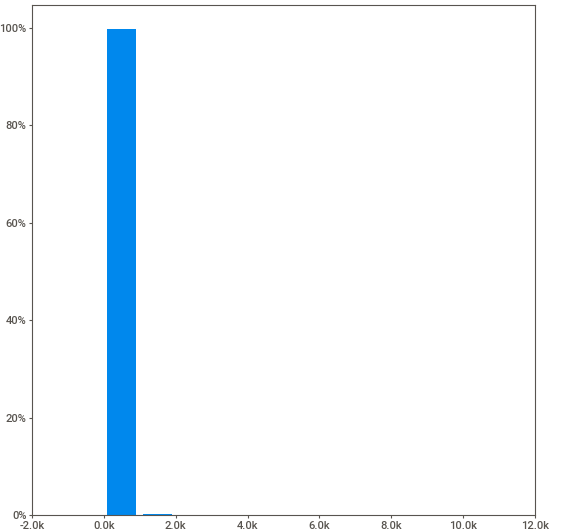
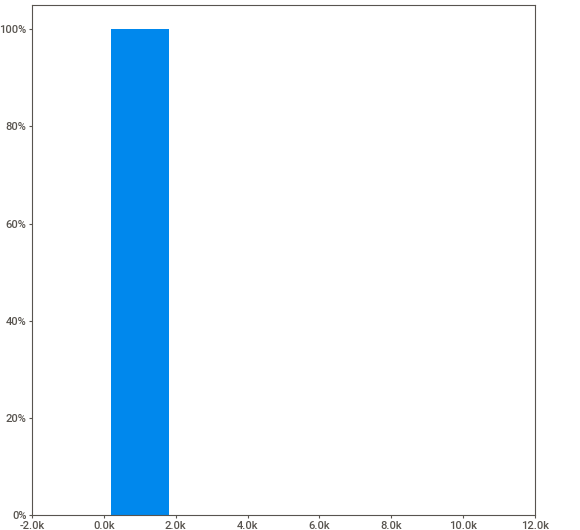
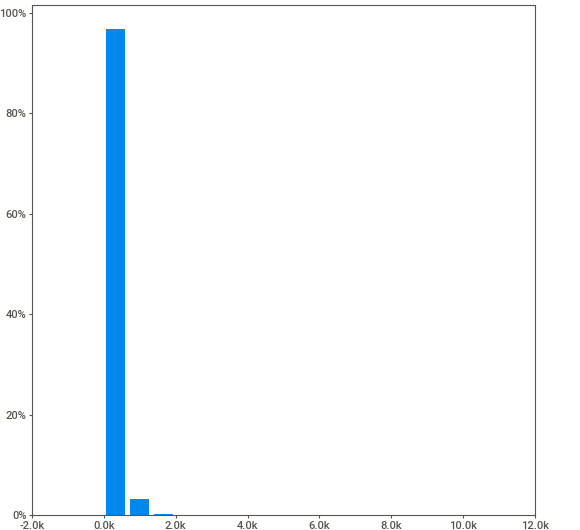
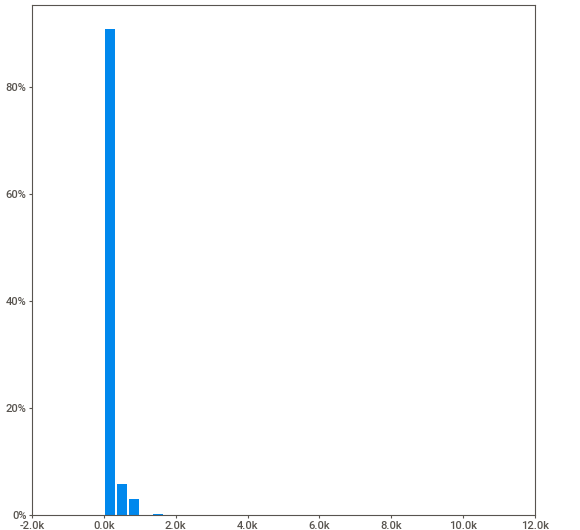
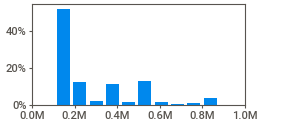
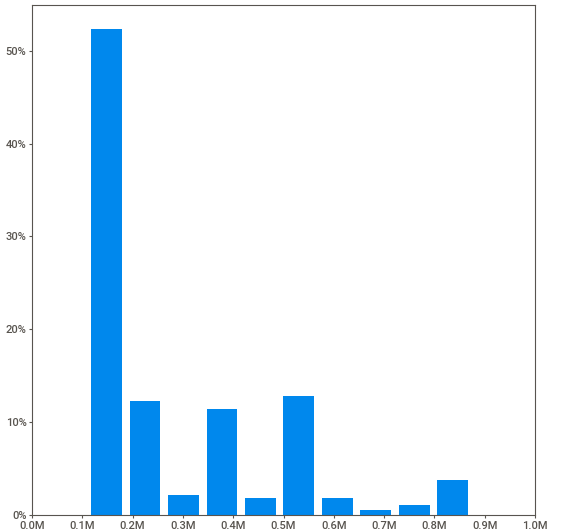
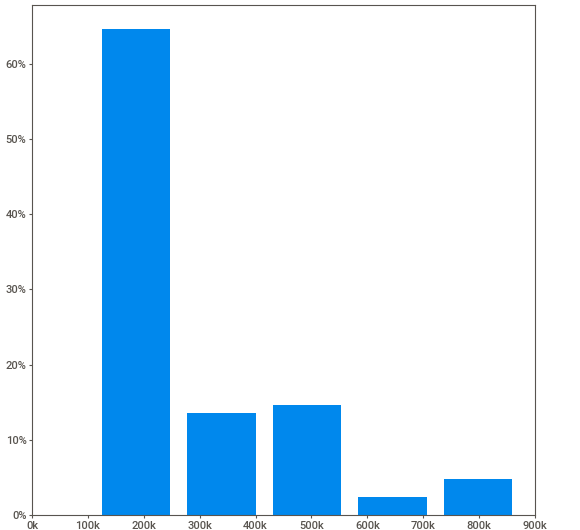
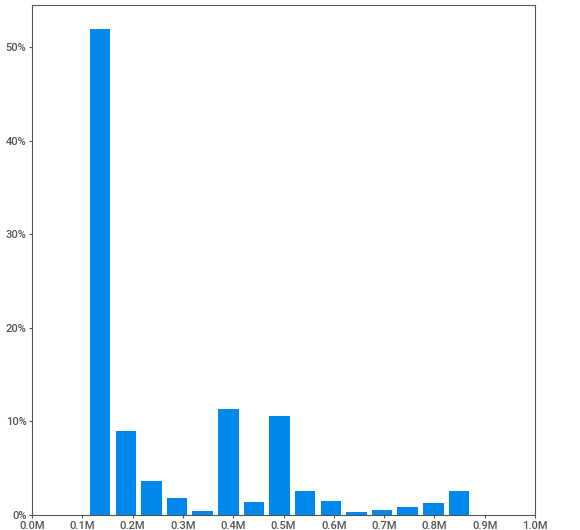
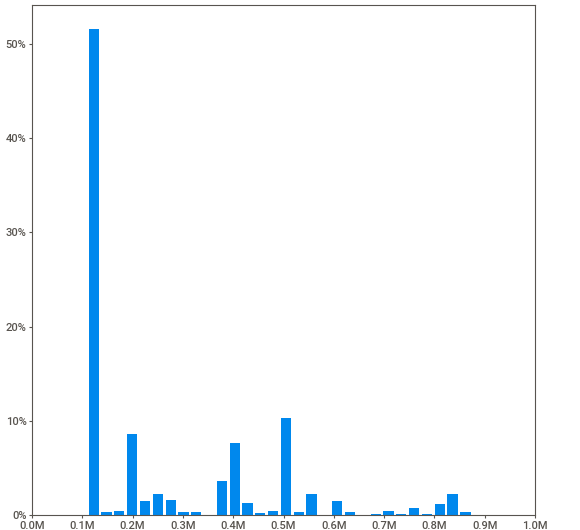
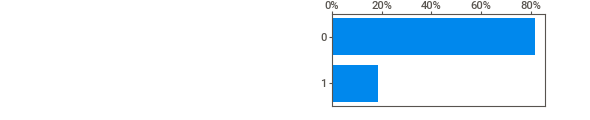
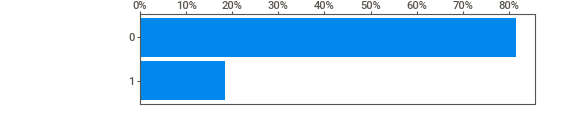
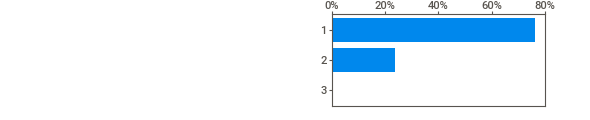
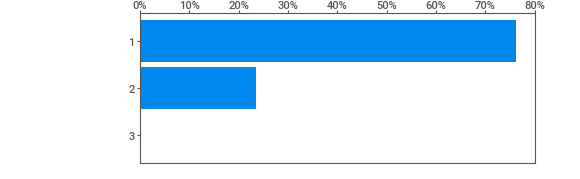
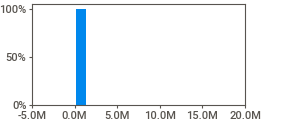
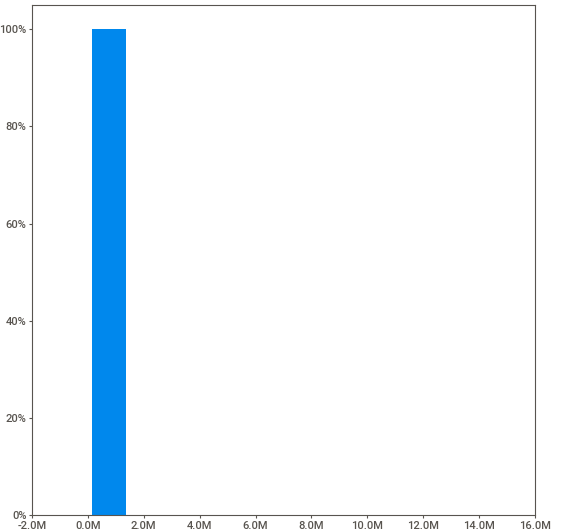
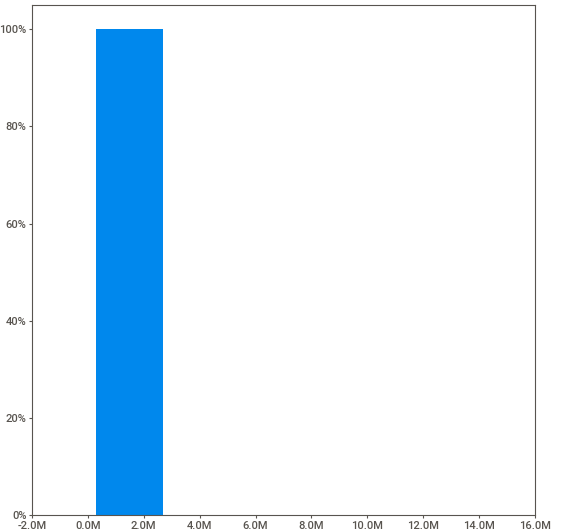
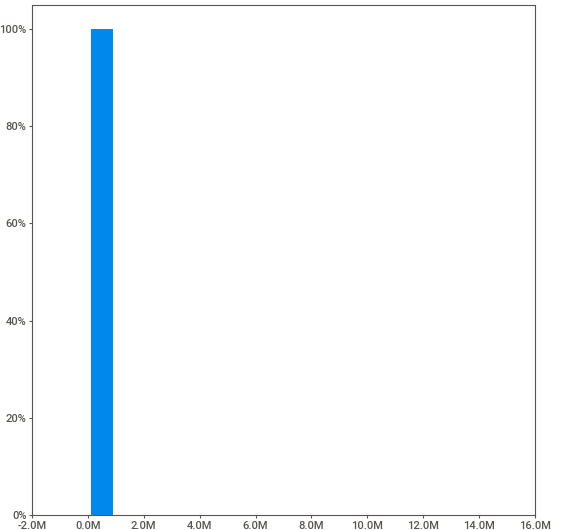
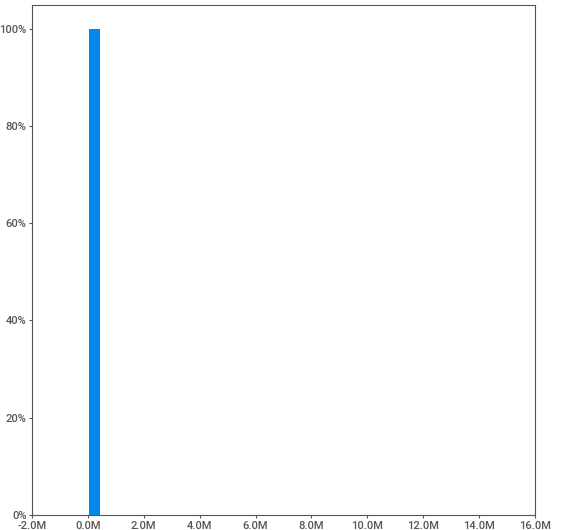
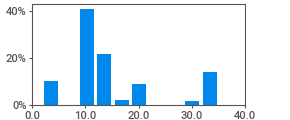
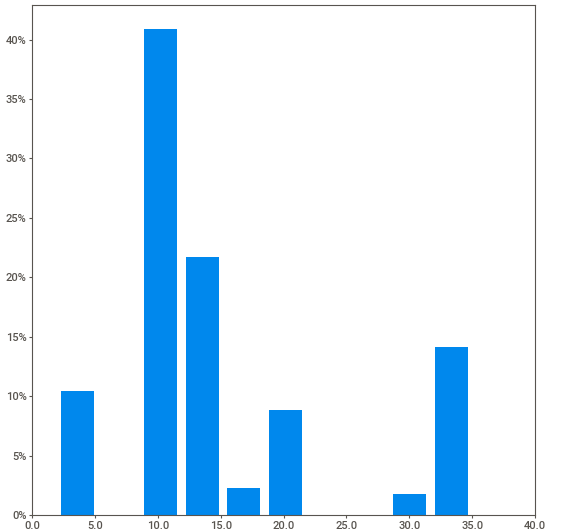
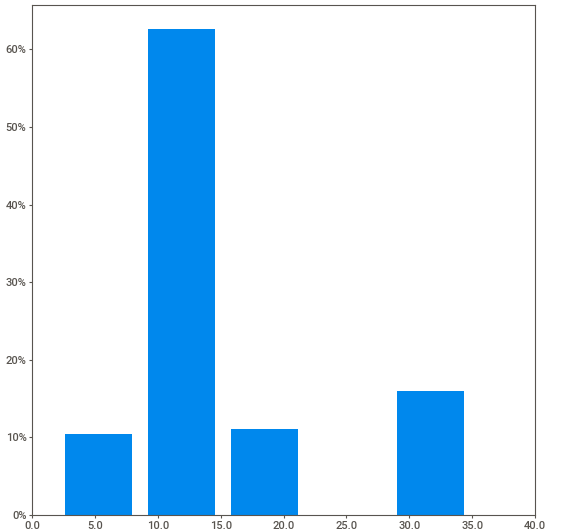
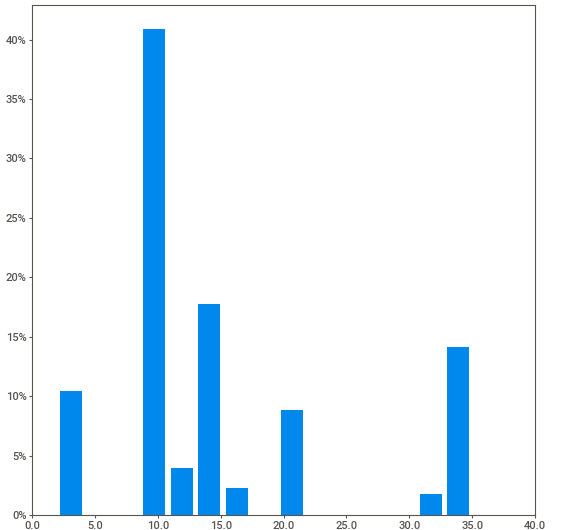
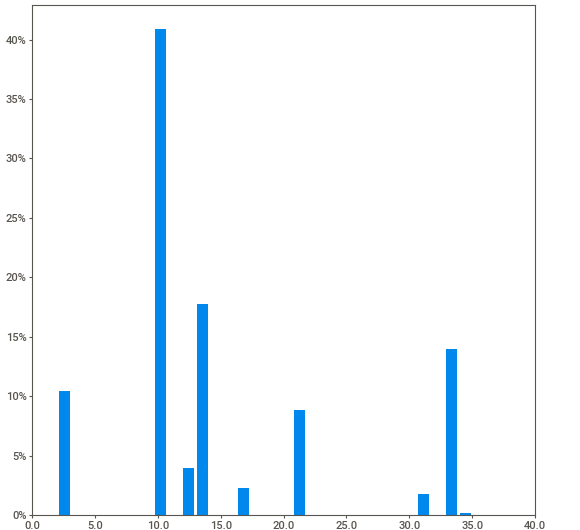
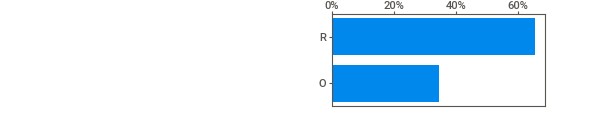
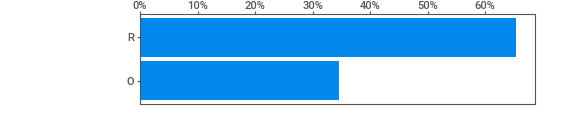
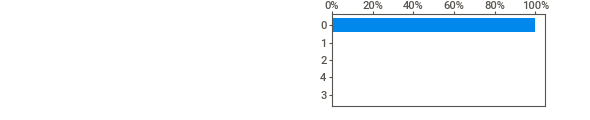
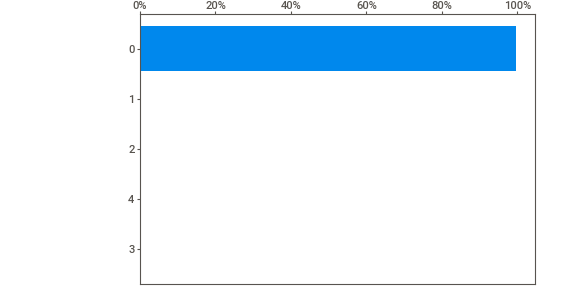
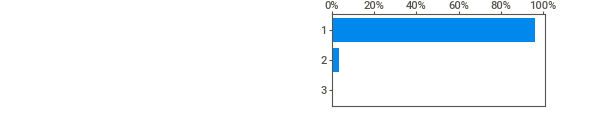
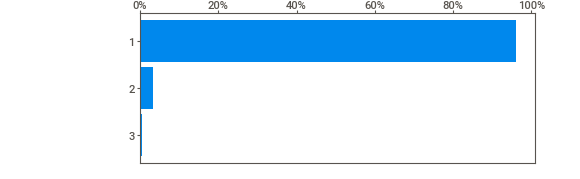
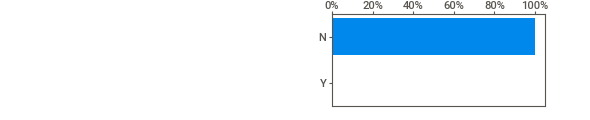
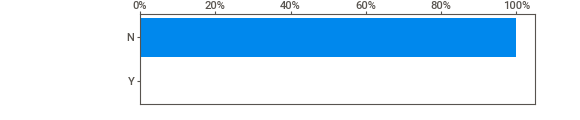
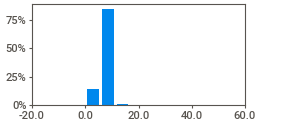
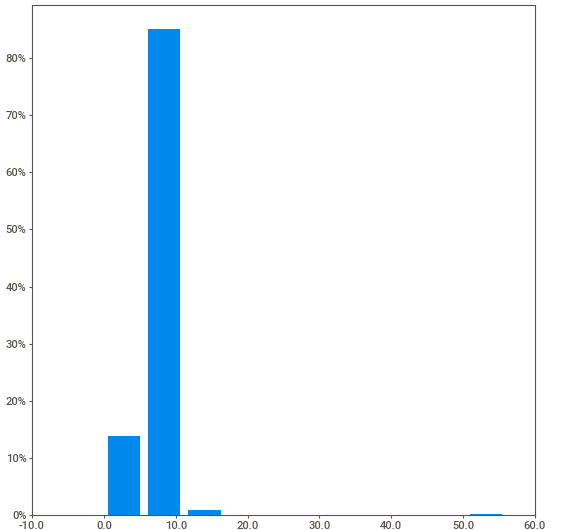
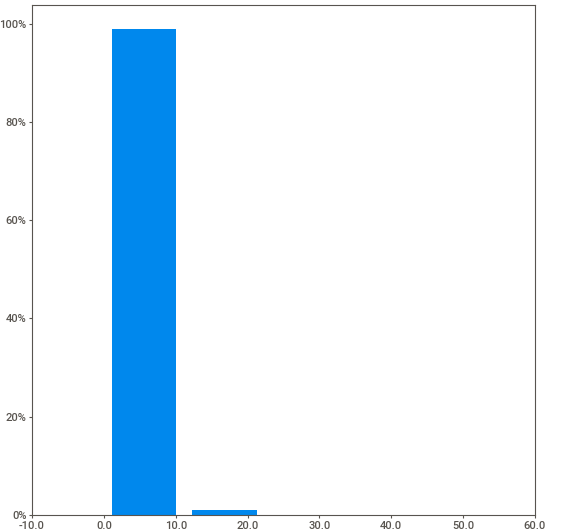
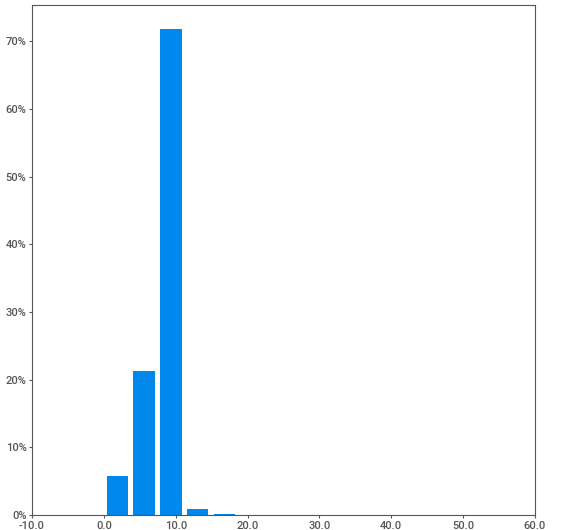
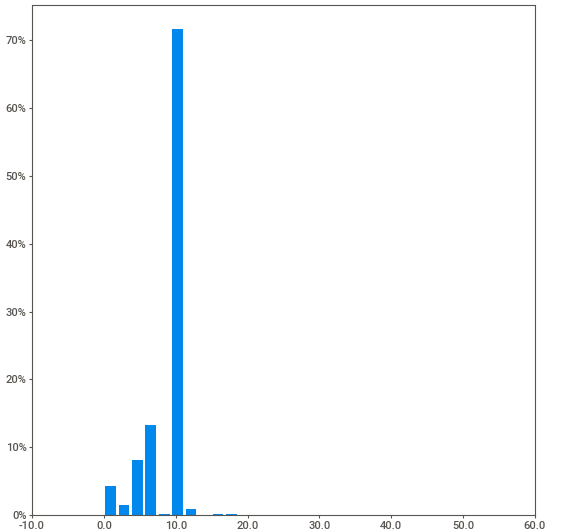
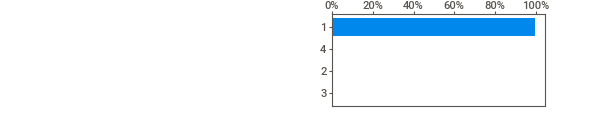
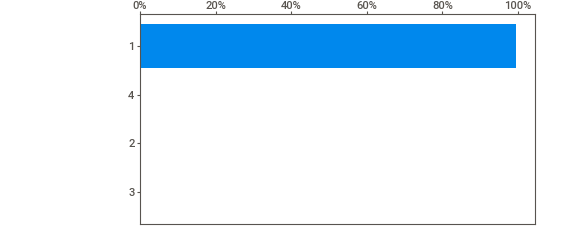
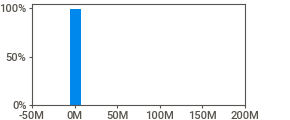
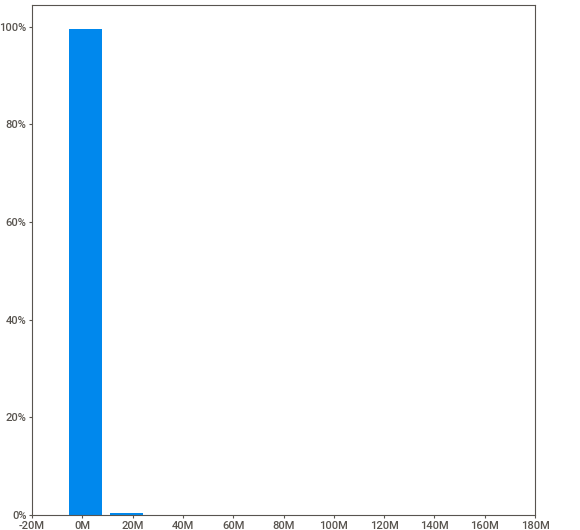
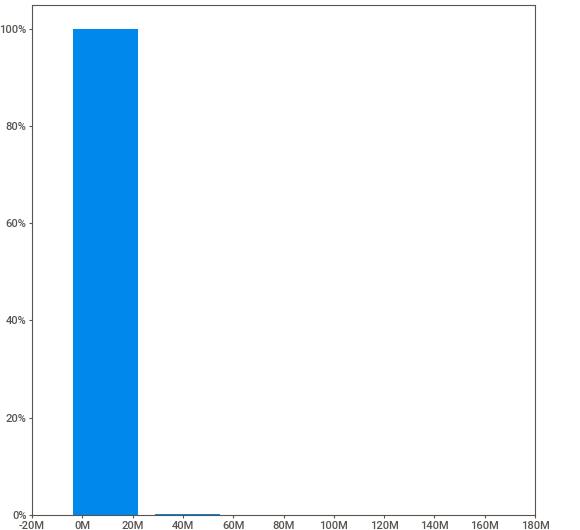
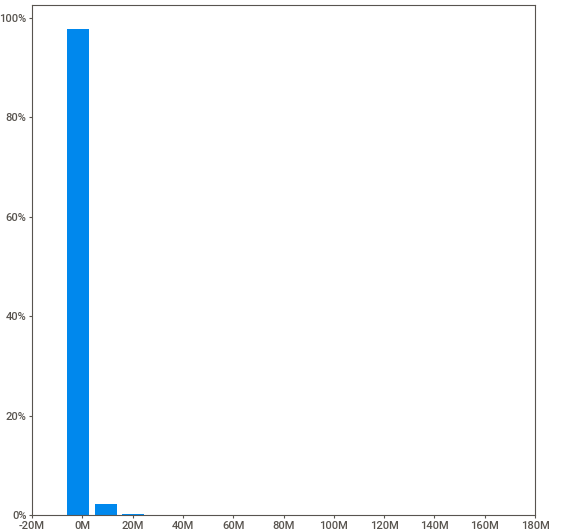
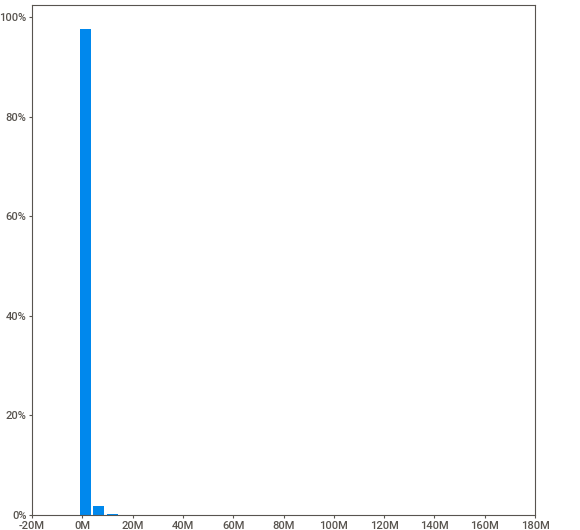
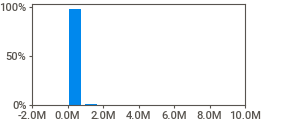
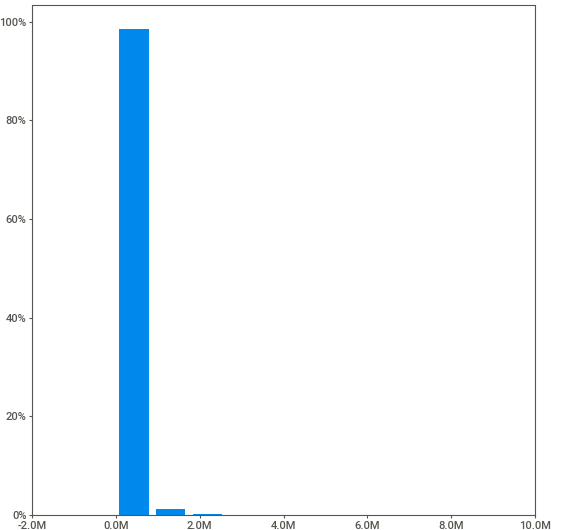
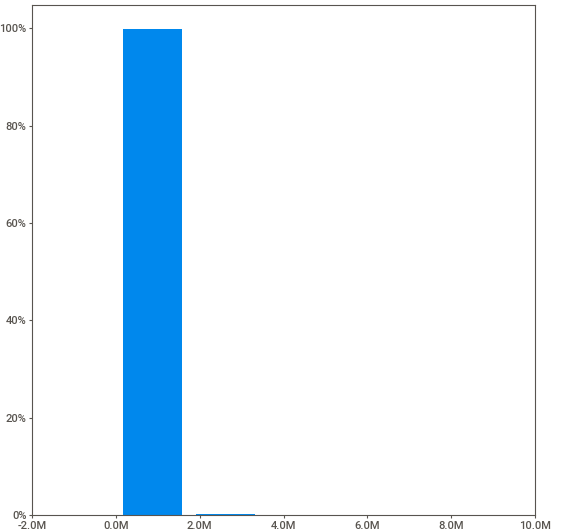
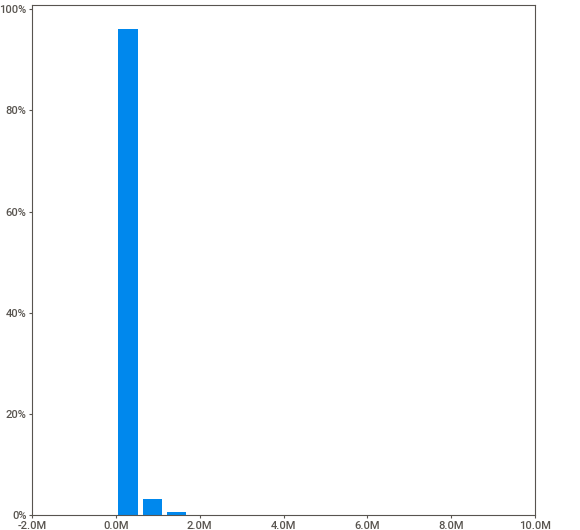
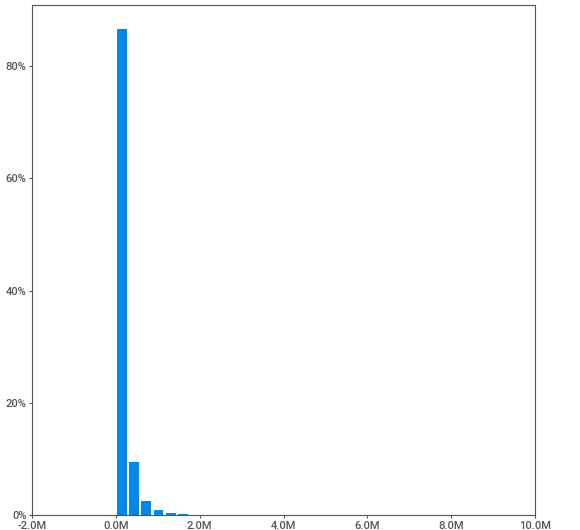
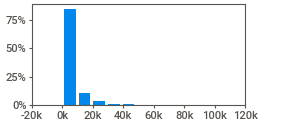
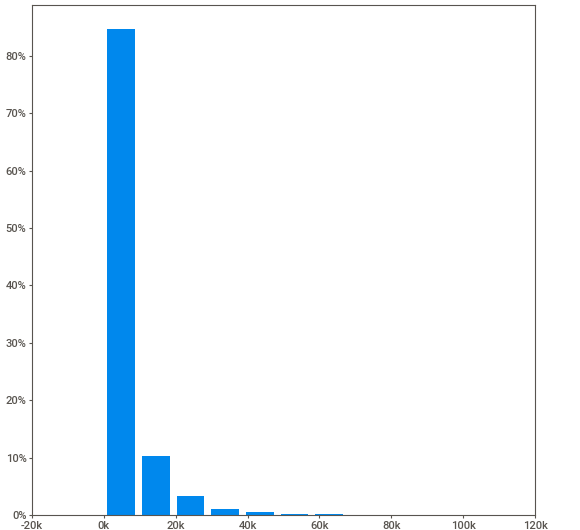
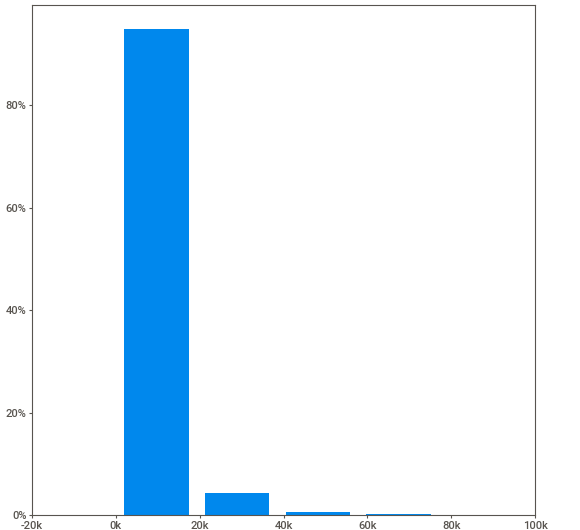
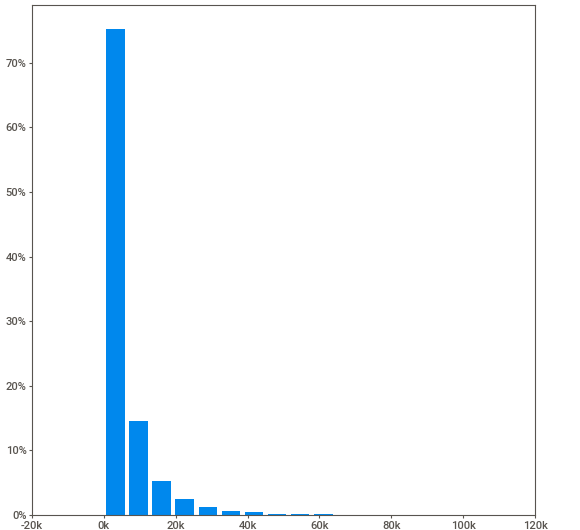
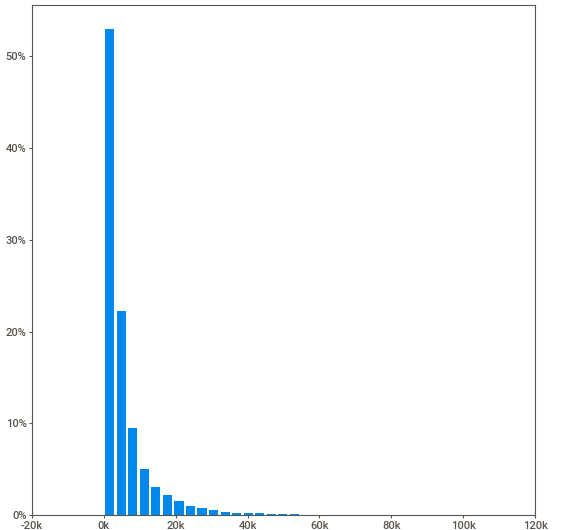
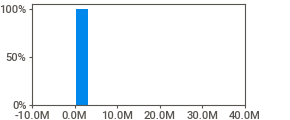
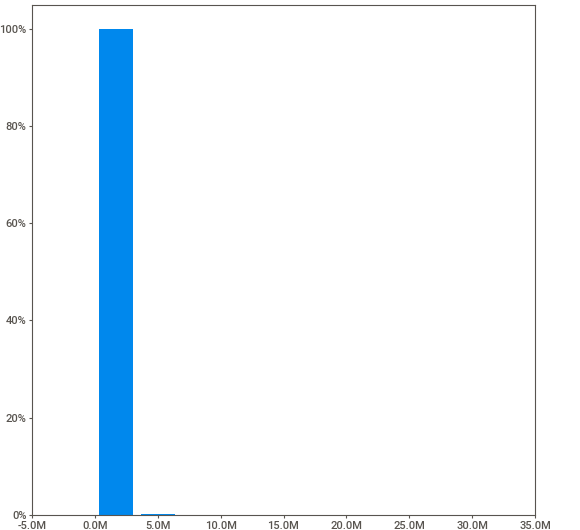
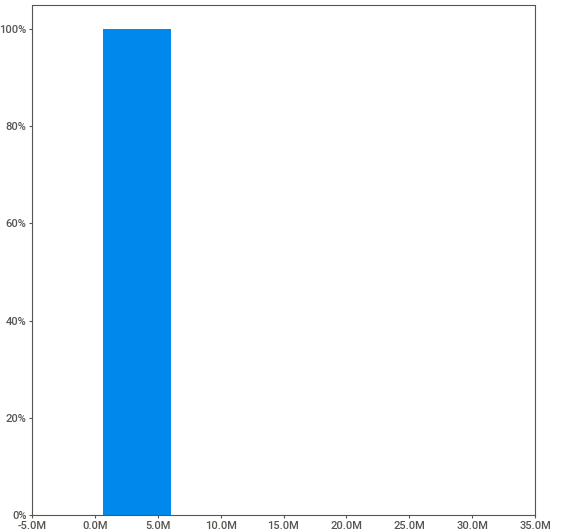
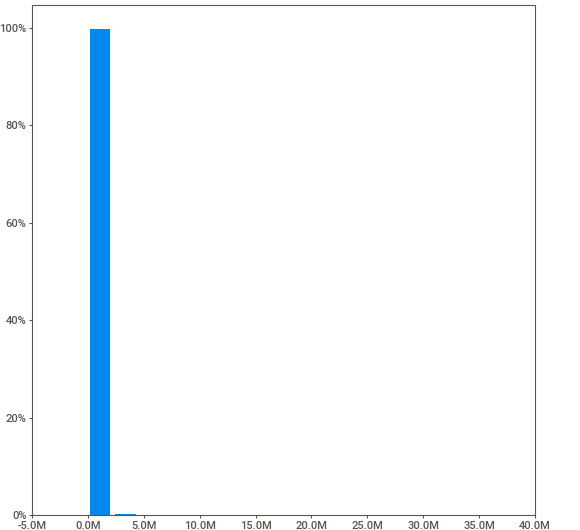
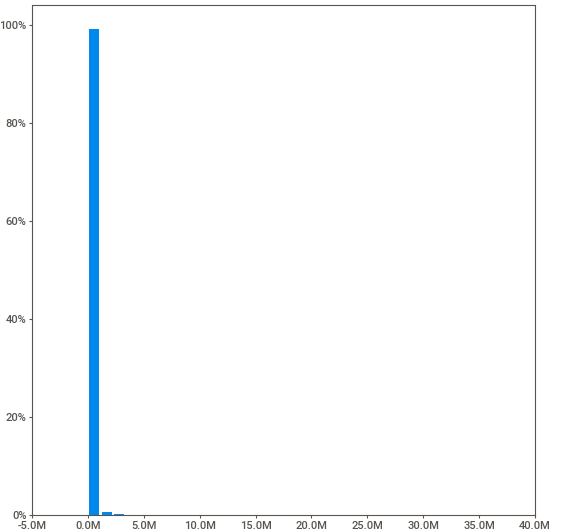
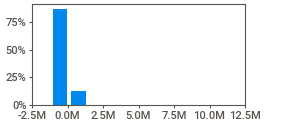
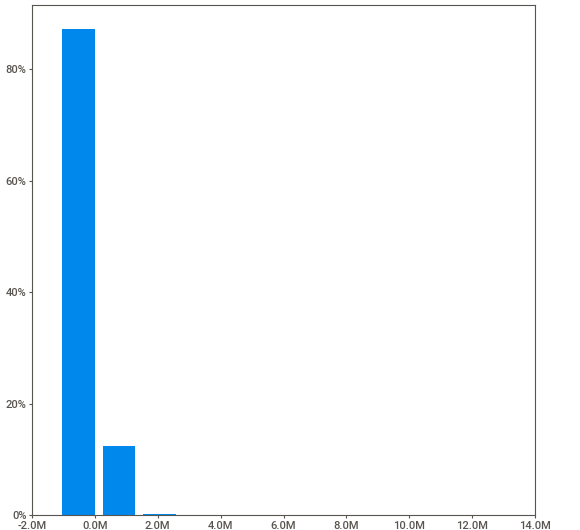
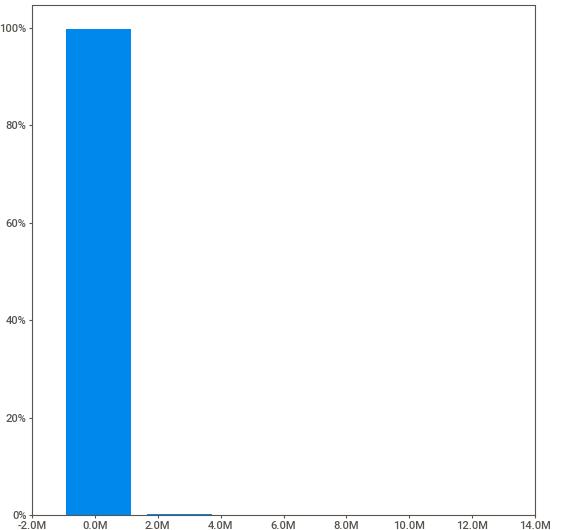
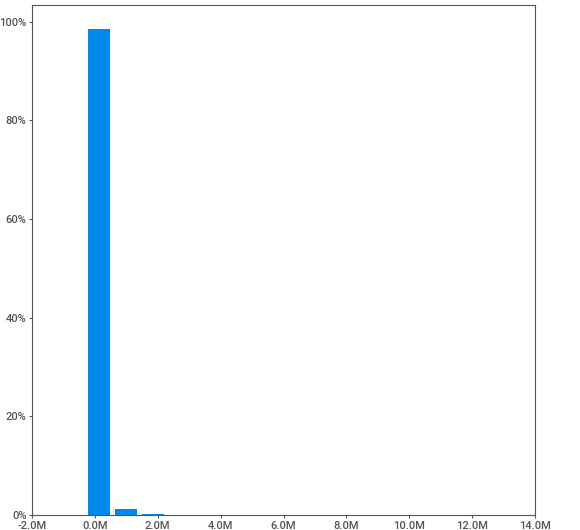
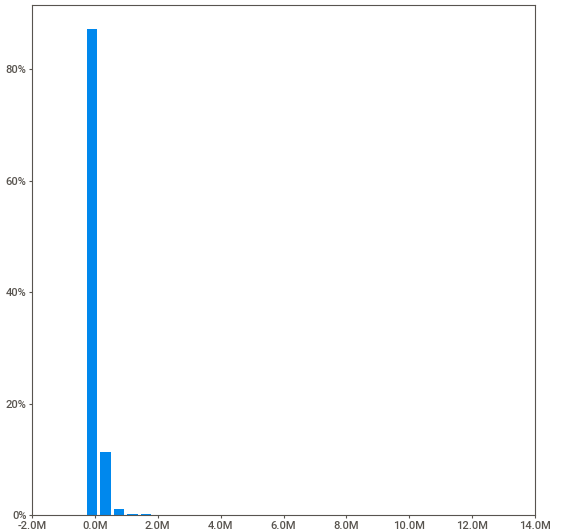
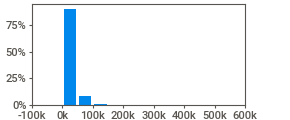
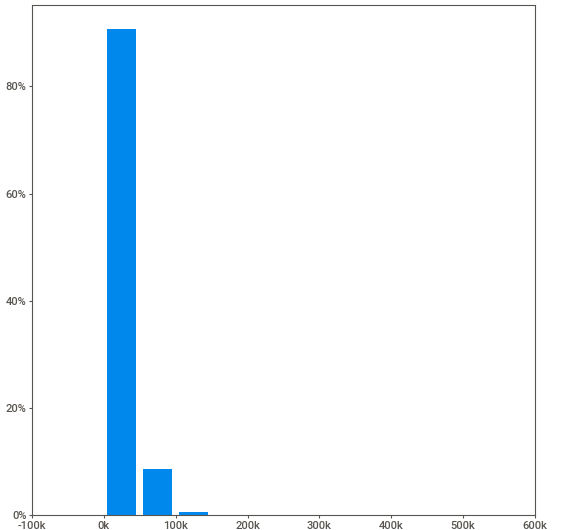
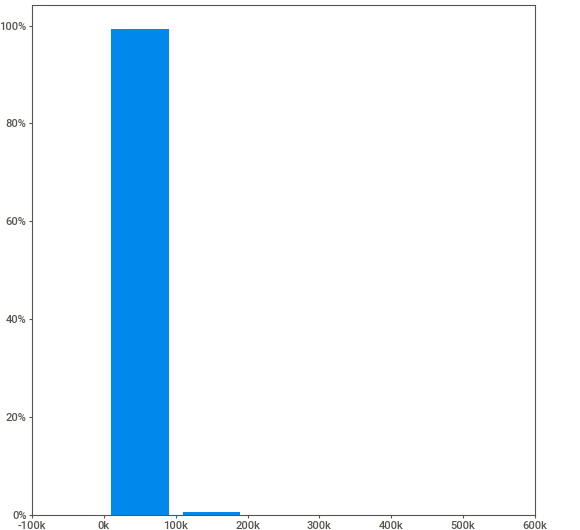
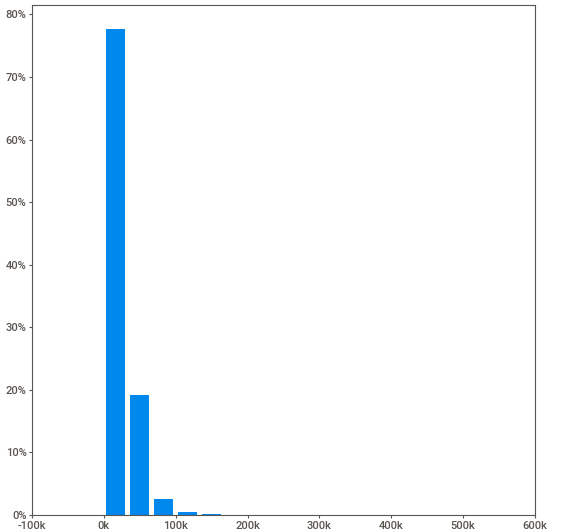
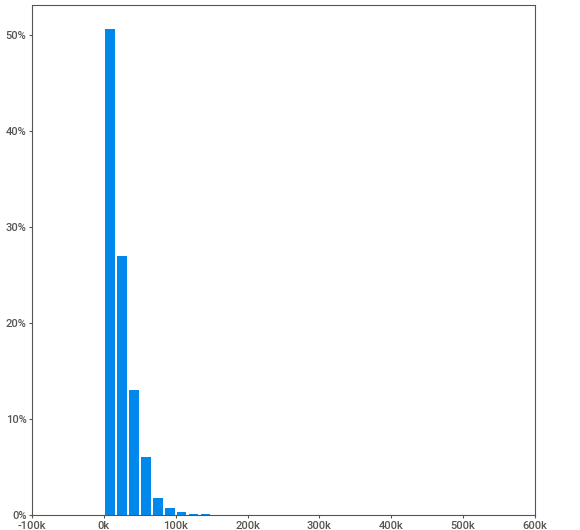
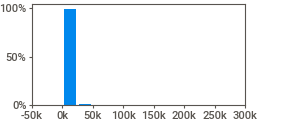
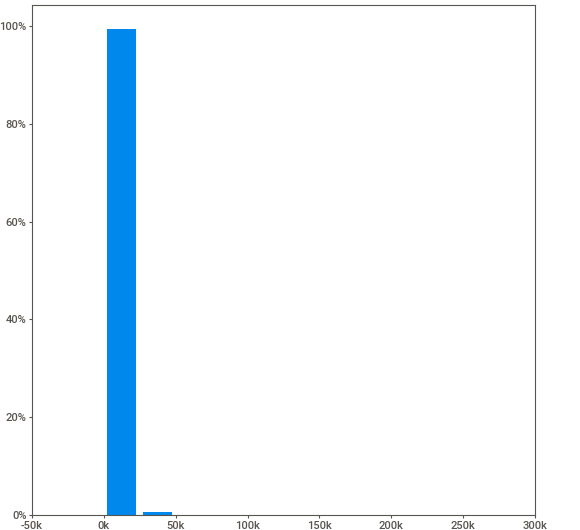
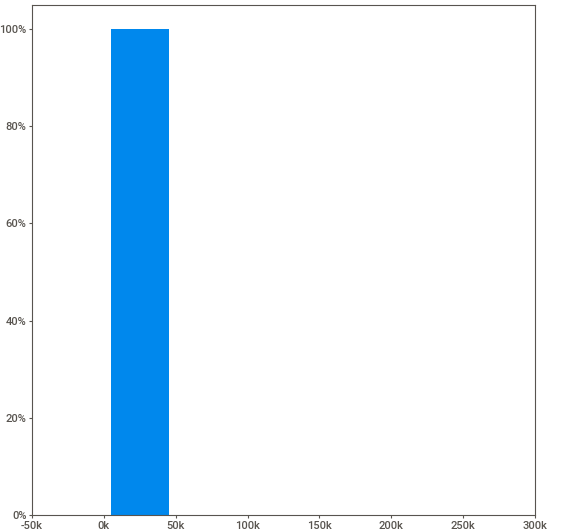
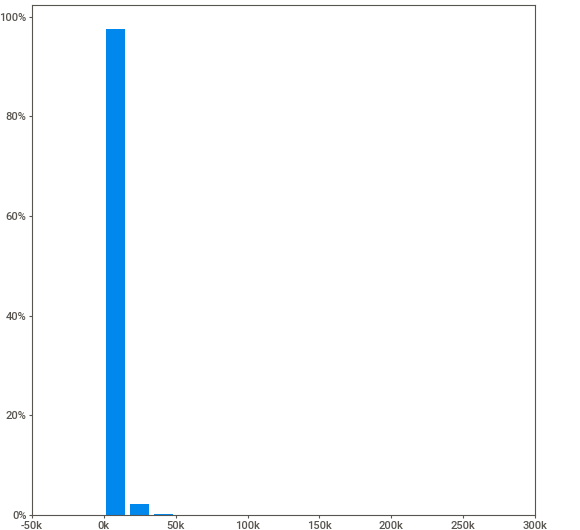
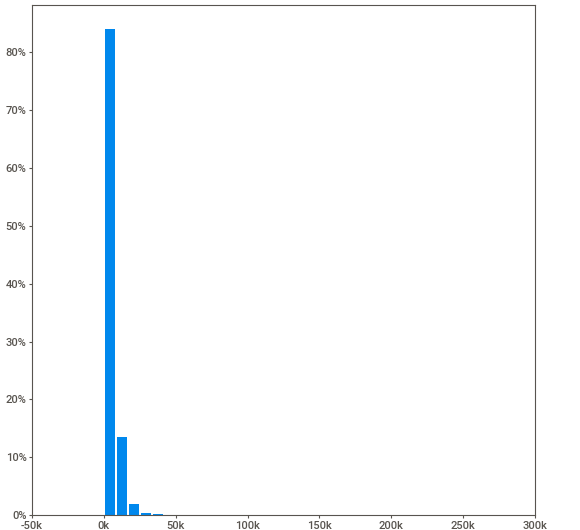
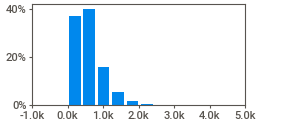
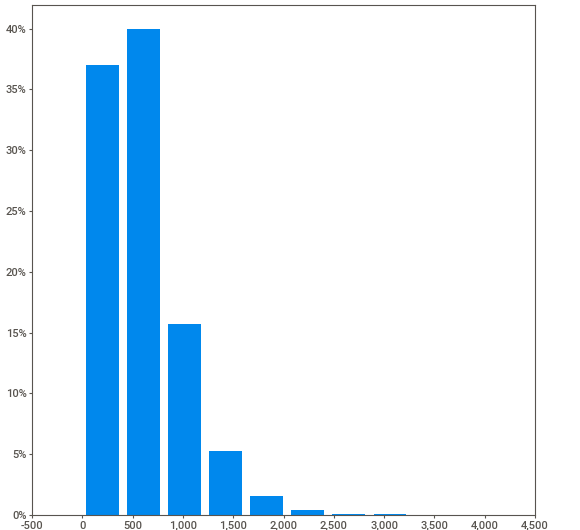
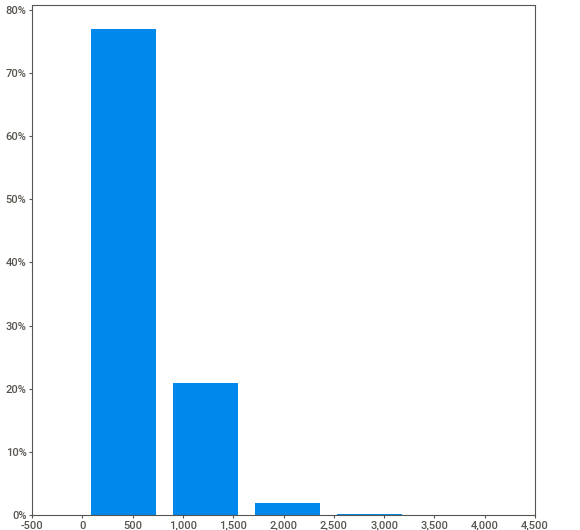
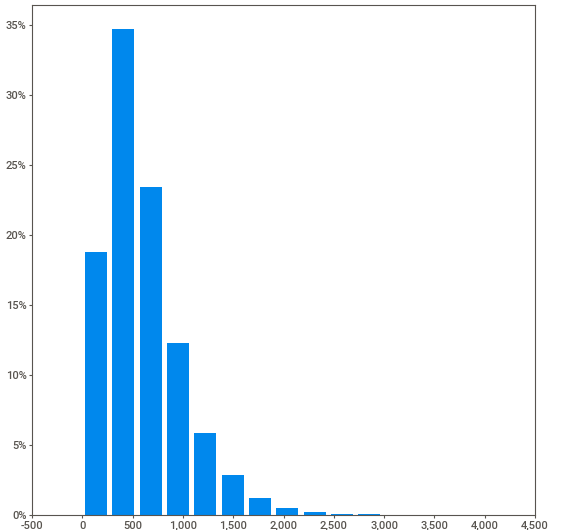
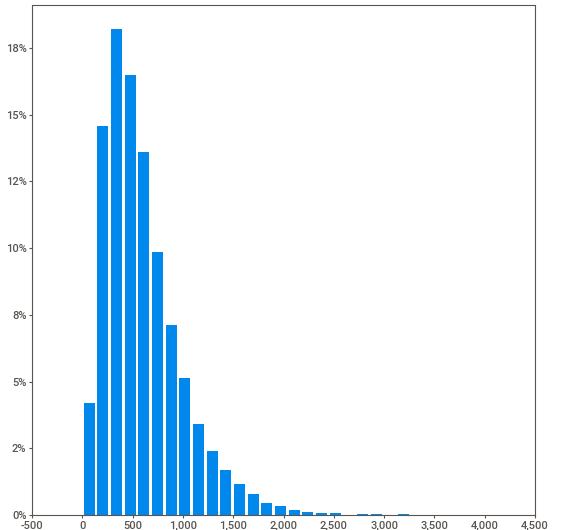
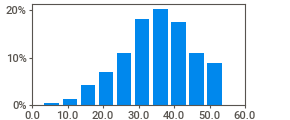
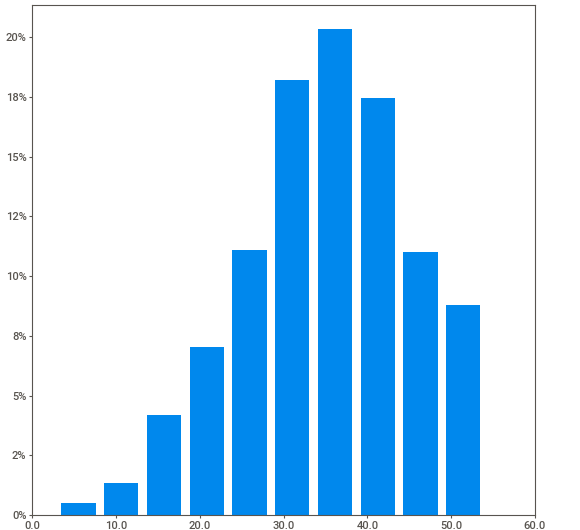
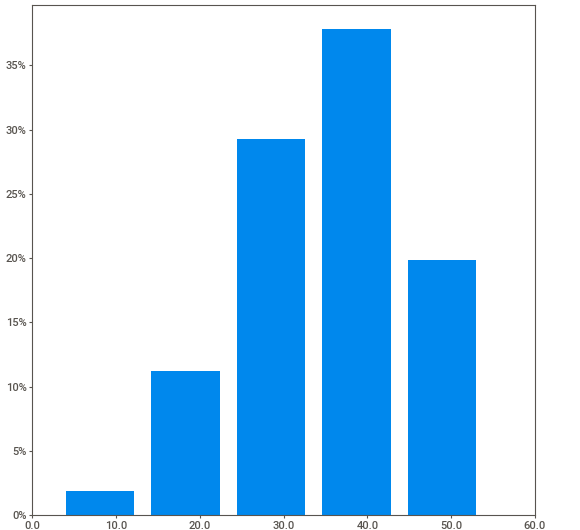
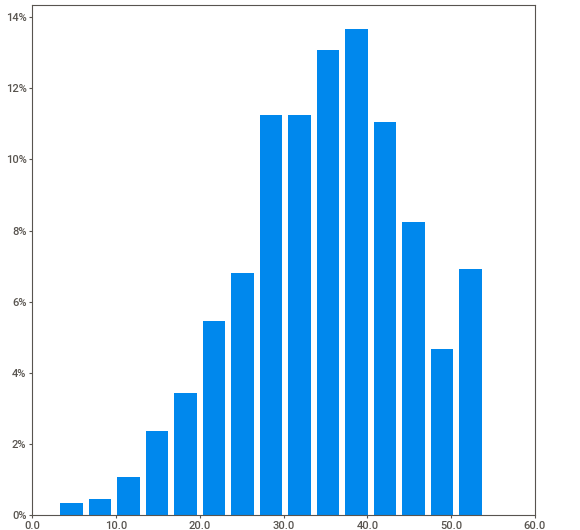
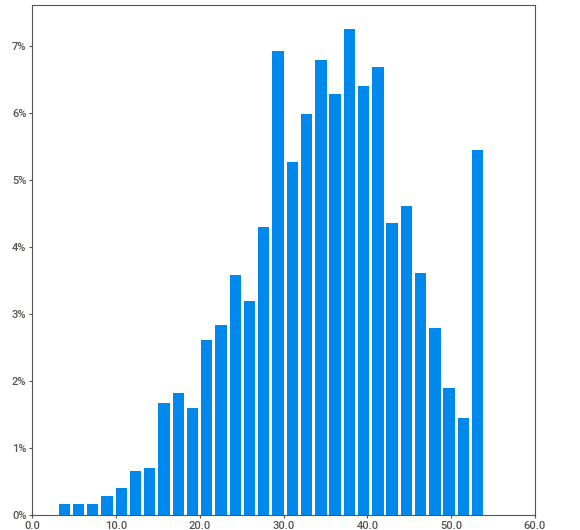
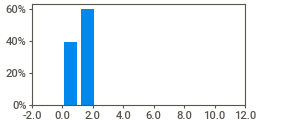
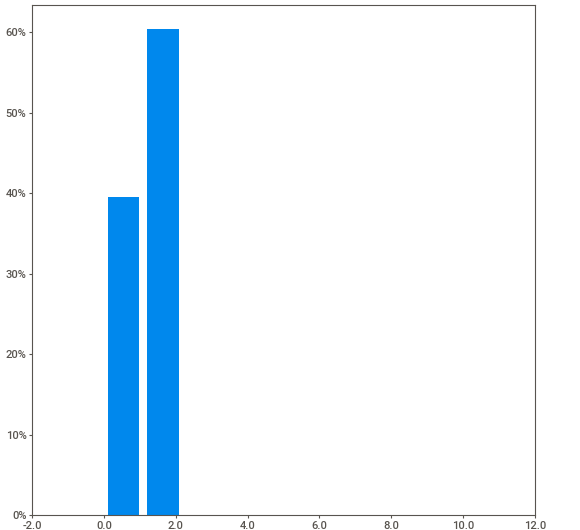
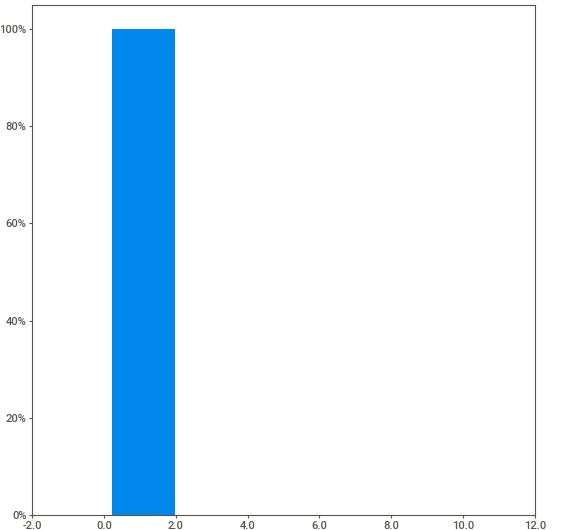
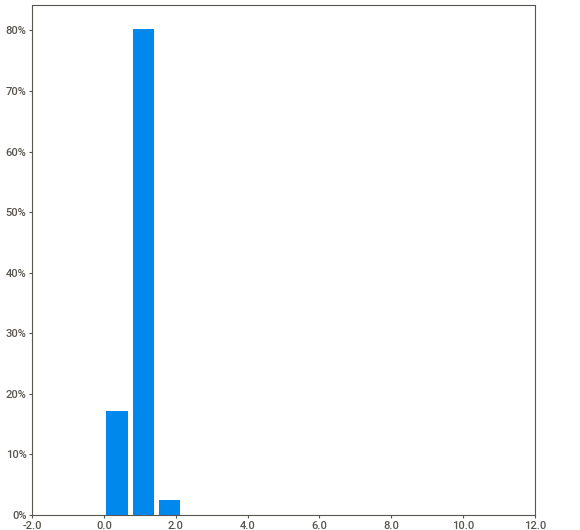
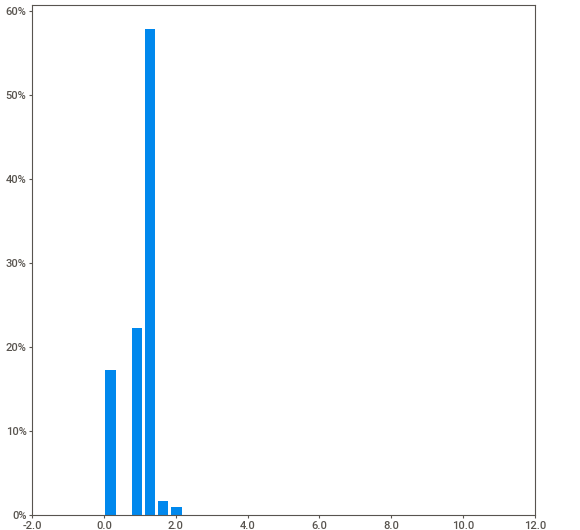
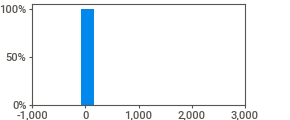
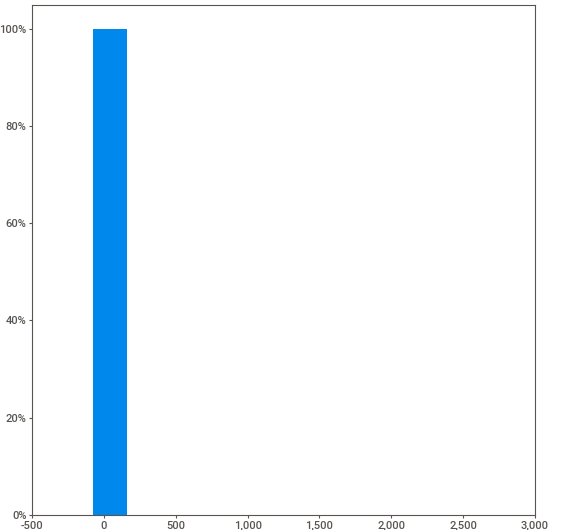
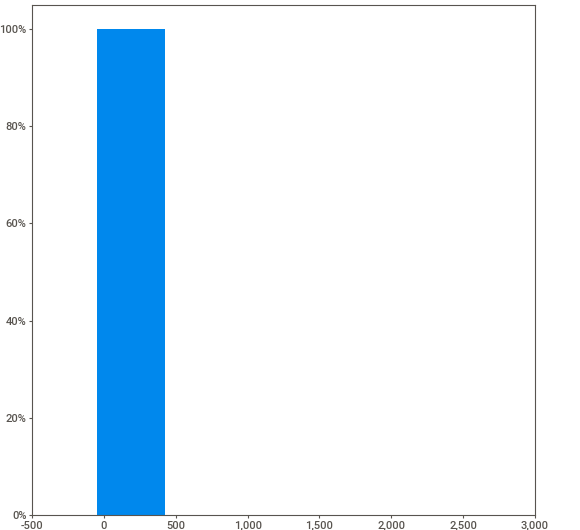
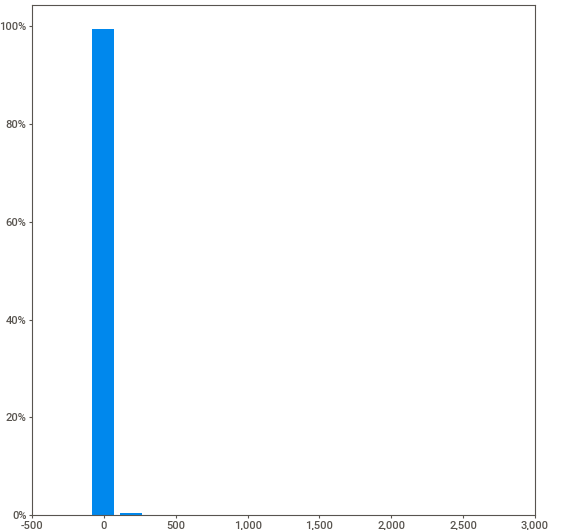
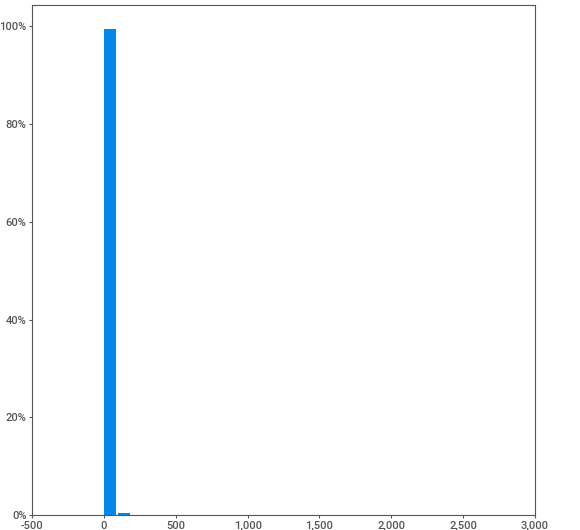
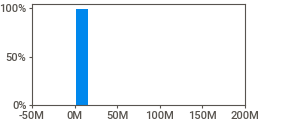
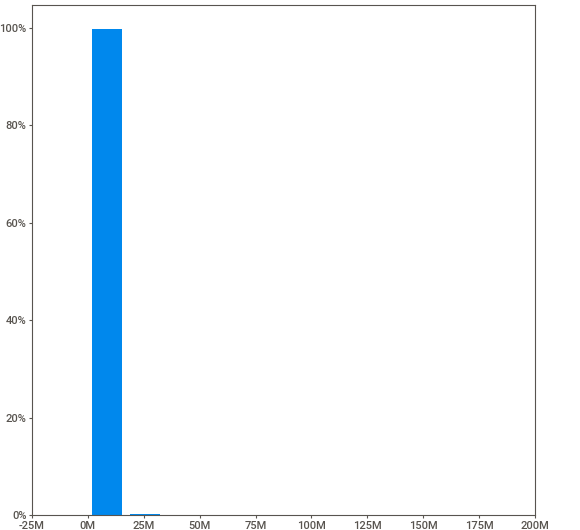
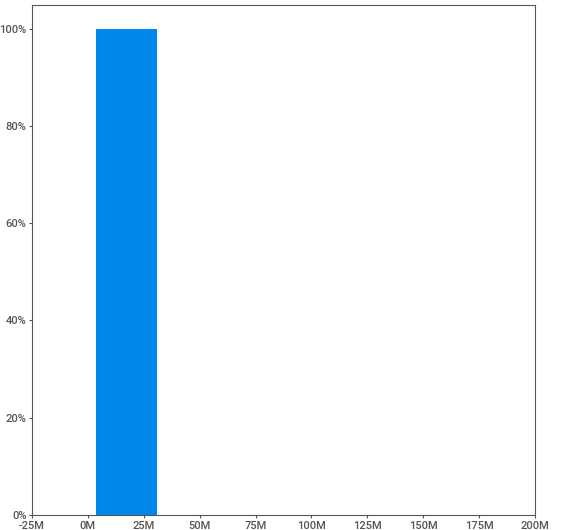
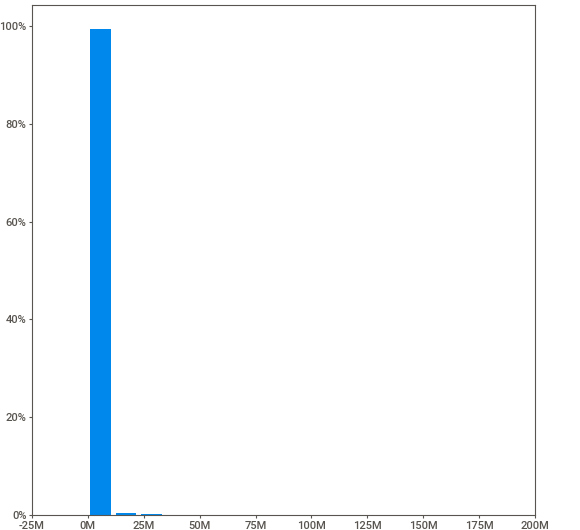
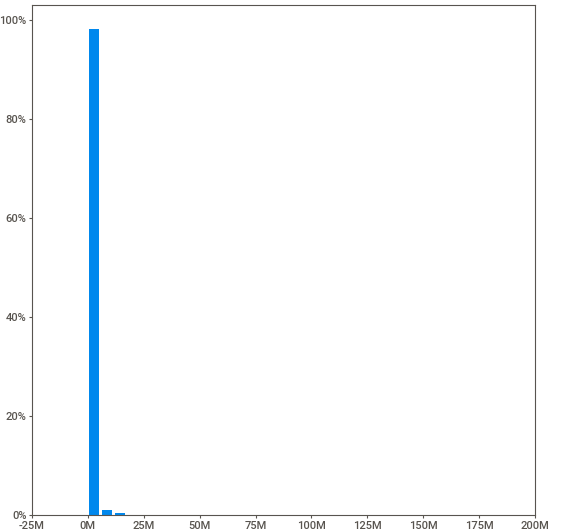
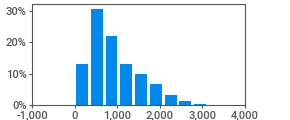
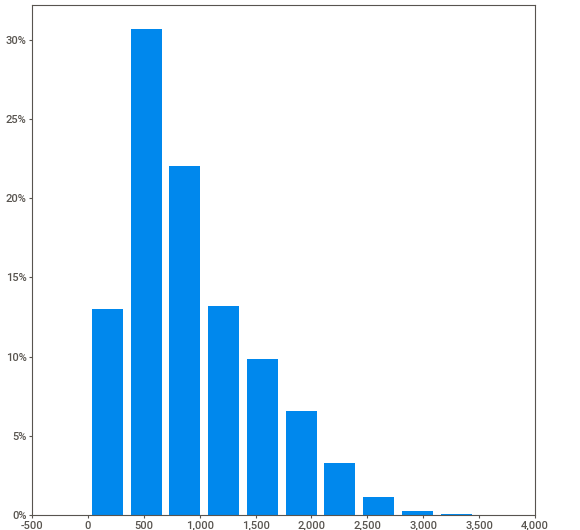
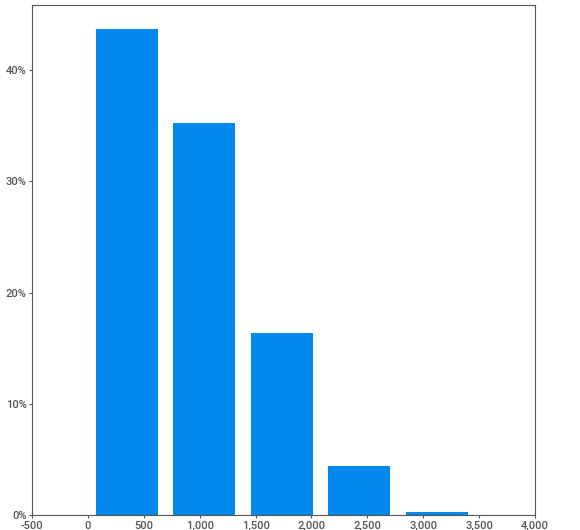
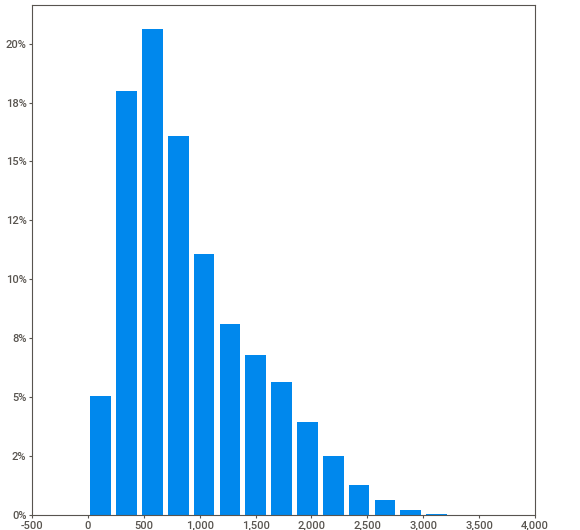
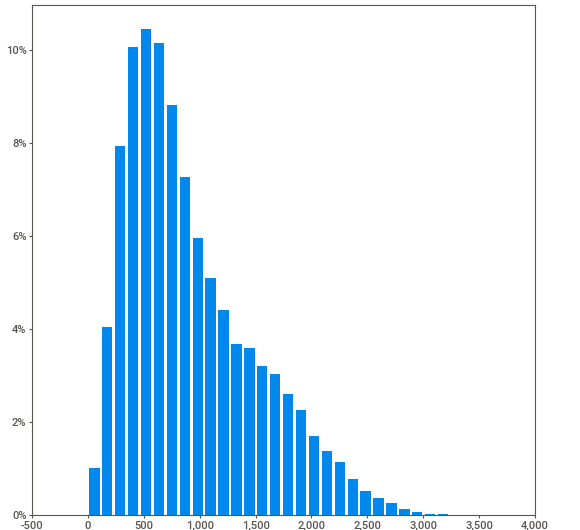
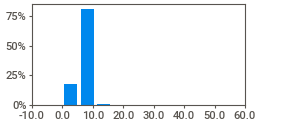
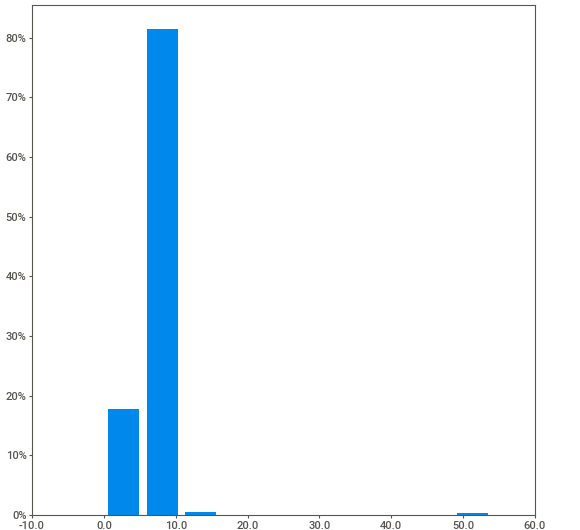
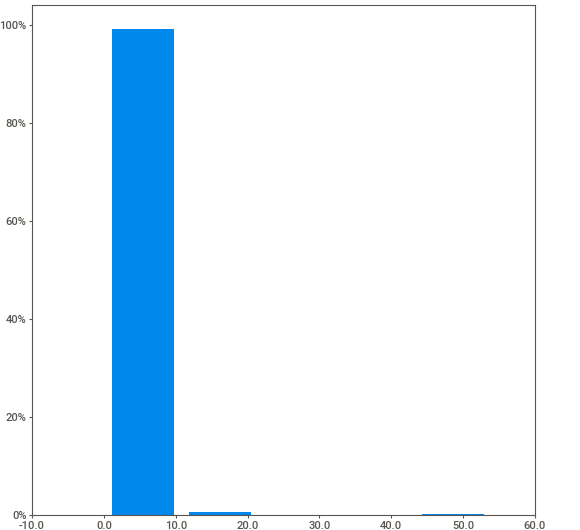
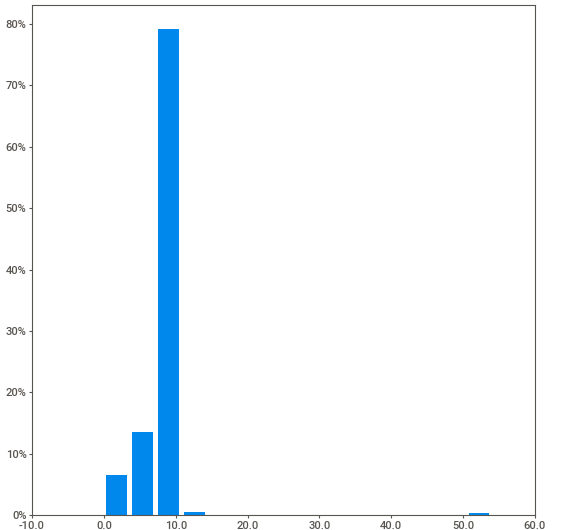
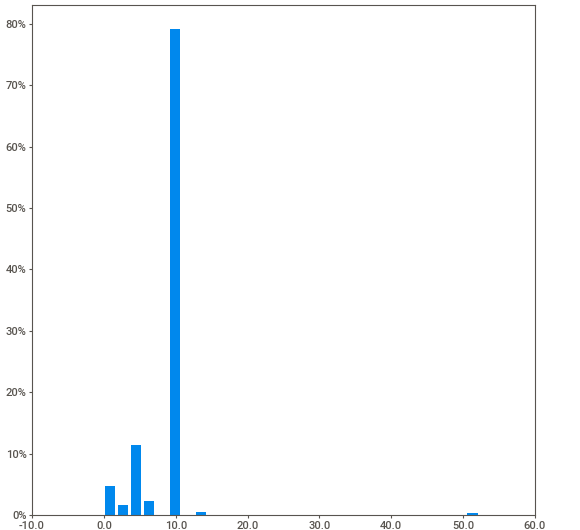
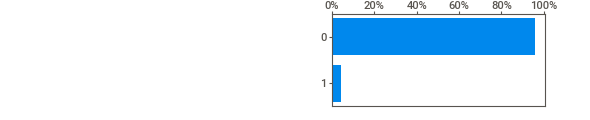
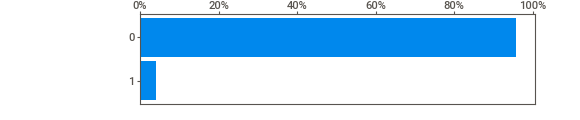
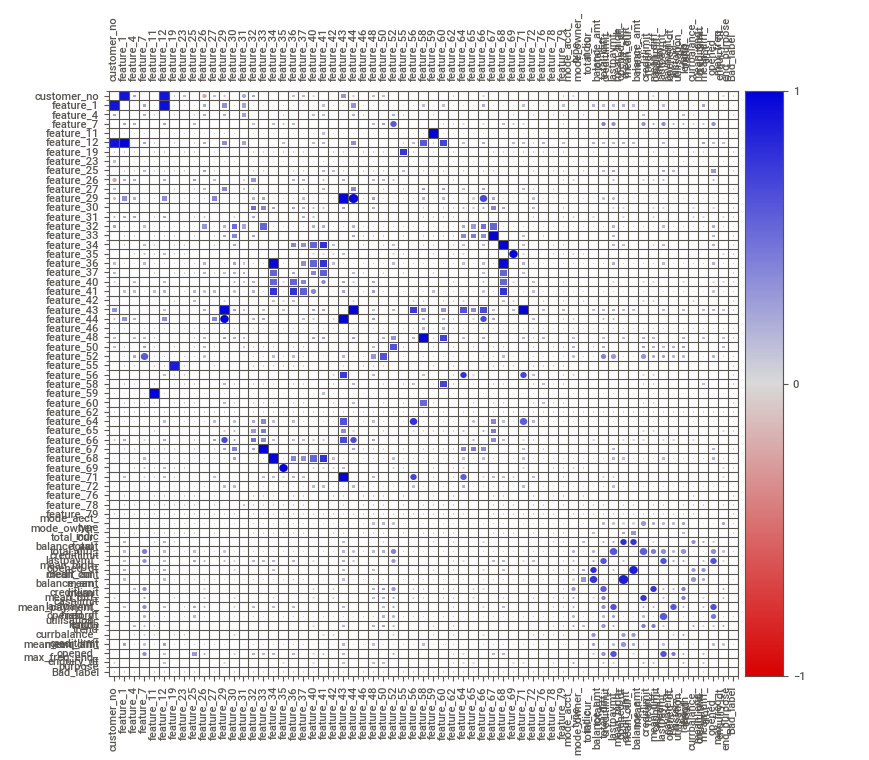
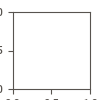

In [402]:
my_report.show_notebook(layout='vertical')

#### Univariate Analysis Insights

- Target variable 'Bad_label' is 96% Good credit history and 4% Bad credit history. The target class is imbalanced.

- 38% of customers use Platinum Maxima Credit card and another 36% use Platinum Delight.
- 61% of customers have an education level of Graduate.
- 95% of customers used PAN Card as official identification.


##### Target Variable

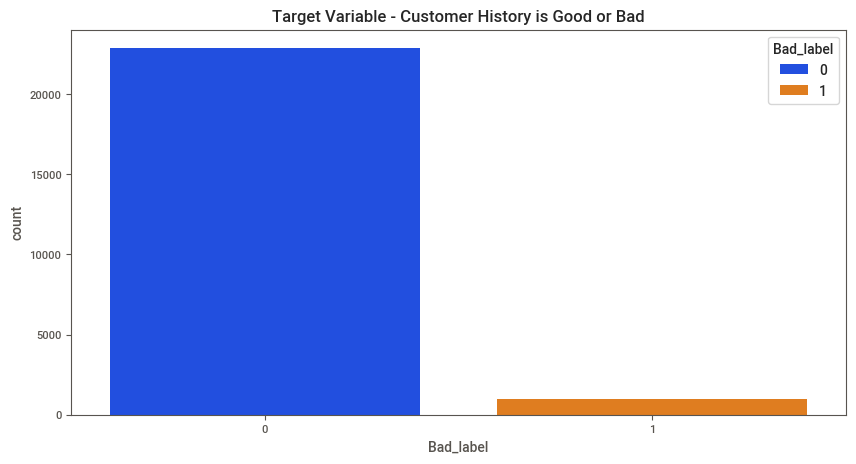

In [336]:
plt.figure(figsize=(10,5))
sns.countplot(customer_df_full, x='Bad_label', hue='Bad_label', palette='bright').set_title('Target Variable - Customer History is Good or Bad')
plt.show()

- The target variable is considerably imbalanced.
- Before the prediction model is trained, Synthetic Minority Oversampling Technique (SMOTE) will be used to balance the data for better prediction results.

## Data Preparation

In [452]:
encoded_data = customer_df_full.copy()

### Data Encoding

- Categorical data are encoded into numerical format before further analysis.

In [453]:
for col in encoded_data.columns:
  if str(encoded_data.dtypes[col]) == 'object':
    print(f'{col} unique values: {encoded_data[col].unique()}')
    print()

feature_1 unique values: ['Insignia' 'Platinum Deligh' 'Platinum Maxima' 'Golf Card'
 'Titanium Deligh' 'Platinum Cricke' 'RBL Bank Fun+']

feature_11 unique values: ['Y' 'N']

feature_12 unique values: ['IS1' 'IS2' 'PD1' 'PM1' 'GO1' 'TD1' 'TD2' 'PM2' 'DD1' 'DD2' 'PM3' 'PM4'
 'PD2' 'PD3' 'PB1' 'PB2']

feature_23 unique values: ['N' 'Y']

feature_27 unique values: ['Others' 'CA' 'Graduate' 'Post-Graduate' 'Professional' 'MBA/MMS'
 'Diploma' 'Doctor' 'Engineer' 'Architect']

feature_32 unique values: ['Self' 'Paren' 'Compa' 'Rente' 'PG/Ho']

feature_33 unique values: ['Y' 'N']

feature_36 unique values: ['Others' 'Government Organisation' 'Public Ltd Co.' 'Proprietorship'
 'Private Ltd. Co.' 'MNC' 'Partnership' 'PSU' 'Partnership Co.']

feature_37 unique values: ['Others' 'Banking/Financial Services' 'Information Technology'
 'Manufacturing' 'KPO/LPO/ITES' 'Industrial' 'Health Care' 'Real Estate'
 'Transportation/Logistics' 'Tourism' 'Agriculture']

feature_43 unique values: ['Mumbai' 'B

In [454]:
# encode categorical features with label encoder
le = LabelEncoder()
le_cols = [
    'feature_1', 'feature_12', 'feature_27', 'feature_32', 'feature_36',
    'feature_37', 'feature_43', 'feature_46', 'feature_48',
]

for col in le_cols:
  encoded_data[col] = le.fit_transform(encoded_data[col])

# encode yes-no features
yes_no_mapping = {
    'N': 0,
    'Y': 1
}
yes_no_cols = [
    'feature_11', 'feature_23', 'feature_33', 'feature_50', 'feature_58',
    'feature_59', 'feature_60', 'feature_62', 'feature_79',
]
encoded_data[yes_no_cols] = encoded_data[yes_no_cols].replace(yes_no_mapping)

# encode feature_72
encoded_data['feature_72'] = encoded_data['feature_72'].replace({'R': 0, 'O': 1})

In [455]:
encoded_data.head()

customer_no  feature_1  feature_4  feature_7  feature_11  feature_12  \
0            1          1          2   500000.0           1           3   
1            2          1          1  1200000.0           1           3   
2            3          1          1   700000.0           1           3   
3            4          1          1   500000.0           1           3   
4            5          1          3   500000.0           1           3   

   feature_19  feature_23  feature_25  feature_26  feature_27  feature_29  \
0           1           0           1           2           7    400610.0   
1           1           0           1           2           7    560042.0   
2           2           0           1           0           7    560042.0   
3           1           0           1           3           7    411001.0   
4           1           0           1           3           7    122009.0   

   feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  \
0        1965           0           4           1           2       90000   
1        1969           0           4           1           2           1   
2        1966           0           4           1           2           1   
3        1988           0           4           1           2      100000   
4        1995           0           4           1           2      300000   

   feature_36  feature_37  feature_40  feature_41  feature_42  feature_43  \
0           2           7           0           0           0          43   
1           2           7           0           0           0           6   
2           2           7           0           0           0           6   
3           2           7           0           0           0          51   
4           2           7           0           0           0          28   

   feature_44  feature_46  feature_48  feature_50  feature_52  feature_55  \
0    400059.0           3          51           1         0.0           1   
1    560042.0           3          51           0         0.0           1   
2    560042.0           3          33           0         0.0           3   
3    411026.0           3          51           1         0.0           1   
4    122009.0           3          51           0         0.0           1   

   feature_56  feature_58  feature_59  feature_60  feature_62  feature_64  \
0          21           1           1           0           1          21   
1          17           1           1           0           1          17   
2          17           0           1           0           1          17   
3          21           1           1           0           1          21   
4          13           1           1           0           1          13   

   feature_65  feature_66  feature_67  feature_68  feature_69  feature_71  \
0        15.0    400610.0           0           2     90000.0          21   
1        12.0    560042.0           0           2         1.0          17   
2        12.0    560042.0           0           2         1.0          17   
3        16.0    411001.0           0           2    100000.0          21   
4         3.0    122009.0           0           2    300000.0          13   

   feature_72  feature_76  feature_78  feature_79  mode_acct_type  \
0           0           0           1           0              10   
1           0           0           1           0              10   
2           0           0           1           0              10   
3           0           1           1           0              10   
4           0           0           1           0              10   

   mode_owner_indic  total_cur_balance_amt  total_creditlimit  \
0                 1              4714857.0           670000.0   
1                 1                30754.0          1000000.0   
2                 1                17864.0                0.0   
3                 1              1845569.0           956000.0   
4                 1               

In [456]:
encoded_data.shape

(23881, 63)

### Feature Selection

- Correlation coefficient is used to compare the correlation between the features in the dataset.
- Independent variables with high correlation with each other can be identified and removed to reduce multicollinearity.

<Axes: >

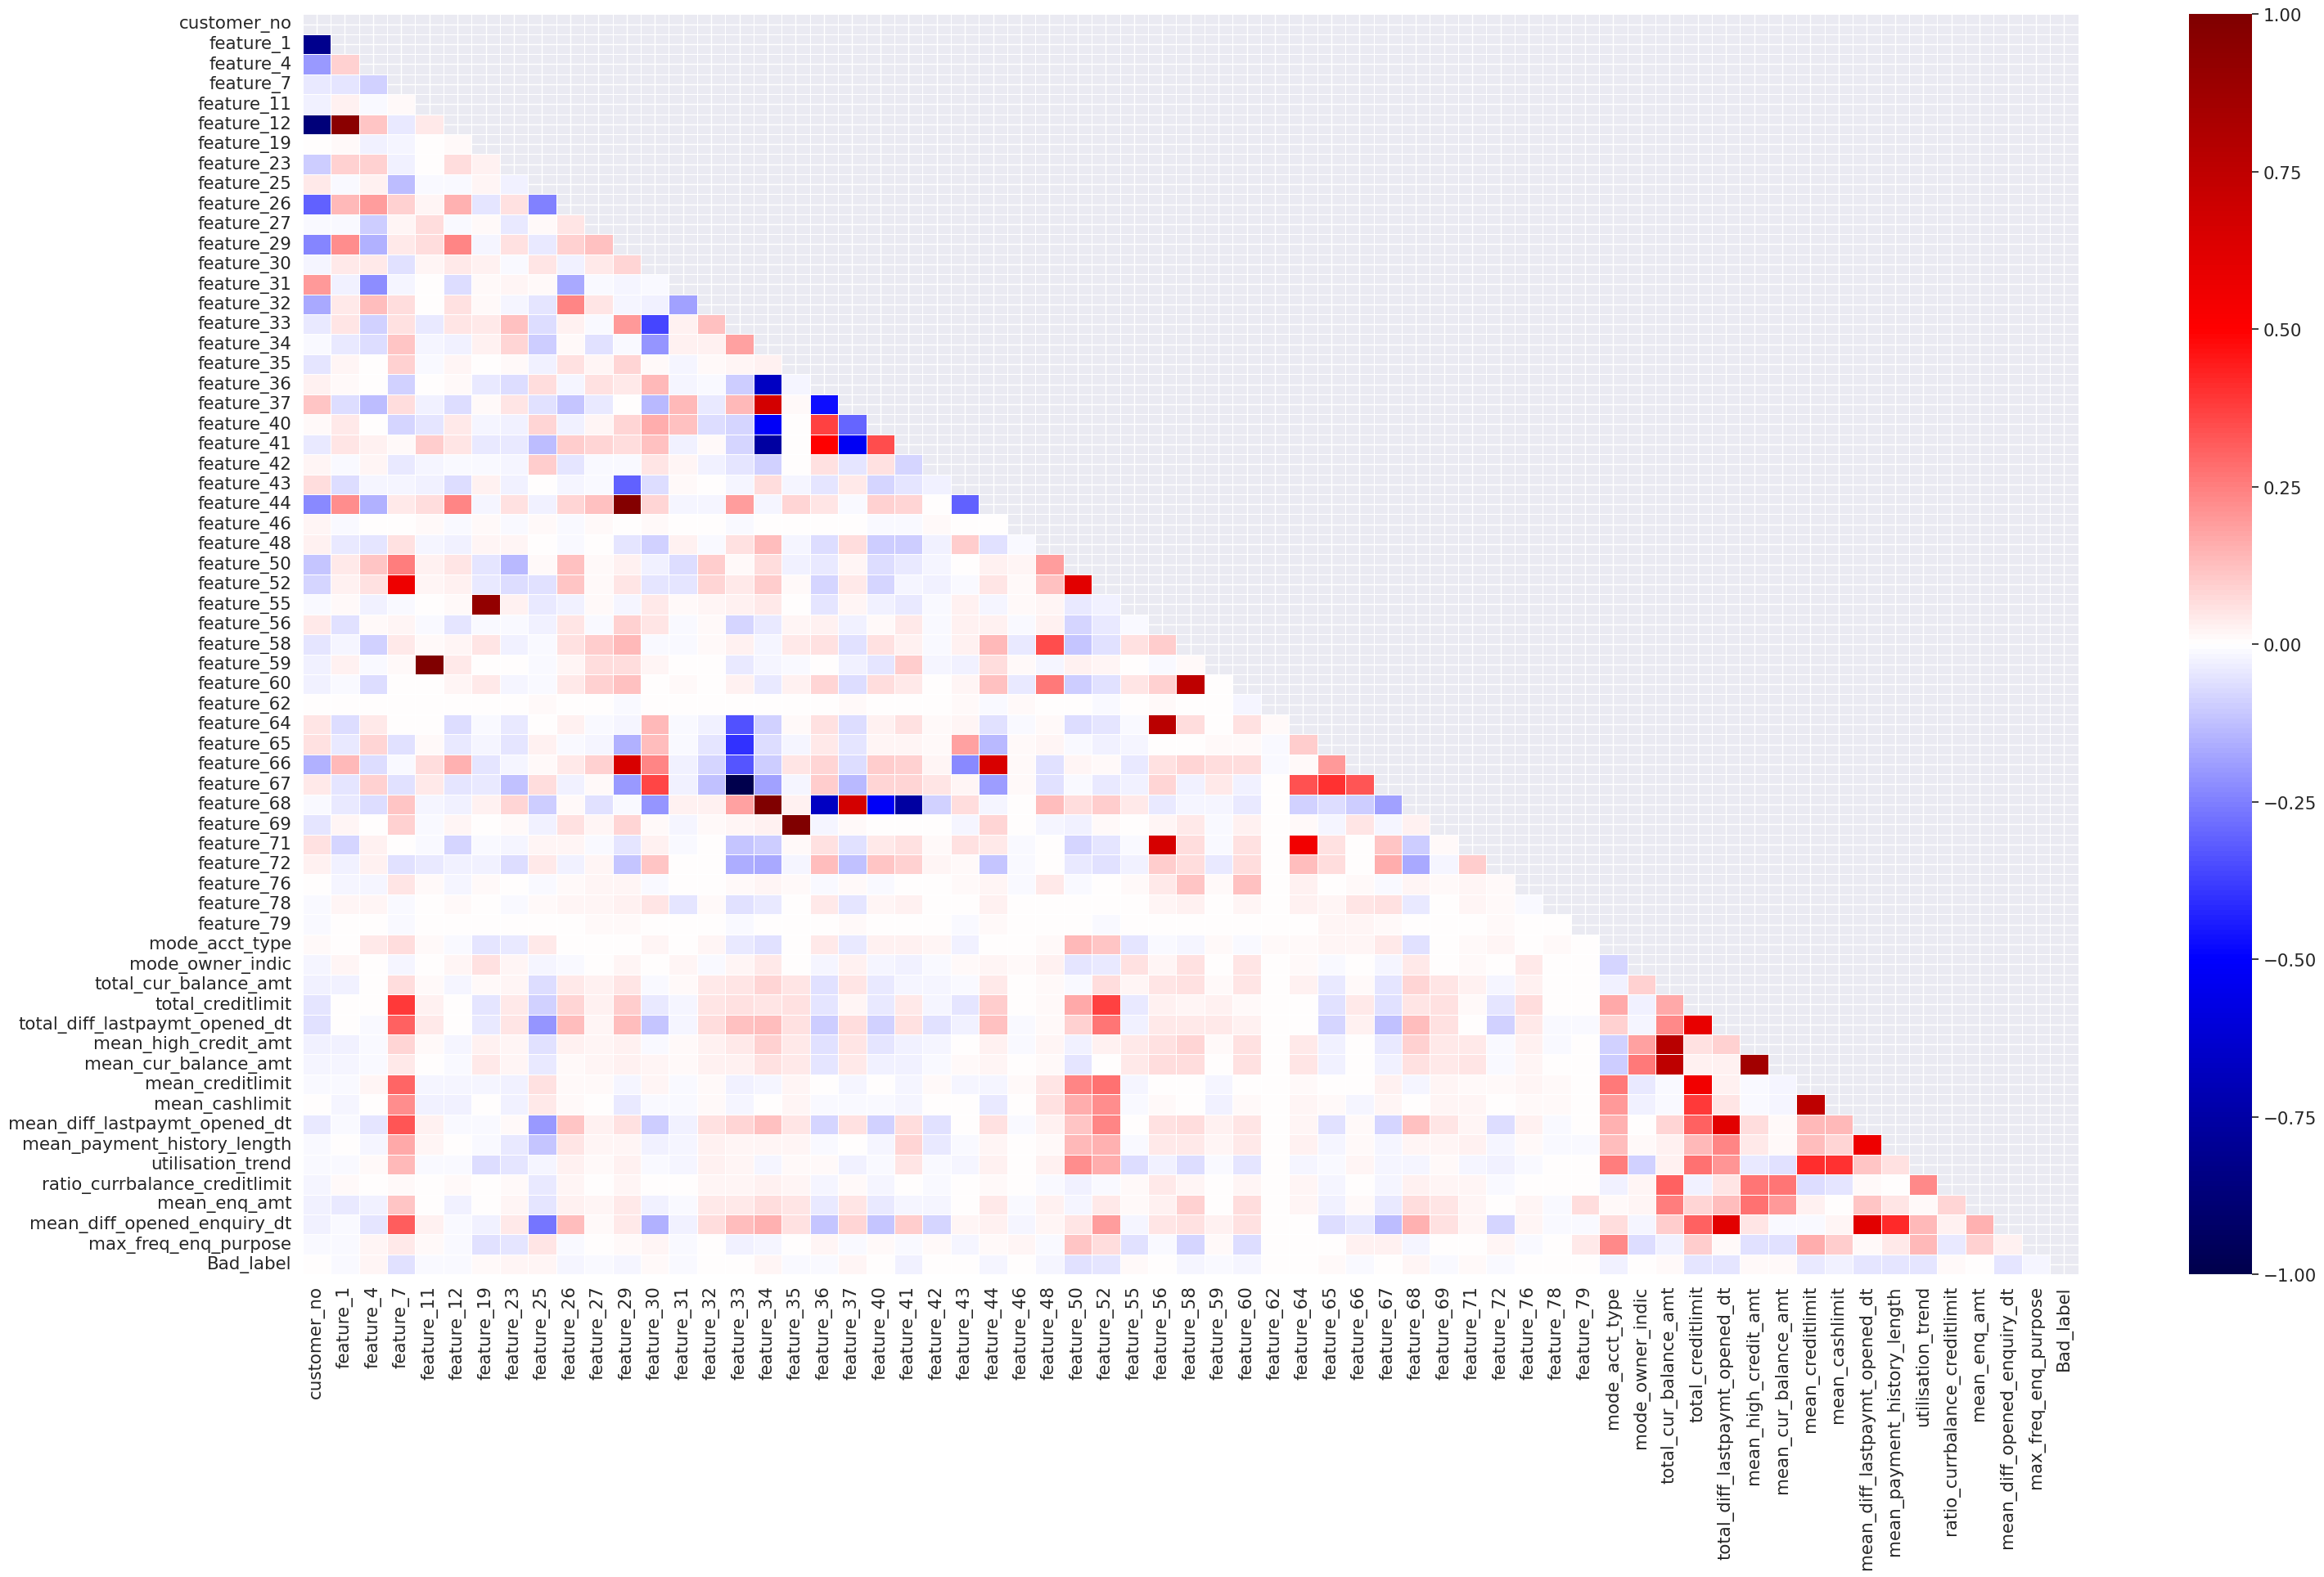

In [457]:
corr_matrix = encoded_data.corr().round(2)
heat_mask = np.zeros_like(corr_matrix, dtype=bool)
heat_mask[np.triu_indices_from(heat_mask)] = True

sns.set(font_scale=1.4)
plt.figure(figsize = (35, 20))
sns.heatmap(encoded_data.corr().round(2), cmap='seismic', linewidths=0.5, mask=heat_mask)

In [458]:
# drop correlated features to reduce multicollinearity
drop_cols = [
    'customer_no', 'feature_7', 'feature_12', 'feature_33', 'feature_34', 'feature_48', 'feature_52', 'feature_59', 'feature_68',
    'total_cur_balance_amt', 'total_creditlimit', 'total_diff_lastpaymt_opened_dt',
]
encoded_data = encoded_data.drop(drop_cols, axis=1)

In [459]:
encoded_data.columns = encoded_data.columns.astype(str)

In [460]:
encoded_data.shape

(23881, 51)

### Feature Scaling

- Standard scaling is done for the continuous data variables to standardize the data with zero mean and unit variance.
- Min-Max scaling is done for ordinal data to ensure data values are in the same range.

In [461]:
scaled_df = encoded_data.copy()

In [462]:
scaled_df.head()

feature_1  feature_4  feature_11  feature_19  feature_23  feature_25  \
0          1          2           1           1           0           1   
1          1          1           1           1           0           1   
2          1          1           1           2           0           1   
3          1          1           1           1           0           1   
4          1          3           1           1           0           1   

   feature_26  feature_27  feature_29  feature_30  feature_31  feature_32  \
0           2           7    400610.0        1965           0           4   
1           2           7    560042.0        1969           0           4   
2           0           7    560042.0        1966           0           4   
3           3           7    411001.0        1988           0           4   
4           3           7    122009.0        1995           0           4   

   feature_35  feature_36  feature_37  feature_40  feature_41  feature_42  \
0       90000           2           7           0           0           0   
1           1           2           7           0           0           0   
2           1           2           7           0           0           0   
3      100000           2           7           0           0           0   
4      300000           2           7           0           0           0   

   feature_43  feature_44  feature_46  feature_50  feature_55  feature_56  \
0          43    400059.0           3           1           1          21   
1           6    560042.0           3           0           1          17   
2           6    560042.0           3           0           3          17   
3          51    411026.0           3           1           1          21   
4          28    122009.0           3           0           1          13   

   feature_58  feature_60  feature_62  feature_64  feature_65  feature_66  \
0           1           0           1          21        15.0    400610.0   
1           1           0           1          17        12.0    560042.0   
2           0           0           1          17        12.0    560042.0   
3           1           0           1          21        16.0    411001.0   
4           1           0           1          13         3.0    122009.0   

   feature_67  feature_69  feature_71  feature_72  feature_76  feature_78  \
0           0     90000.0          21           0           0           1   
1           0         1.0          17           0           0           1   
2           0         1.0          17           0           0           1   
3           0    100000.0          21           0           1           1   
4           0    300000.0          13           0           0           1   

   feature_79  mode_acct_type  mode_owner_indic  mean_high_credit_amt  \
0           0              10                 1             438892.39   
1           0              10                 1             558797.50   
2           0              10                 1             121523.00   
3           0              10                 1             723803.76   
4           0              10                 1            1831072.14   

   mean_cur_balance_amt  mean_creditlimit  mean_cashlimit  \
0             261936.50          37222.22         9333.33   
1              15377.00         500000.00            0.50   
2              17864.00              0.00            0.00   
3             108562.88          56235.29        21235.29   
4               1139.00              0.00            0.00   

   mean_diff_lastpaymt_opened_dt  mean_payment_history_length  \
0                         831.11                        28.17   
1                        2035.00                        54.00   
2                        2454.00                        54.00   
3                        2270.59                        37.76   
4                         193.86                        38.14   

   utilisation_trend  ratio_currbalance_

In [463]:
min_max_cols = [
    'feature_1', 'feature_4', 'feature_1', 'feature_19', 'feature_25', 'feature_26', 'feature_27',
    'feature_30', 'feature_31', 'feature_32', 'feature_35', 'feature_36', 'feature_37', 'feature_40',
    'feature_41', 'feature_42', 'feature_43', 'feature_46', 'feature_55', 'feature_56',
    'feature_64', 'feature_71', 'feature_76', 'feature_78', 'mode_acct_type', 'mode_owner_indic', 'max_freq_enq_purpose'
]
std_cols = [
    'feature_29', 'feature_44', 'feature_65', 'feature_66', 'feature_69',
    'mean_high_credit_amt', 'mean_cur_balance_amt', 'mean_creditlimit', 'mean_cashlimit',
    'mean_diff_lastpaymt_opened_dt', 'mean_payment_history_length', 'utilisation_trend',
    'ratio_currbalance_creditlimit', 'mean_enq_amt'
]

min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()

scaled_df[min_max_cols] = min_max_scaler.fit_transform(scaled_df[min_max_cols])
scaled_df[std_cols] = std_scaler.fit_transform(scaled_df[std_cols])

In [475]:
scaled_df.describe()

feature_1     feature_4    feature_11    feature_19    feature_23  \
count  23881.000000  23881.000000  23881.000000  23881.000000  23881.000000   
mean       0.688930      0.660797      0.946820      0.049412      0.098530   
std        0.196789      0.446419      0.224398      0.216731      0.298036   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.500000      0.000000      1.000000      0.000000      0.000000   
50%        0.666667      1.000000      1.000000      0.000000      0.000000   
75%        0.833333      1.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         feature_25    feature_26    feature_27    feature_29    feature_30  \
count  23881.000000  23881.000000  23881.000000  2.388100e+04  23881.000000   
mean       0.233910      0.072564      0.652820 -1.904222e-17      0.729098   
std        0.423324      0.112499      0.150876  1.000021e+00      0.235165   
min        0.000000      0.000000      0.000000 -6.757295e-01      0.000000   
25%        0.000000      0.000000      0.555556 -6.754156e-01      0.529412   
50%        0.000000      0.000000      0.555556 -6.751456e-01      0.803922   
75%        0.000000      0.200000      0.777778  1.082367e+00      0.921569   
max        1.000000      1.000000      1.000000  3.105696e+00      1.000000   

         feature_31    feature_32    feature_35    feature_36    feature_37  \
count  23881.000000  23881.000000  23881.000000  23881.000000  23881.000000   
mean       0.054360      0.793790      0.002186      0.639154      0.350546   
std        0.195309      0.215442      0.007252      0.320878      0.289357   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.500000      0.000000      0.250000      0.100000   
50%        0.000000      0.750000      0.002000      0.750000      0.100000   
75%        0.000000      1.000000      0.002867      0.875000      0.700000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         feature_40    feature_41    feature_42    feature_43    feature_44  \
count  23881.000000  23881.000000  23881.000000  23881.000000  2.388100e+04   
mean       0.279029      0.518419      0.014013      0.572857  1.332956e-16   
std        0.298920      0.378120      0.084619      0.184267  1.000021e+00   
min        0.000000      0.000000      0.000000      0.000000 -1.417031e+00   
25%        0.000000      0.090909      0.000000      0.405797 -7.154118e-01   
50%        0.166667      0.545455      0.000000      0.681159 -6.391763e-01   
75%        0.500000      0.909091      0.000000      0.681159  1.069547e+00   
max        1.000000      1.000000      1.000000      1.000000  3.123826e+00   

         feature_46    feature_50    feature_55    feature_56    feature_58  \
count  23881.000000  23881.000000  23881.000000  23881.000000  23881.000000   
mean       0.594389      0.526150      0.028572      0.343560      0.019095   
std        0.082417      0.499326      0.129523      0.251091      0.136861   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.600000      0.000000      0.000000      0.242424      0.000000   
50%        0.600000      1.000000      0.000000      0.242424      0.000000   
75%        0.600000      1.000000      0.000000      0.333333      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         feature_60    feature_62    feature_64    feature_65    feature_66  \
count  23881.000000  23881.000000  23881.000000  2.388100e+04  2.388100e+04   
mean       0.013316      0.999791      0.381438  1.428167e-17 -8.569001e-17   
std        0.114627      0.014468      0.288440  1.000021e+00  1.000021e+00   
min        0.000000      0.000000      0.000000 -8.200533e-01 -7.642317e-01   
25%        0.000000      1.000000      0.242424 -6.2107

### Balancing Dataset

In [476]:
X = scaled_df.iloc[:, :-1]
y = scaled_df.iloc[:, -1]

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

In [477]:
print("Actual Classes", Counter(y))
print("SMOTE Classes", Counter(y_smote))

Actual Classes Counter({0: 22878, 1: 1003})
SMOTE Classes Counter({0: 22878, 1: 22878})


### Information Gain Feature Matrix

- The information gain for each feature is calculated to measure the dependency between the independent variables and the dependent target variable.

In [9]:
info_gains = mutual_info_classif(X_smote, y_smote, discrete_features='auto', random_state=42)

info_gain_df = pd.DataFrame({
    'feature_names': X_smote.columns,
    'information_gain': info_gains
})

info_gain_df = info_gain_df.sort_values(['information_gain'], ascending=False)

In [10]:
info_gain_df

feature_names  information_gain
8                      feature_29          0.548378
9                      feature_30          0.534276
19                     feature_44          0.526519
29                     feature_66          0.497517
15                     feature_40          0.438606
16                     feature_41          0.430906
44    mean_payment_history_length          0.429791
18                     feature_43          0.369120
13                     feature_36          0.356360
28                     feature_65          0.355050
27                     feature_64          0.354233
32                     feature_71          0.346433
23                     feature_56          0.302257
0                       feature_1          0.294594
11                     feature_32          0.269327
12                     feature_35          0.267329
31                     feature_69          0.265156
37                 mode_acct_type          0.251058
7                      feature_27          0.244611
14                     feature_37          0.243655
1                       feature_4          0.233538
41               mean_creditlimit          0.231924
6                      feature_26          0.225925
49           max_freq_enq_purpose          0.198300
42                 mean_cashlimit          0.195886
45              utilisation_trend          0.189855
5                      feature_25          0.147560
48    mean_diff_opened_enquiry_dt          0.123149
43  mean_diff_lastpaymt_opened_dt          0.089500
10                     feature_31          0.083849
21                     feature_50          0.082874
47                   mean_enq_amt          0.056974
22                     feature_55          0.048457
3                      feature_19          0.044104
20                     feature_46          0.042512
33                     feature_72          0.034997
17                     feature_42          0.029991
35                     feature_78          0.029619
40           mean_cur_balance_amt          0.027411
30                     feature_67          0.024627
39           mean_high_credit_amt          0.020545
4                      feature_23          0.014457
2                      feature_11          0.011906
46  ratio_currbalance_creditlimit          0.008093
34                     feature_76          0.005633
26                     feature_62          0.005404
36                     feature_79          0.004192
25                     feature_60          0.003632
38               mode_owner_indic          0.002808
24                     feature_58          0.001434

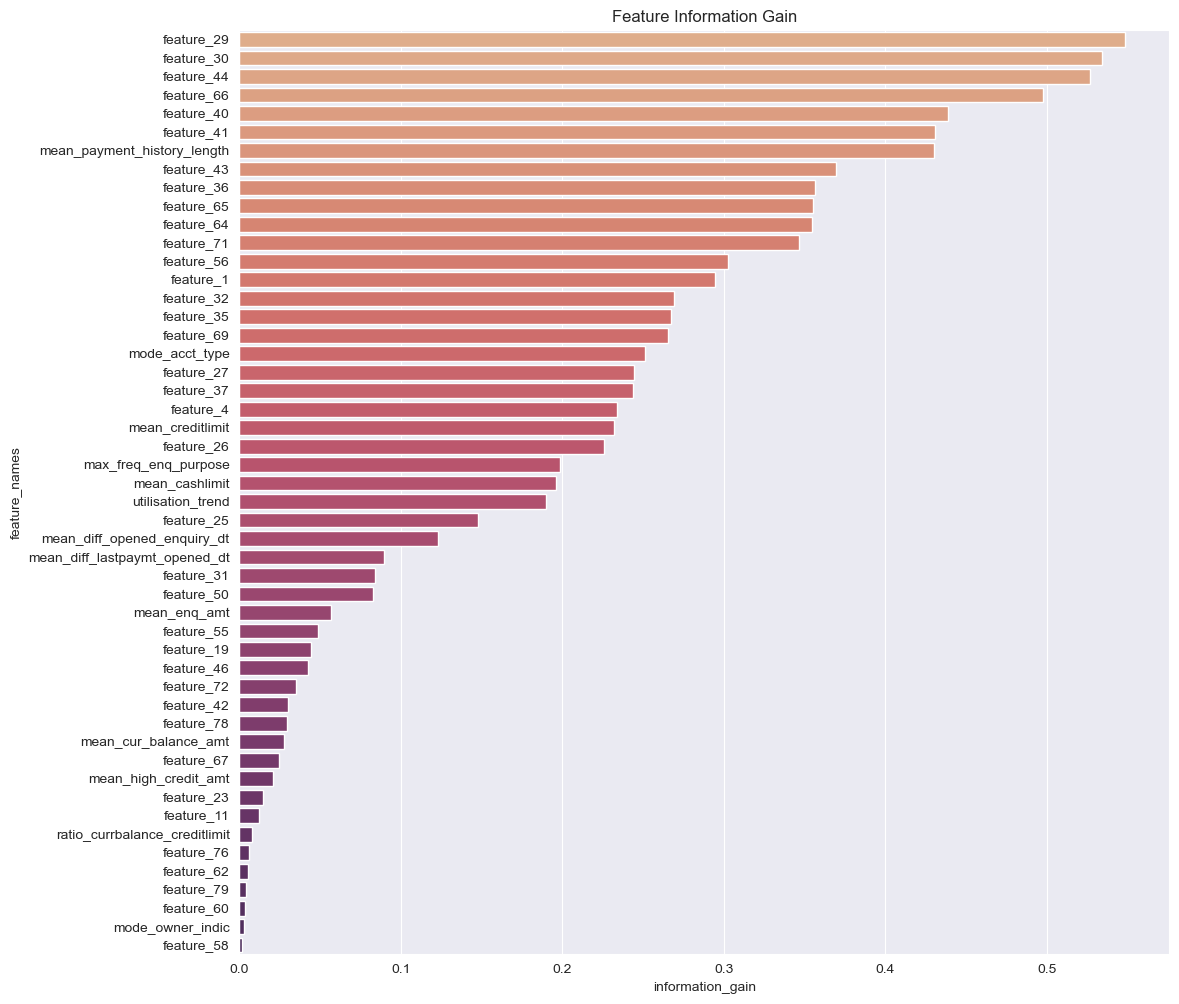

In [5]:
plt.figure(figsize=(12,12))
sns.barplot(info_gain_df, x="information_gain", y="feature_names", palette='flare')
plt.title('Feature Information Gain')
plt.show()

## Data Modeling

### Machine Learning Model Training
- The Random Forest Classifier model will be trained and tested using the data.
- This model can be used to find the Gini importance for the features.

#### Hyperparameter Tuning and Cross Validation
- GridSearchCV will be used to find the best model hyperparameters.
- 10-fold cross validation will be used to evaluate the model.
- The model will be evaluated using the following:
  - Accuracy Score
  - Precision Score
  - Recall Score
  - F1 Score
  - ROC AUC Score

### Split Data in Train and Test Set

In [8]:
smote_df = pd.read_csv('smote_data.csv')

X_smote = smote_df.iloc[:, :-1]
y_smote = smote_df.iloc[:, -1]

In [3]:
# data is split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 42)

In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(36604, 50) (36604,)
(9152, 50) (9152,)


### Fit Model on Train Data with Grid Search Hyperparameter Tuning and Evaluate using Train data, Test data and Cross Validation

In [13]:
# function to run grid search for best model and evaluate the model on train and test data
def get_best_model(model, params):
  grid = GridSearchCV(model, params, cv=5, verbose=1, scoring="accuracy", n_jobs=-1)
  grid.fit(X_train, y_train)
  print(f'Best Grid Search Model: {grid.best_estimator_}')
  print(f'Best Grid Search Score: {grid.best_score_}')
  print()

  best_model = grid.best_estimator_
  best_model.fit(X_train, y_train)

  print('Train Data Evaluation')
  y_pred = best_model.predict(X_train)
  print(f'Accuracy Score: {accuracy_score(y_train, y_pred)}')
  print(f'Precision Score: {precision_score(y_train, y_pred)}')
  print(f'Recall Score: {recall_score(y_train, y_pred)}')
  print(f'F1 Score: {f1_score(y_train, y_pred)}')
  print(f'ROC AUC Score: {roc_auc_score(y_train, y_pred)}')
  cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring="accuracy")
  print(f'10-fold Cross Validation Score: {np.mean(cv_scores)}')
  print()

  print('Test Data Evaluation')
  y_pred = best_model.predict(X_test)
  print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
  print(f'Precision Score: {precision_score(y_test, y_pred)}')
  print(f'Recall Score: {recall_score(y_test, y_pred)}')
  print(f'F1 Score: {f1_score(y_test, y_pred)}')
  print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')
  cv_scores = cross_val_score(best_model, X_test, y_test, cv=10, scoring="accuracy")
  print(f'10-fold Cross Validation Score: {np.mean(cv_scores)}')
  print()

  print('Classification Report for Test Data')
  print(classification_report(y_test, y_pred))
  print()

  cm = confusion_matrix(y_test, y_pred)
  plt.figure()
  ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  ax.xaxis.set_ticklabels(['No','Yes'], fontsize=14)
  ax.yaxis.set_ticklabels(['No','Yes'], fontsize=14)
  plt.title('Confusion Matrix\n', fontsize=16)
  plt.xlabel('\nPredicted Values', fontsize=16)
  plt.ylabel('Actual Values\n', fontsize=16)
  plt.show()

  return best_model

Fitting 5 folds for each of 198 candidates, totalling 990 fits
Best Grid Search Model: RandomForestClassifier(max_depth=40, n_estimators=1000, n_jobs=-1,
                       random_state=42)
Best Grid Search Score: 0.977324953367922

Train Data Evaluation
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
10-fold Cross Validation Score: 0.9778441197498967

Test Data Evaluation
Accuracy Score: 0.9778190559440559
Precision Score: 0.9997717937015062
Recall Score: 0.9559240672048877
F1 Score: 0.9773563859453431
ROC AUC Score: 0.9778526004660901
10-fold Cross Validation Score: 0.9726842770897463

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4569
           1       1.00      0.96      0.98      4583

    accuracy                           0.98      9152
   macro avg       0.98      0.98      0.98      9152
weighted avg       0.98      0.98      0.98      

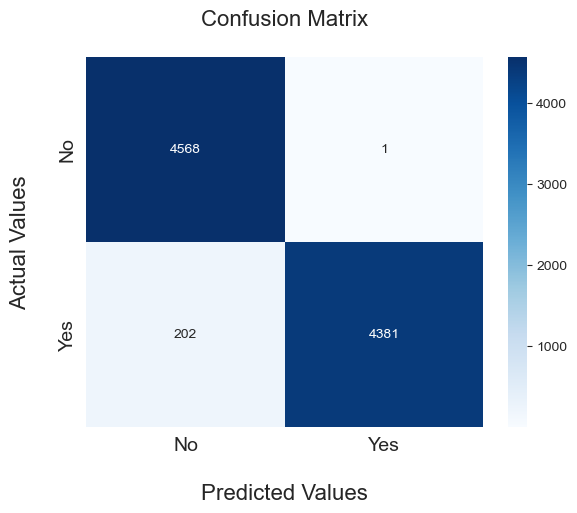

In [18]:
# takes almost 4 hours to run this cell
rand_forest_clf = RandomForestClassifier(n_estimators=1000, criterion='gini', random_state=42, n_jobs=-1)
rand_forest_params = {
    'max_depth': list(range(10, 110, 10)) + [None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 10],
}

rf_best_model = get_best_model(rand_forest_clf, rand_forest_params)

For the confusion matrix:
  - No implies Good Credit History
  - Yes implies Bad Credit History

## Model Evaluation

### Gini Feature Importance and Decile Rank Ordering

#### Feature Gini Importance

In [12]:
from joblib import load

rf_best_model = load('random_forest.joblib')

In [13]:
# create a dataframe with feature names and gini importance
feature_importance_df = pd.DataFrame({
    'feature_names': X_smote.columns,
    'feature_gini_importance': rf_best_model.feature_importances_
})

# sort by descending
feature_importance_df = feature_importance_df.sort_values(['feature_gini_importance'], ascending=False)

In [14]:
feature_importance_df

feature_names  feature_gini_importance
21                     feature_50                 0.066162
0                       feature_1                 0.064093
1                       feature_4                 0.062996
14                     feature_37                 0.054159
37                 mode_acct_type                 0.051403
13                     feature_36                 0.044881
49           max_freq_enq_purpose                 0.041271
11                     feature_32                 0.039038
16                     feature_41                 0.037613
19                     feature_44                 0.034603
7                      feature_27                 0.029497
5                      feature_25                 0.028524
8                      feature_29                 0.025207
28                     feature_65                 0.024613
29                     feature_66                 0.024446
18                     feature_43                 0.024164
32                     feature_71                 0.023921
45              utilisation_trend                 0.022948
15                     feature_40                 0.022340
27                     feature_64                 0.021128
31                     feature_69                 0.020131
12                     feature_35                 0.019846
48    mean_diff_opened_enquiry_dt                 0.019413
6                      feature_26                 0.017422
23                     feature_56                 0.016843
33                     feature_72                 0.016361
46  ratio_currbalance_creditlimit                 0.014057
30                     feature_67                 0.013657
9                      feature_30                 0.013485
47                   mean_enq_amt                 0.012356
40           mean_cur_balance_amt                 0.012155
41               mean_creditlimit                 0.012073
42                 mean_cashlimit                 0.011791
43  mean_diff_lastpaymt_opened_dt                 0.011755
44    mean_payment_history_length                 0.011385
39           mean_high_credit_amt                 0.011047
4                      feature_23                 0.004726
10                     feature_31                 0.003363
3                      feature_19                 0.003254
22                     feature_55                 0.002717
2                      feature_11                 0.002219
20                     feature_46                 0.002149
35                     feature_78                 0.001497
17                     feature_42                 0.001346
24                     feature_58                 0.000917
25                     feature_60                 0.000416
34                     feature_76                 0.000342
38               mode_owner_indic                 0.000263
36                     feature_79                 0.000002
26                     feature_62                 0.000002

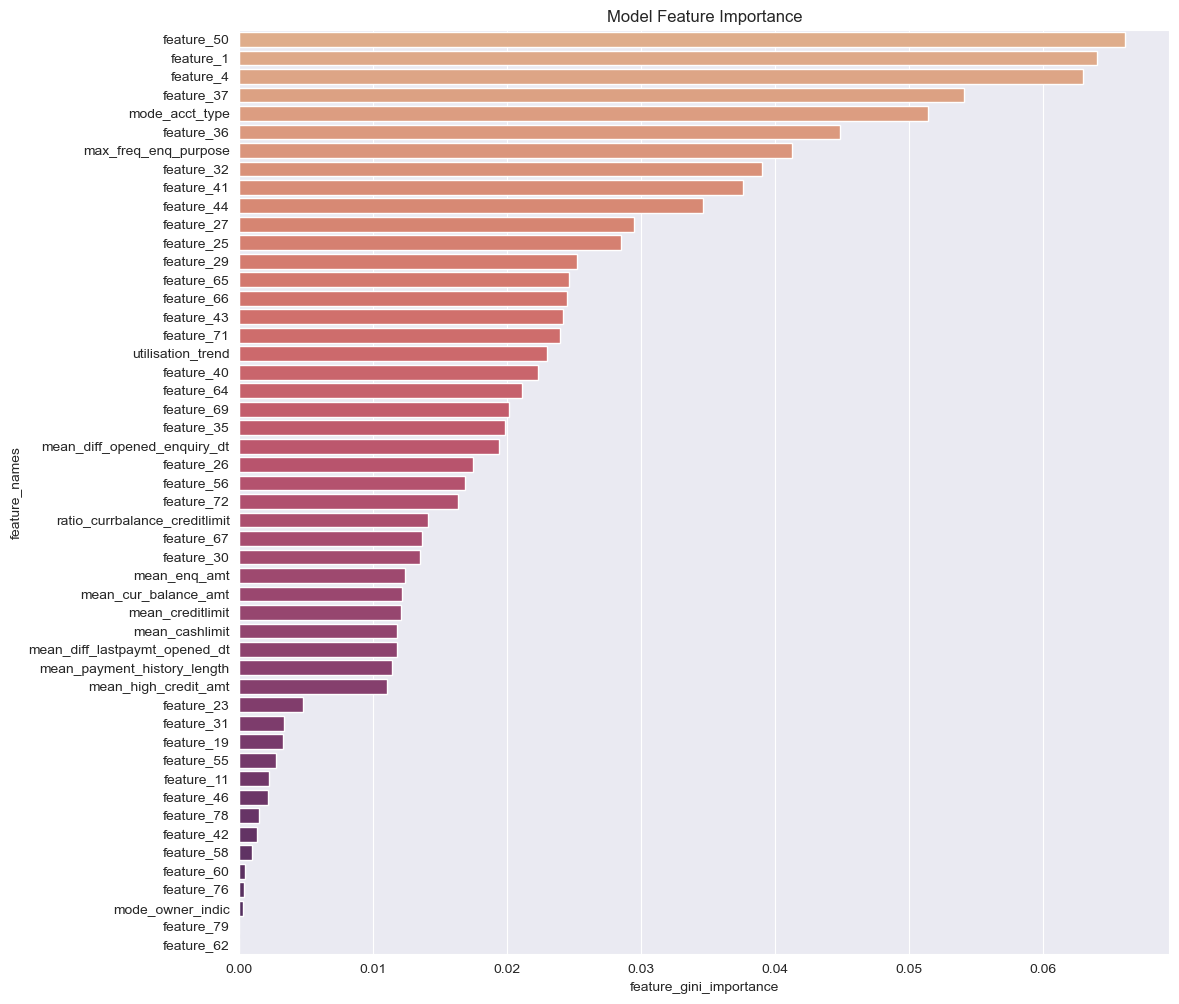

In [16]:
plt.figure(figsize=(12,12))
sns.barplot(feature_importance_df, x="feature_gini_importance", y="feature_names", palette='flare')
plt.title('Model Feature Importance')
plt.show()

#### Decile Rank Ordering

In [16]:
# calculate decile rank for the features
feature_importance_df['decile_rank'] = pd.qcut(feature_importance_df['feature_gini_importance'], q=10, labels=False, duplicates='drop') + 1

# create new dataframe with decile rank
decile_rank_df = feature_importance_df.groupby('decile_rank')['feature_gini_importance'].sum().reset_index()

# sort by descending
decile_rank_df = decile_rank_df.sort_values(['feature_gini_importance'], ascending=False)

# rename columns
decile_rank_df = decile_rank_df.rename(columns={
    'feature_gini_importance': '50_features_ensemble'
})

In [17]:
decile_rank_df

decile_rank  50_features_ensemble
9           10              0.298813
8            9              0.197405
7            8              0.132287
6            7              0.114502
5            6              0.093655
4            5              0.069917
3            4              0.059159
2            3              0.025107
1            2              0.008129
0            1              0.001025

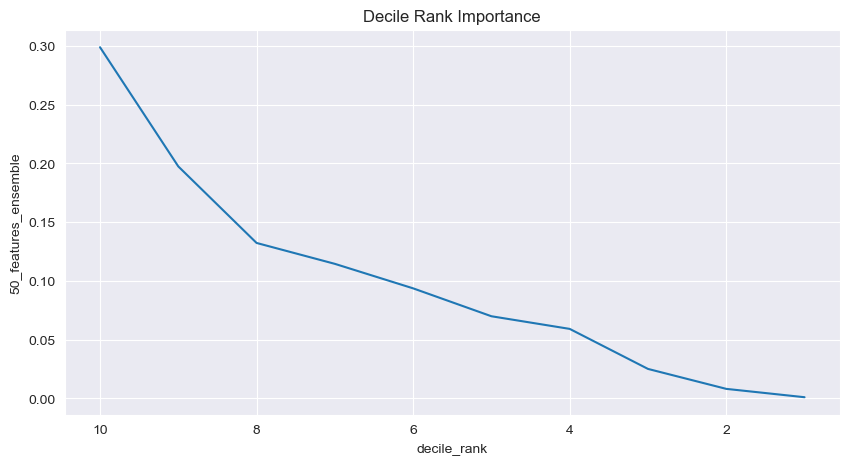

In [58]:
plt.figure(figsize=(10,5))
sns.lineplot(decile_rank_df, x='decile_rank', y='50_features_ensemble')
plt.gca().invert_xaxis()
plt.title('Decile Rank Importance')
plt.show()

### Grid Search Best Model

In [76]:
pd.set_option('max_colwidth', None)

In [77]:
# store model metrics in a dataframe
grid_df = pd.DataFrame({
    'Model': ['Random Forest Classifier'],
    'Hyperparameters Tuned': [
        ['max_depth', 'max_features', 'min_samples_leaf', 'min_samples_split'],
    ],
    'Best Model': [
        "RandomForestClassifier(max_depth=40, n_estimators=1000, n_jobs=-1, random_state=42)",
    ],
    'Best Model Score': [0.9773],
})

In [78]:
grid_df.T

0
Model                                                                             Random Forest Classifier
Hyperparameters Tuned                       [max_depth, max_features, min_samples_leaf, min_samples_split]
Best Model             RandomForestClassifier(max_depth=40, n_estimators=1000, n_jobs=-1, random_state=42)
Best Model Score                                                                                    0.9773

### Model Cross Validation

In [79]:
cross_val_comp_df = pd.DataFrame({
    'Model': ['Random Forest Classifier'],
    'Train Cross Val Score': [0.9778],
    'Test Cross Val Score': [0.9726],
})

In [81]:
cross_val_comp_df.T

0
Model                  Random Forest Classifier
Train Cross Val Score                    0.9778
Test Cross Val Score                     0.9726

- From the train and test cross validation scores it can be observed that the model is not overfitting.

### Model Metrics

In [69]:
# store model metrics in a dataframe
model_metric_df = pd.DataFrame({
    'Model': ['Random Forest Classifier'],
    'Train Accuracy Score': [1.0],
    'Train Precision Score': [1.0],
    'Train Recall Score': [1.0],
    'Train F1 Score': [1.0],
    'Train ROC-AUC Score': [1.0],
    'Test Accuracy Score': [0.9778],
    'Test Precision Score': [0.9997],
    'Test Recall Score': [0.9559],
    'Test F1 Score': [0.9773],
    'Test ROC-AUC Score': [0.9778],
})

In [73]:
model_metric_df.T

0
Model                  Random Forest Classifier
Train Accuracy Score                        1.0
Train Precision Score                       1.0
Train Recall Score                          1.0
Train F1 Score                              1.0
Train ROC-AUC Score                         1.0
Test Accuracy Score                      0.9778
Test Precision Score                     0.9997
Test Recall Score                        0.9559
Test F1 Score                            0.9773
Test ROC-AUC Score                       0.9778

### ROC Curve

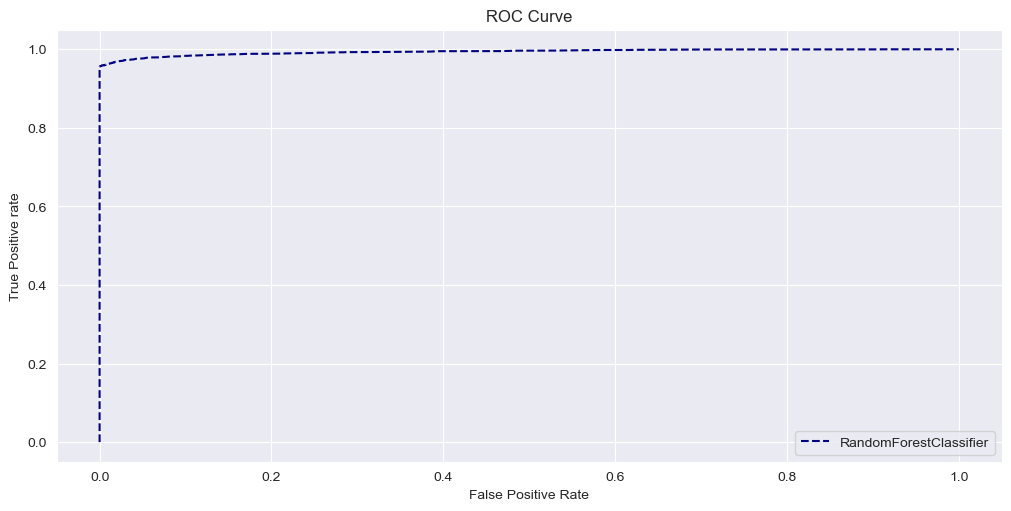

In [68]:
n_lines = 1
cmap = mpl.colormaps['jet']
colors = cmap(np.linspace(0, 1, n_lines))

model_list = [
  rf_best_model
]

fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))

for color, model in zip(colors, model_list):
  pred_prob = model.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color=color, label=type(model).__name__)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

---